# Data Mining Project 1st Semester 2020/2021

<div class="alert alert-block alert-success">

## 1) Introduction
    
</div>

<div class="alert alert-block alert-info">

### 1.1) An Understanding
    
</div>

This dataset was provided by the Paralyzed Veterans of America (PVA). The original sample has 95412 rows, meaning that it has 95412 contributors, who have made a previous donation to PVA before. The objective of this project is to recapture a group of donors that is called "lapsed donors", consisting in a group donors who made their last donation between 13 and 24 months ago. Therefore, it is going to be developed a Customer Segmentation , so that the company can better interpret and analise the differents groups of donors. This is very important to do so because it will help to recapture the group of "lapsed donors".

This project was developed using the Jupyter Notebook, to which was created a particular enviroment on Conda. Also, it can be found in a github repository (link: https://github.com/its-pedrofonseca/Data-Mining-Project (still private) ). It was also created a Trello Chart to better understand the tasks that had to be done, as well as the more demanding tasks and to divide the work for the members. (Trello: https://trello.com/b/UswFQo7V/data-mining)

<div class="alert alert-block alert-info">

### 1.2) Setting up Enviroments in Anaconda 
    
</div>

As this project requires specific libraries and packages previously installed, before running the notebook, so that there aren't any external problems, an enviroment in anaconda was created to run this notebook without any problems. The enviroment file is provided in the github previously referred, as a yml file, then the user will have to download it and run some commands in the anaconda command line...........................................................

In [184]:
!pip install --user mca

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


In [185]:
!pip install prince

You should consider upgrading via the 'C:\Users\Asus\anaconda3\python.exe -m pip install --upgrade pip' command.


<div class="alert alert-block alert-info">

### 1.3) Package Importing
    
</div>

In [565]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import matplotlib.cm as cm
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
#from pandas_profiling import ProfileReport
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
#instalar yellowbrick 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from sklearn.manifold import TSNE
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.covariance import EllipticEnvelope
import prince

<div class="alert alert-block alert-success">

## 2) Importing, Acessing and Cleaning the Data
    
</div>

The model that was followed to develop this project was the KDD Process (Knowledge Discovery Database).

In this phase of the Data Mining Process, it is going to be created a target dataset, which then is going to be discovered. Following this, some processes of data cleaning and preprocessing are going to be applied, such as removing noise, nans variables, data normalization, collecting only the necessary information to apply the next processes. Afterwards, data reduction and projection is going to be applied, finding useful features (with feature engeneering) to represent the data in smaller subsets, dimensionality reduction and/or transformation methods.

Also, along all this processes some data visualization is going to be applied to better understand the data that we are working with.

<div class="alert alert-block alert-info">
    
### 2.1) Reading the Data
    
</div>

In [566]:
#ver se não se consegue por o ficheiro na git, é demasiado grande acho...
data_original=pd.read_csv("donors.csv")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [567]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

<div class="alert alert-block alert-info">

### 2.2) Make a copy of the original dataset

</div>

In [568]:
data = data_original.copy()

In [569]:
data.shape

(95412, 476)

In [570]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [571]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [572]:
# count of missing values
data.isna().sum().sum()

5158884

In [573]:
# duplicated observations
data.duplicated().sum()

0

<div class="alert alert-block alert-info">

### 2.3) Normalize Some Values and replacing empty String for Nans
    
</div>

Replacing Y values for binary features.

In [574]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Replacing X values for binary features.

In [575]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


Replacing B values for binary features.

In [576]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [577]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

<div class="alert alert-block alert-info">

### 2.4) Dropping Columns with High percentege of missing values
    
</div>

Remove columns that have more than half of missing values.

In [578]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

75 columns were removed


In [579]:
data.shape

(95412, 401)

In [580]:
set(data.dtypes)

{dtype('int32'), dtype('int64'), dtype('float64'), dtype('O')}

<div class="alert alert-block alert-info">

### 2.5) Defining metric and non-metric features
    
</div>

In [581]:
set(data.dtypes)

{dtype('int32'), dtype('int64'), dtype('float64'), dtype('O')}

Defining metric and non-metric features based on their type.

In [582]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

<div class="alert alert-block alert-info">

### 2.6) Delete columns with same values

</div>

Delete columns that have only one value throughout an entire column.

In [583]:
old_non_metric_feat = list(data[non_metric_features].columns)

In [584]:
#Remove columns that only have one elements as its variable thus it wouldnt give any new information
remover=[]

def del_columns_with_one_elem(lista):
    for i in range(len(lista)):
        #print(lista[i])
        if len(set(data[lista[i]])) == 1:
            #print(len(set(data[lista[i]])))
            remover.append(lista[i])   
    for r in remover:
        lista.remove(r)


In [585]:
del_columns_with_one_elem(non_metric_features)
print("Deleted Column/s:", (set(old_non_metric_feat).difference(list(data[non_metric_features].columns)))) 

Deleted Column/s: {'RFA_2R'}


<div class="alert alert-block alert-info">

### 2.7) Feature Grouping
    
</div>

From the group of variables that are highly correlated, they are chosen by the members of the group, based on their meaningness for the development of the project.

Presents a group of features that are highly correlated (correlation above 0.9).

In [586]:
data_corr = data.corr()

corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.9] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()

corrdata.columns = ["Features1","Features2","corr_value"]
len(corrdata.Features2.unique())

97

In [587]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [588]:
#Example for the first element of correlation the other features that also correlate

for i in correlated_group_list:
    i.reset_index(drop=True,inplace=True)

In [589]:
#List of elements that present correlation between themselves, without repeated features

correlated_group =[]
for i in range(len(correlated_group_list)):
    aux = correlated_group_list[i].Features1.unique()
    aux=np.append(aux,correlated_group_list[i].Features2.unique(),axis=0)
    correlated_group.append(aux)

In [590]:
for c in correlated_group:
    print(c)

['HHAGE3' 'HHAGE1' 'HHAS1']
['HV2' 'HV1' 'HVP1' 'HVP2' 'HVP6']
['ETH2' 'ETHC5' 'ETHC4']
['POP901' 'POP902' 'POP903']
['HHD7' 'HHD9']
['LFC5' 'LFC3' 'LFC1']
['AFC1' 'AFC2']
['AGE906' 'AGE905' 'AGE903' 'AGE902' 'AGE904']
['IC3' 'IC1' 'IC4' 'IC2']
['DW4' 'DW5' 'DW6']
['LFC4' 'LFC2' 'LFC1']
['RHP2' 'RHP1' 'HUR2']
['IC23' 'IC14']
['HHP2' 'HHP1' 'RHP3' 'HHN3' 'HHN4']
['ETH5' 'LSC2' 'ETH13']
['OCC9' 'EIC1']
['IC11' 'IC20']
['HUPA2' 'DW6' 'DW5']
['AGE901' 'AGE904' 'AGE902']
['HHD1' 'HHN3' 'AGE907' 'HHN4' 'HHD4' 'HHP1']
['DW2' 'DW1']
['AFC5' 'AFC4']
['IC10' 'IC19']
['IC12' 'IC21']
['CARDPROM' 'NUMPROM']
['HUPA6' 'DW6' 'DW5']
['HV3' 'HV4']
['HC17' 'HC18']
['HC8' 'HC7']
['IC22' 'IC13']
['HHD3' 'MARR1' 'HHD2']
['HHD5' 'HHD2']
['RP2' 'RP1']
['NGIFTALL' 'CARDGIFT']
['HVP3' 'HVP4']
['AGEC7' 'MARR3']
['TPE4' 'TPE3']
['HHN5' 'HHN6']
['HHN1' 'HHD11']
['HU1' 'HU2']
['AGEC6' 'HHAGE1']


In [591]:
# ficar com pessoas on social security
data.drop(['HHAGE1','HHAGE3'], axis=1, inplace=True)

In [592]:
# ficar com 
data.drop(['HV1','HVP1','HVP2','HVP6'], axis=1, inplace=True)

In [593]:
# dar drop a blacks com 15-59,blacks >15, percent blacks total e ficar com nada (faz-se com idade depois)
data.drop(['ETHC5','ETHC4'], axis=1, inplace=True)

In [594]:
# dar drop a num of persons e households e ficar com o numero de familias no bairro
data.drop(['POP901','POP903'], axis=1, inplace=True)

In [595]:
# dar drop a female household w childen e ficar com single parents household
data.drop(['HHD9'], axis=1, inplace=True)

In [596]:
# dar drop a female e adult females in labor force e ficar com adults in labor force
data.drop(['LFC5','LFC3'], axis=1, inplace=True)

In [597]:
#drop de males actine in military e ficar com o total adults actine in military
data.drop(['AFC2'], axis=1, inplace=True)

In [598]:
#escolher average age of population
data.drop(['AGE906','AGE905','AGE903','AGE902'], axis=1, inplace=True)

In [599]:
#escolher mediana e media da income das familias
data.drop(['IC1','IC3','IC2'], axis=1, inplace=True)

In [600]:
# ficar com percent house units c/ mais de 10 casas/units na morada
data.drop(['DW4','DW5'], axis=1, inplace=True)

In [601]:
## dar drop a male e adult males in labor force e ficar com adults in labor force
data.drop(['LFC4','LFC2'], axis=1, inplace=True)

In [602]:
#ficar com media de numeros de quartos por casas
data.drop(['RHP1','HUR2'], axis=1, inplace=True)

In [603]:
# percentagem de familias com income >=150000
data.drop(['IC14'], axis=1, inplace=True)

In [604]:
# ficar com a media de numero de pessoas por casa (rever)
data.drop(['HHP1','RHP3','HHN3','HHN4'], axis=1, inplace=True)

In [605]:
# ficar com a percentagem de hispanics
data.drop(['LSC2','ETH13'], axis=1, inplace=True)

In [606]:
# ficar com percentagem de pessoas empregues na agricultura
data.drop(['OCC9'], axis=1, inplace=True)

In [607]:
# ficar com percentagem de familias com income entre os 75000 e 99999
data.drop(['IC11'], axis=1, inplace=True)

In [608]:
#ficar com Percent Adult Veterans Age 16+
data.drop(['DW6'], axis=1, inplace=True)

In [609]:
#ficar com Percent Families w/ Income $50,000 - $74,999 IC19
data.drop(['AFC5'], axis=1, inplace=True)

In [610]:
#ficar com Percent Families w/ Income $100,000 - $124,999 IC21
data.drop(['IC10'], axis=1, inplace=True)

In [611]:
data.drop(['IC12'], axis=1, inplace=True)

In [612]:
# ficar com NUMPROM
data.drop(['CARDPROM'], axis=1, inplace=True)

In [613]:
#ficar com Average Contract Rent in hundreds
data.drop(['HV3'], axis=1, inplace=True)

In [614]:
# features nao importantes
data.drop(['HC18'], axis=1, inplace=True)

In [615]:
data.drop(['HC8'], axis=1, inplace=True)

In [616]:
# Percent Families w/ Income $125,000 - $149,999
data.drop(['IC13'], axis=1, inplace=True)

In [617]:
#ficar com a percentagem de casamentos
data.drop(['HHD3'], axis=1, inplace=True)

In [618]:
data.drop(['HHD2'], axis=1, inplace=True)

In [619]:
#ficar com HV4
data.drop(['RP2'], axis=1, inplace=True)

In [620]:
#ficar com NGIFTALL
data.drop(['CARDGIFT'], axis=1, inplace=True)

In [621]:
#ficar com adultos com +75 anos
data.drop(['HVP3'], axis=1, inplace=True)

In [622]:
#ficar com a mediana de pessoas numa casa HHP1
data.drop(['MARR3'], axis=1, inplace=True)

In [623]:
data.drop(['TPE4'], axis=1, inplace=True)

In [624]:
data.drop(['HHN5'], axis=1, inplace=True)

In [625]:
data.drop(['HHN1'], axis=1, inplace=True)

In [626]:
data.drop(['HU2'], axis=1, inplace=True)

In [627]:
data.shape

(95412, 346)

<div class="alert alert-block alert-info">

### 2.8) Fill missing values (Simple imputation)
    
</div>

Simple Data Imputation using modes in order to remove some Outliers in the next step.

In [628]:
# simple imputation

In [629]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [630]:
modes = data_central[non_metric_features].mode().loc[0]
modes.head(10)

ODATEDW     2015-01-01
OSOURCE            MBC
STATE               CA
ZIP              85351
DOB         1968-01-01
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
GENDER               F
DATASRCE             3
Name: 0, dtype: object

In [631]:
# checking how many NaNs we still have
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()

0

<div class="alert alert-block alert-info">

### 2.9) Outlier Removal
    
</div>

#### IQR

The IQR is a procedure that finds outliers through the interquartile range. Usually for this method outliers fall below Q1 - 1.5*IQR and above Q3 + 1.5*IQR, where IQR=Q3-Q1.

In other words, the IQR is the first quartile subtracted from the third quartile. It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers. The parameters used for this were Q1 = 0.0003 and Q3 = 0.0097.

In [632]:
# Updating metric and non metric features
non_metric_features = data_central.select_dtypes(include="object").columns.to_list()
metric_features = data_central.columns.drop(non_metric_features).to_list()

In [633]:
ql = data_central.quantile(.003)
qh = data_central.quantile(.997)
iqr = (qh - ql)

upper_lim = qh + 2 * iqr
lower_lim = ql - 2 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(data_central[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0))
otliers_iqr=data_central[~filters]
data_central = data_central[filters]
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 1.0619999999999998 %


In [634]:
data_central.shape

(94399, 346)

#### Isolation Forest

The Isolation Forest Outlier removal explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method (from the sklearn library), is built on the basis of decision trees.

In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the feature. The parameters used for this method were IsolationForest (contamination=0.01), representing the amount of contamination of the dataset, i.e. the proportion of outliers in the data set. It is used when fitting to define the threshold on the scores of the samples.

In [635]:
from sklearn.ensemble import IsolationForest

In [636]:
iso = IsolationForest(contamination=0.01)
iso_df = iso.fit_predict(data_central[metric_features])

In [637]:
mask_out =iso_df == -1
outliers_if=data_central[mask_out]
data_central.drop(outliers_if.index,inplace=True)

In [638]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(data_central.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 2.051 %


In [639]:
data.drop(otliers_iqr.index,inplace=True)
data.drop(outliers_if.index,inplace=True)

<div class="alert alert-block alert-info">

### 2.10) Data Selection
    
</div>

In this step, the variables that are going to be used to do the clustering are chosen. The group has decided to split the variables into three categories. 

The __Value__ variables, that relate to the promotion and the client, such as how much is the average gift from that donor, if it a major donor and others variables.

The __Demographic__ variables are more related with the dynamic social population in which the subject lives. This selection should be useful in a way that we can better understand the surroundings of the donor, and thus better define the marketing strategy.

The __Socio-Economic__ variables represent the  economic activity that are molded by social processes, because of the local or global economy. This is useful, to understand better the economic conditions in which the donor lives.

Also, a juntion of all the previosly variables are put together in a dataframe called __overall__.


In [640]:
# 12 variaveis
value = data.loc[:,["RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","TIMELAG","AVGGIFT","NUMPROM","CARDPM12","NUMPRM12","MAJOR","HIT","WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]]

In [641]:
# 22 variaveis
demographic = data.loc[:,["STATE","GENDER","DOB","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4",
                          "POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]]

<div class="alert alert-block alert-info">

### 2.11) Some Data Visualization
    
</div>

Since the original dataset was very big and incomplete, first the group had to do some data cleaning and then some data selection, in order to better visualize the variables that could bring value, when doing the clustering.

Data Visualization is importante here to better understand, the variables that are being used, and also to see how they spead along an axis. This helps us have a better domain knowledge, which is very important to any data science project.


Starting with the vast majority of variables, that are metric variables, the visualization here chosen is the box plot that
shows the distribution of quantitative data in a way that facilitates comparisons between variables.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

In [642]:
value_metric_features = value.select_dtypes(include=["int32","float64","int64"]).columns.to_list()

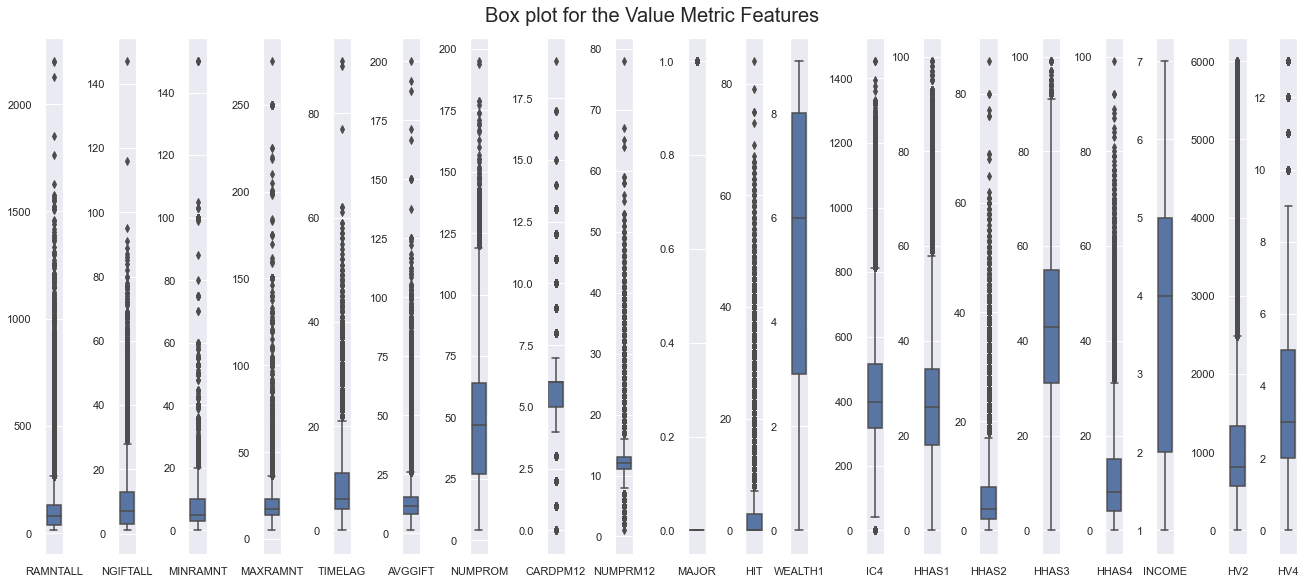

In [643]:
sns.set()

plot_features = value.columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=value.iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
plt.suptitle("Box plot for the Value Metric Features", fontsize=20)
plt.show()

In [644]:
dem_metric_features = demographic.select_dtypes(include=["int16","int32","float64","int64"]).columns.to_list()

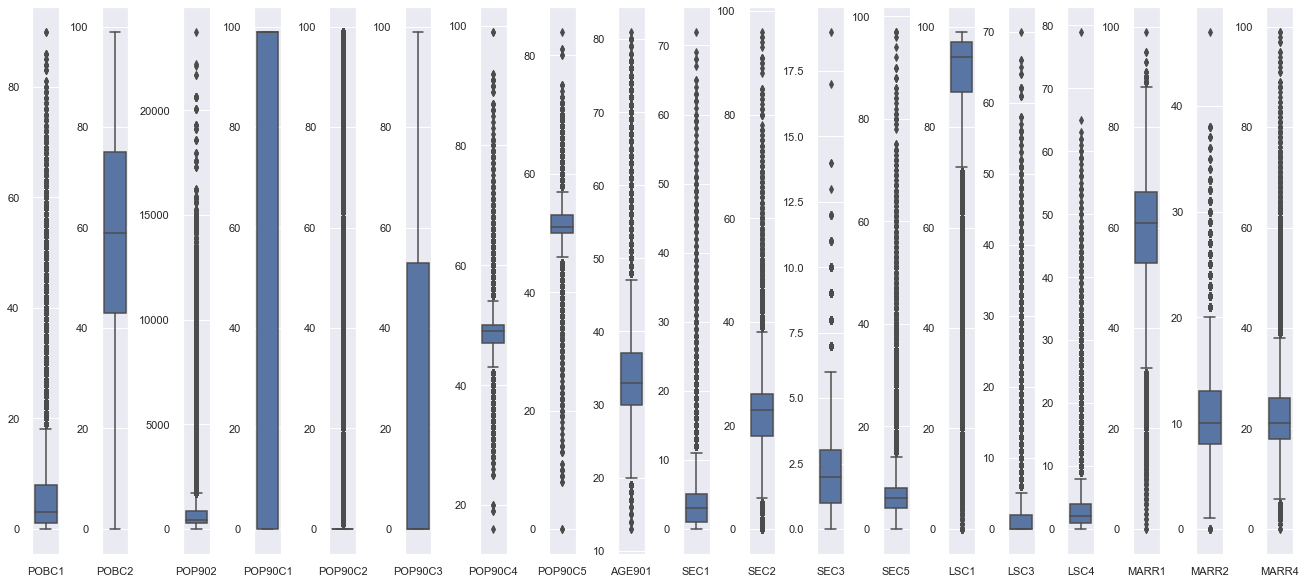

In [645]:
sns.set()

plot_features = demographic[dem_metric_features].columns
fig, axes = plt.subplots(1, len(plot_features), figsize=(18,8), constrained_layout=True)
j=0
k=1

for i in zip(axes, plot_features):
    sns.boxplot(data=demographic[dem_metric_features].iloc[:,j:k], ax=i[0])
    j=j+1
    k=k+1
    
#plt.suptitle("Box plot fordata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABRgAAAJICAYAAAAKMYhkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeVwU9f8H8NcuGIKYB2Eq3tZ6i4ipCEFeqCggeCSm5ol5Z6dSqZG3lnnhkUelaWpqgF+PVBRFPDv06/kzEwXtq4SiIoexO78/aCeHSxZ2d3Z3Xs/Hw0d9htn9vOfY3Zn3fA6VIAgCiIiIiIiIiIiIiEpBLXcAREREREREREREZL2YYCQiIiIiIiIiIqJSY4KRiIiIiIiIiIiISo0JRiIiIiIiIiIiIio1JhiJiIiIiIiIiIio1JhgJCIiIiIiIiIiolJjgpGIiBRv6dKlaNSoUYF/rVu3Ru/evfHVV1/h77//ljvMEtFvy4EDB0r9HgkJCTh37lyJ1l29ejVee+01NG/eHK+++ioyMzNLXW9J7dq1C8nJyWJ5x44daNSoEb7++muT1/10fU//a9y4Mdzd3dGpUye89957Jd5/VHKNGjVCcHBwidYdPHgwGjVqhIcPHxql7ilTpojHOjo6uth133rrLXHd0tJqtdi4cWOJP0+dOnVCmzZtSl1ffk9vb3H/jLV/i3P37l1s377d5PUQERFR2djLHQAREZGl6Ny5M5o0aQIg7wY/IyMDZ86cwcKFC3H27FksW7ZM5ghNb9OmTfj000+xfPnyZ6579OhRfP7556hWrRqGDBkCBwcHODk5mTS+BQsWYM2aNfjxxx9NWk9JtG3bFm3btgUACIKAx48f448//sCePXuwe/duTJ8+Ha+//rrMUSpTSEgI2rZtCwcHB6O/9/79+4tMdGZkZODYsWNlruPdd9/Fnj17EBQUVKL1hwwZgidPnpS53vxCQkLg5uZW5N9NsX+flpaWhu7du6N9+/bo06ePSesiIiKismGCkYiI6B9dunRBaGioZJkgCBgzZgz279+P48ePw8vLS6bozCMtLa3E6168eBEAMHHiRPTr189UIUkYEp+ptW3bFhMmTCiw/Ny5cxg5ciQ+/fRTNGzY0Kgty6hk8n+OjcXV1RUJCQnIysqCo6Njgb8fOnQIT548gZOTU5la8xp6ng8dOrTUdRUnJCQE7dq1M8l7l0RWVhYeP34sW/1ERERUcuwiTUREVAyVSiUmK06fPi1zNJZF32KqSpUqMkdiWVq2bIkZM2ZAq9Xiyy+/lDscMqLOnTsjKysLCQkJhf593759aNiwIerUqWPmyIiIiIjkxQQjERHRM9jZ2QEAnnvuuQJ/2717NwYMGIBWrVrBw8MDAwYMwH/+8x/JOh999BEaNWqEOXPmSJafOXMGTZo0QWBgYLHdG/XjKl65cgUzZ85E+/bt4enpiaFDh+Lnn38u0TacO3cOY8eORbt27dCiRQsEBARg5cqVknoHDx4sdgMfN25csWPINWrUqMC6O3bsMGi/pKSkoFGjRli8eDFmzpyJVq1aoV27dtizZ0+hdXbq1Ak7d+4EAPTu3RudOnWS/F0QBKxfvx7dunVD8+bN0blzZ0RFRSE3N7fAex0/fhzDhg2Dp6cnWrVqhddffx179+4tbhcapEePHnBzc8Pp06dx9+5dyd8uXLggHouWLVsiODgYmzdvhiAIBbZ36NChuHLlCkaMGAEPDw+0a9cO06ZNQ1ZWFu7cuYO3334bnp6e8PLywnvvvYd79+4ViKUkx0Jv79696Nu3Lzw8PPDqq69i4cKFSExMLHB8GzVqhClTpmDlypVo06YN2rRpI46B+fjxYyxfvhzBwcHw8PBAixYt4O/vj/nz50ta9emP/6JFi7Bnzx707NkTLVu2RLdu3bBu3TrodLpCY/ztt98wdOhQtGrVCm3btsXEiRORkpIiWaeoMRi3b9+Ofv36wcPDA97e3hg7diwuX75caD2F6dKlC9RqNX766acCf8vMzMTRo0fRrVu3Il9fkvOuUaNGOHXqFADglVdeweDBgwH8Oy7iuXPnEBAQgBYtWmDAgAEQBKHQMRi1Wi3Wr1+PoKAgtGrVCn5+fnj//fcl45caU0ZGBhYuXIguXbqIY7JOnz690NaYt27dwvTp09GlSxe0aNECHh4eCA0NxebNm8V1duzYgc6dOwMADh48KDkHixqPs7DxWDt16oTBgwdj+/bt6NChAzw8PDB37lzx7yX9Lrhx4wYmTZqEjh07onnz5ujUqRNmzJiB1NTUUu8zIiIiW8IEIxERUTEEQcDOnTthZ2eHLl26SP42b948TJ48GSkpKejVqxd69uyJlJQUvPPOO1iwYIG43tSpU1G9enVs2LABly5dApCXjJg6dSrs7Owwf/78QpOX+U2dOhXR0dEICAhAly5d8Ouvv+LNN98ssjWV3oEDBxAWFoajR4+iQ4cOGDBgAOzs7LBo0SIMGzZMTDLqx60DgICAAIwfP77I9xw/fnyBdfXjV5Z0v+ht3boVe/bsQVhYGFq1aoVWrVoVWueQIUPQuHFjAMDrr7+OIUOGSP7+1VdfYcmSJfD09ERYWBhyc3OxePHiAnVu27YNw4YNw5UrVxAQEIDXX38daWlpmDRpElauXFnsviwplUoFDw8PAMAvv/wiLo+Pj8eAAQNw4sQJdOzYEYMGDYJOp8OMGTMwbdq0Au+TkpKCsLAwCIKAAQMGwNXVFVu2bMGHH36IsLAw3L59G/3790fdunURGxuLTz75RPJ6Q47FN998g0mTJuF///sfgoOD4evri40bNxYaF5A3BudXX32F3r17w8fHB+7u7sjNzcWwYcOwdOlSuLq6YuDAgejTpw+ys7Oxdu1aTJkypdD3mTx5MmrXro0BAwaIcUdERBRY99atW2LC7Y033kDjxo2xb98+DBo06JldkqdNm4aIiAikpaUhODgYr732Go4dO4awsLASJxlfeOEFeHp64vDhwwUmfjp8+DCys7PRvXv3Ql9b0vNu/Pjx4riHo0aNQkhIiOR9xowZgzp16mDAgAFo164dVCpVgboEQcDo0aMxd+5caLVa9O3bF23atMHu3bsxcOBA3Llzp0TbW1KPHj1CWFgYvvrqK9SqVQtDhgyBh4cHtm7din79+kmS7CkpKejTpw9+/PFHtGrVCkOHDkXXrl1x7do1zJgxAxs3bgQANGnSRPyM169fX/IdY6irV68iMjISXbp0Qffu3cXvmJIek3v37mHo0KGIj49H27ZtMWzYMLz00kvYvHkzhgwZYjWTgBEREZmUQEREpHBLliwRNBqNMGbMGGHJkiXCkiVLhMWLFwuzZ88WevfuLTRr1kzYtGmT5DWnT58WNBqN0Lt3byEtLU1cnpaWJvTq1UvQaDTCqVOnxOXx8fGCRqMR+vXrJ+h0OiEyMlLQaDTCqlWrShxf69athRs3bojLf/vtN6Fp06ZC586dhdzcXMm6+/fvFwRBEB49eiS88sorQuvWrYXz58+Lr/3777+Fd999V9BoNMKyZcsK1KV/fUnienpdQ/ZLcnKyoNFohEaNGgmXLl16Zn2CIAgffvihoNFohIsXL4rLtm/fLmg0GqFVq1bCtWvXxOX/+9//hJYtWwpt2rQRtFqtIAiC8OeffwrNmzcXevToIdy7d09cNysrS3j99deFxo0bC1euXCk2Bn19S5YsKXa9efPmCRqNRvj2228FQRCEzMxMoX379kL79u2F5ORkcT2tVitMmDBB0Gg0wuHDh8XlHTt2FDQajTBz5kxx2YMHDwR3d3dBo9EIEydOFHQ6nSAIgpCbmyt07dpV0Gg0QmZmpiAIhh2LP//8U2jZsqXQpUsXITU1VVz3woULQrNmzQSNRiNs375dXK7RaASNRiMcPHhQss27du0SNBqN8MUXX0iWP3r0SOjQoYPQpEkTMT798ddoNMKaNWvEdR8/fiz0799f0Gg0wokTJwrUuWLFCsl7jx07VtBoNMJPP/0kLhs0aJCg0WiEBw8eCIIgCImJiYJGoxEGDhwoPHr0SFzv559/Fho1aiSMHj1aKM7T590333wjaDQa4ejRo5J1Jk6cKHTr1k0QBEEICgoSNBqN+DdDz7v88T8dw/jx4wvE17FjR8HT01Msb9u2TTxHcnJyxOWxsbGCRqMRPvvssxJt74cffih+J+b/97QZM2YIGo1G2Lhxo2T5gQMHxDj0PvnkE0Gj0QjHjh2TrHv27FlBo9EIr7/+urhMf46MGTNGsq5GoxGCgoIKxK3/bK5fv16yb57+HOoZckw2bNggaDQa4YcffpC8x6effipoNBrh0KFDBWIhIiJSGrZgJCIi+sfBgwexbNkyLFu2DMuXL8fXX3+NixcvwsnJCQ8fPoRWqxXX1XfV++CDD1C1alVxedWqVfHuu+8CyOuOqefr64vQ0FCcPXsW06dPx3fffQcPDw+MGDGixPENGjRIMrabu7s7AgICkJycjN9++63Q1xw4cAAPHjzAkCFD0KxZM3G5vb09IiIiUL58eUmcZWXofgGAunXrii0Ty6JHjx5o0KCBWH7xxRfRrFkzPHz4EA8ePAAAxMTE4MmTJ5g4caJk7Mjy5ctj4sSJ0Ol0YjfsstK3Ss3IyAAAxMXF4d69exg5ciRq1aolrqdWq4vcN4B0Ao/nn38eDRs2BAAMGzZMbL1mZ2cnHt/bt28DMOxY7NmzB9nZ2Rg9ejReeOEFcd2mTZsWaEGnV758efj5+UmWNW3aFDNnziww6YizszOaNm0KrVYrHgs9Nzc3vPnmm2LZyckJb7/9NgAgNja2QJ3Dhw+XLHvttdcAoNiuv/ou4e+++y6cnZ3F5a1bt8Y777yDjh07Fvna/Pz9/aFSqSTdpLOzs3HkyJEiWy8a87wrrgu2nn57IyIiJK2je/bsibfeegutW7cuUV07d+4UvxPz/9PLzc3Fjz/+iJdffhlvvPGG5PWdO3dG69atsX//fvFzEBQUhFmzZqFDhw6SdVu2bIny5cubbCKn/PvNkGOi765/9uxZye/A5MmTkZCQIJ6DRERESsZZpImIiP4xZ84cyeyzmZmZ+OOPP7BkyRJ88cUXSEpKEsdRvHz5MtRqNTw9PQu8j35Z/m6XU6dOxbFjx7BlyxY4OTlh/vz54viOJaHvkvy0li1bIiYmBpcvXy40Fn0Mr7zySoG/Va1aFfXr18elS5fw6NEjVKxYscSxFKU0++XpZFtZ1KtXr8CyypUrA8g7llWqVMH58+cB5I27dvXqVcm6+i62hozJVxz97LdOTk4AINZ94cIFLF26tMD6dnZ2BeouV66c2F1WT/9++febg4MDgH8n3zHkWPz3v/8FkHc+5de6dWts3bq1wPLq1asXOH/r16+P+vXrIycnB2fPnsX169dx8+ZNXLhwQRxX8OkEDQB4eHjA3l56SaqPI//+qFGjRoHhBPTJoeK6SF++fBl2dnZo0aJFgb+Fh4cX+brCVK9eHS1btkRcXBxmzJgBtVqNI0eOIDMzs8gEozHPu/znQ2EuX76MmjVr4sUXX5QsV6lUmDx5conqAYBvv/32mbNIX79+HZmZmdBqtYWe1zk5OdBqtbhy5Qo8PT3FMTvT09Nx6dIl3Lx5E9evX8dvv/0mrmts5cqVQ7Vq1STLDDkm3bp1w/Lly7Flyxb89NNP8PHxga+vL/z8/ODq6mr0eImIiKwRE4xERERFcHJyQvPmzbFs2TJ06dIFO3bswKhRo9CgQQNkZGTAwcGh0LETK1asCEdHR2RlZUmWP//882jfvj2io6NRo0YN1KhRw6B48icLAIitzfStg/LTL3+61dbTqlWrhkuXLiErK8soCcbS7Bd9YqysihvHUvhnApVHjx4BAL7//vsi183fwq60bt26BQCoXbu2pO6iJlgprO7y5csXue6zxu005Fjcv38fACStF/XyJ2aKi02n02HVqlVYv369uC0uLi7w8PCAm5sbrl27VmAym8LO6woVKsDR0VHcZ3rFnSv53/dpDx8+hIODA8qVK1fkOobw9/fHggUL8Ouvv8LT0xP79u1DvXr1imyJa8zzrrhzQu/hw4eFHktT0E+k88cff0haNuan374HDx5gzpw52LVrF/7++2+oVCq4ubmhffv2uHjxokliLGyfGXJMXnzxRfzwww9YsWIFDh48iNjYWMTGxqJcuXIIDQ3FRx99ZLTvMSIiImvFBCMREdEzPPfcc/Dw8MDevXtx5coVNGjQABUqVEBWVlahLf9ycnKQnZ0t6XYHACdPnkRMTAwqV66Ma9euYeXKlZgwYUKJ48jOzi6wTH+TnL8uvQoVKgBAgZmM9fTJAX1Lv7IqzX4xJ33rvwMHDoiJP1PIzc3Fb7/9BrVaDXd3d0ndX3/9Nby8vExWt54hx0KfgH78+LGkOzVQdPK6MOvWrcOXX36Jtm3bYtSoUWjSpInYwmvkyJG4du1agdfk5OQUWPbkyROjnitOTk7IyclBbm5ugdaSWVlZcHR0NOj9unXrhgULFmD//v1o0aIFDh8+jEGDBhVbP2D68+7p+vQtaPPLzMwU4zEG/XdMcHAw5s+f/8z133//fXGyo+DgYGg0GvH8y98lvjiFJZTzP7wojqHHpHbt2pg9eza0Wi3Onz+Po0ePYseOHdiyZQsqVqyI999/v8R1ExER2SKOwUhERFQC+kScPlGjb6l05syZAuv+/PPPEAQBL730krgsMzNTbOWyadMmNGzYEKtWrTKoO66+G+vTfv31VwCFd20FIM66+vPPPxf4W0ZGBi5duoS6deuKrdwKm5HWEIbuF0OVNb5GjRoBKHxfJiUlYd68eYiLiytTHQCwb98+pKWloUOHDnBxcZHUre+a+bT09HTMmjUL0dHRZa5bz5BjoR+/8dy5cwXWPXv2bInr3LVrF+zs7LBixQr4+vqKyUVBEPDHH3+I//+0wo7F2bNnIQiCmJwtK41GA61WW2gLubFjx6JNmzYGJadq166NJk2a4MCBAzh27BgyMjKK7B4NmO+809NoNLh9+zZSU1ML/K13794lGsexpOrXr4/nnnsOFy5cKDTp9/XXXyMqKgr379/Hw4cPER8fj+bNm+PTTz9F69atxeRiSkoKcnJyJO9R1Oe9XLlyhXaJL24czvwMOSYHDx7EjBkzkJGRATs7O7i7u2P8+PH47rvvABT+/UpERKQ0TDASERE9w9mzZ3Hq1ClUqlQJbdq0AQBxrMYvvvgC9+7dE9e9d++e2IonODhYXL5w4UIkJydj3LhxaNiwISIjI5Gbm4upU6ciNze3RHGsXbtW0hLxl19+QWxsLJo1a1Zk18wuXbqgYsWK2LRpEy5cuCAuz83NxaxZs5CdnS2JU9+6Sz+On6EM3S+G0sf3999/l+r1QUFBsLOzw5dffilJvuTm5uKzzz7DunXrkJ6eXur4gLxx22bOnAk7OztMmjRJXN61a1c4OztjzZo1uH79uuQ1CxYswLfffoubN2+Wqe6nGXIsAgMDUa5cOaxcuVKy7tWrVwsdf7EoDg4O0Gq1kvcAgKioKLHLeP7z/ezZs9i9e7dYzsjIwOeffw61Wl3kBDOGCgoKAgB8+eWXkpbAv/76K06dOgUPDw+DWzH6+/sjOTkZK1euRN26dcVkflH1G3Le6btyl+U8FwQBCxculIxpuGfPHty4ccOoLWgdHBwQEBCA33//HevXr5f87eTJk5g/fz62b9+OSpUqoVy5clCr1Xj48KHkOyY7OxufffYZAOk2F/V5b9CgAVJSUiRjJ966dQs//vhjieM25Jj88ccf2Lx5MzZv3ix5D/05XbNmzRLXS0REZKvYRZqIiOgfBw4cEG8YgbzJKH7//XccPnwYWq1WnHUZyJs0ZdiwYVi/fj2CgoLEWWgPHTqE1NRUjBo1SpxY5fTp09i0aRM0Gg2GDRsGAGjTpg1CQ0Oxfft2rFq1CuPGjXtmfI8ePUJISAi6du2KjIwM7Nu3D+XLlxdvzAvj7OyM2bNnY/LkyRgwYAC6du0KFxcXnDhxAv/3f/+HNm3aYNSoUeL6+vHwVqxYgUuXLmH8+PEGjS1myH4pDX18c+fORYcOHTB+/HiDXl+vXj28//77mDt3Lnr16oVOnTqhUqVKOHLkCK5du4aOHTuKyahnOXXqlDiphSAIyMzMxNWrV3H8+HEAwKeffippWfr8889j5syZeO+99xASEoIuXbqgWrVqOHXqFP773/+iRYsWBWZILgtDjoWbmxsmTpyIzz//HMHBwejcuTOys7Oxb98+8fir1c9+Lh0UFITffvsNYWFh6NGjB8qVK4eTJ0/iwoULcHFxQVpaWoEEbqVKlfDuu+9iz549ePHFF3H48GEkJydj7NixRpldHAB8fHzQp08fbN++HcHBwXj11Vfx+PFj/Oc//0GFChUwbdo0g9+zW7duWLx4MX777TeMHj262HUNPe/053lERAS8vb0xZMgQg2Lr27cvfvrpJ/z444+4cuUK2rVrhzt37uCnn36Cm5ubQRO9lMSHH36IX3/9FfPmzcPBgwfRsmVLsT57e3vMnj0barUajo6O6Nq1K/bt24d+/frB29sbmZmZOHToEP766y9UqlQJjx49gk6ng1qtRpUqVfDcc8/h5MmTmDNnDrp27Yo2bdqgf//++OyzzzB48GD06tULT548wZ49e6DRaAptsVsYQ45J//79sXXrVixcuBCnTp1Co0aNkJaWhr1798LJycngiYKIiIhsEROMRERE/zh48CAOHjwolsuVK4eqVauiY8eOGDx4cIFZnKdMmYKmTZviu+++Q2xsLOzt7dGkSRNMmzYN/v7+APLGBIuIiAAAREZGSiaZ+OCDD3Do0CGsWLECXbp0EbvsFWXatGk4deoU/vOf/0CtVqNjx46YNGkSGjZsWOzr/P39sWnTJqxYsQJHjx7FkydPUKdOHXzwwQcYMmSIJKaAgADEx8fj8OHD2LRpE0JCQtCgQYOS7UAD9ktpDRw4EL/88gvOnDmDa9euiQlbQwwbNgwNGjTAunXr8NNPP0Gn06F27dqYMmUK3njjjQJj9BXl1KlT4szIQF5LrurVqyM4OBhDhgwptEVbjx49UL16daxatQpHjx5FVlYW3NzcMHbsWIwYMUIcz85YDDkW4eHhcHFxwTfffIPt27ejcuXKePPNN1G1alXMmjWrRC38Bg4cCEEQsHnzZmzbtg0VK1ZE/fr18cUXX8DBwQHjxo1DfHw8PDw8xNe0adMGvXr1wuLFi3HkyBE0bNgQ8+fPL1NL18LMmjULzZs3x5YtW7BlyxY4ODjA19cXkydPLtW4iA0bNkTDhg1x7dq1EnU5NuS8e+utt3Dt2jUcO3YMSUlJBicY9d3U165di+joaHz33XdwdnZGYGAg3nnnHVSqVMng7S1O1apVsXXrVqxatQr79+/Hhg0bULVqVXTq1KlAonj27NmoXr06Dhw4gI0bN8LV1RUtWrRAeHg4du3ahW+++QYnT56El5cXnnvuOUybNg1LlizBpk2bULFiRbRp0waDBg2CVqvFpk2b8P3336NGjRoYPXo0vLy8xJa7JVHSY1KpUiVs3LgRK1aswLFjx3DixAk4OzvD19cX48ePx8svv2zU/UlERGSNVEJxU+4RERGR7JYuXYply5Zh+fLl6NKli9zhkA26f/8+tFptoTMPL1myBMuXL8e2bduKHOuzNFJSUtC5c2d07twZUVFRRntfIiIiIjI/jsFIREREpHAnT56Et7c3li1bJll+79497Ny5E5UqVTJad2UiIiIisj3sIk1ERESkcK+++irc3NywfPly/Pe//4VGo8GDBw9w4MAB3L9/H3PnzhVnGiciIiIiyo8JRiIiIiKFq1ChAr7//nusWbMGhw8fxvHjx+Hk5ITmzZtjxIgRRp11mIiIiIhsD8dgJCIiIiIiIiIiolLjGIxERERERERERERUakwwEhERERERERERUakxwUhERERERERERESlxgQjERERERERERERlRoTjERERERERERERFRqTDASERERERERERFRqTHBSERERERERERERKXGBCMRERERERERERGVGhOMREREREREREREVGpMMBIREREREREREVGpMcFIREREREREREREpcYEIxEREREREREREZWavVwV37//GDqdYPJ61GoVqlSpYPJ6yoL7ovS476TMtT8A69kn+XEfPRv30bPxu+df3Bd5lPy5UcI5oJTjq4RjWRwlbz/PceNSwjYCyj6XLWnblX7Mn6bUfWEp571sCUadTjDbgbd03Belx30nxf3xbNxHz8Z99GzcR//ivsij5P2ghG1XwjYCytnOoih5+5Wy7UrYTiVsY3GUuP1K3OaiKHVfWMp2s4s0ERERERERERERlRoTjERERERERERERFRqTDASEREREZFFysjIQK9evZCSkgIASExMRGBgIPz9/bFo0SJxvUuXLiE0NBTdunXDRx99hNzcXLlCJiIiUiQmGImIiIiIyOKcPXsWYWFhSEpKAgBkZ2cjIiICUVFR2L17N86fP4/4+HgAwPvvv49p06Zh3759EAQBW7dulTFyIiIi5WGCkYiIiIiILM7WrVsxffp0VKtWDQBw7tw51K1bF7Vr14a9vT0CAwOxd+9e3Lp1C9nZ2WjVqhUAIDQ0FHv37pUzdCIiIsWRbRZpIiIiIiKiosyaNUtSvnv3LlxdXcVytWrVcOfOnQLLXV1dcefOHbPFSUREREwwEhERERGRFdDpdFCpVGJZEASoVKoilxvKxcXZKHESEREpEROMRERERERk8apXr47U1FSxnJqaimrVqhVY/tdff4ndqg2RlpYBnU4wSqzFUatVTGYSEZHN4RiMRERERERk8dzd3XH9+nXcuHEDWq0Wu3btgq+vL9zc3ODg4ICff/4ZABAdHQ1fX1+ZoyUiIlIWtmAkIiIiIiKL5+DggLlz52LChAnIycmBn58funfvDgBYuHAhPv74Y2RkZKBZs2YYMmSIzNESEREpCxOMRERERERkseLi4sT/9/LyQkxMTIF1GjdujB9++MGcYREREdFT2EWaiIhsQkZGBnr16oWUlBQAQGJiIgIDA+Hv749FixaJ6126dAmhoaHo1q0bPj4VQdMAACAASURBVProI+Tm5soVMhERESlYdHQ0evbsiZ49e2LevHkAir5+ISKydEwwFoE3qmRMPJ+ejfuoeNw/xTt79izCwsKQlJQEAMjOzkZERASioqKwe/dunD9/HvHx8QCA999/H9OmTcO+ffsgCAK2bt0qY+RERERF4++/7crKysKsWbOwYcMGREdH48yZM4iLiyvy+sWa8TwmngPKwARjIXijSsbE8+nZuI+Kx/3zbFu3bsX06dPFWUPPnTuHunXronbt2rC3t0dgYCD27t2LW7duITs7G61atQIAhIaGYu/evXKGTkREVCj+/ts2rVYLnU6HrKws5ObmIjc3F87OzoVev1gznsfEc0A5mGAsBG9UyZh4Pj0b91HxuH+ebdasWWjTpo1Yvnv3LlxdXcVytWrVcOfOnQLLXV1dcefOHbPGSkREVBL8/bdtzs7OmDRpEnr06AE/Pz+4ubkVef1iCBcXZ7i6VjTLPxcX52fGw/OYeA4oByd5KcSsWbMkZd6oUlnwfHo27qPicf8YTqfTQaVSiWVBEKBSqYpcbqiSXFATERGVBX//bdvly5exfft2HDp0CBUrVsR7772HpKSkMl+npKVlQKcTjB1uodRq1TOviXgeE88B5bCaBOPNm0mYN+8zTJkyDbVr1zVr3bxRtR3p6fexcuVSjBkzEZUqVZYlBlOeT7ZyLlnSPgoMDBT/PzY21qDXmgq/k56tevXqSE1NFcupqamoVq1ageV//fWX+DTVEIZevF+4cA5ffDEP7747FU2bNi/x60py4W5t5Pw9tzSW8JskB6VstxK2U+mfZ3MfY0u6PlIKUx7jhIQEeHl5wcXFBUBea621a9fCzs5OXEd//WJKtnQeA4afy/fu3cP8+fPx4YcfokqVKgbXZ43k/n2ytO+yX3/9FTNmzEBkZCTc3d0Nfj39y2oSjKtXL0dWVhZWrVqGmTMXmLVuS7tRLS1bvFE1VGzsTly9egUxMTswePBwWWIw5flkaU8sS8tS91Fq6iOD1jfVPrKV7yTAdPvI3d0d169fx40bN1CrVi3s2rULffr0gZubGxwcHPDzzz/D09MT0dHR8PX1NXr9+a1YsRSCICAqajGWLfvK5PVZMjl/zy2NHL9JcXFxWLZsGbKysuDt7Y2PP/4YiYmJmDNnDnJyctCjRw9MnjzZpDFYwm+xOZh6OzMyMjBgwACsXLkStWrVEpdv3LgR+/btw4YNG4xeZ35K/zyb+1y21OsjQ1nTPYkpj3Hjxo2xYMECZGZmwtHREXFxcXB3d0dsbGyB6xdTsqXzGDD8XN6wYQMuXryI9eu/NWj7rek8zk/u32FL+y6bO3cedDodZs+eY9B1ujWfA6ZiFWMw3ryZhNu3bwEAbt++heTkG2at/+kbVa1Wi127dsHX11dyowrAbDeqVDrp6feRkBAPQRCQkHAEDx6kyxIHz6dns5R9NHz4wGLLcrGU/WPJHBwcMHfuXEyYMAEBAQFo0KABunfvDgBYuHAh5syZg+7duyMzMxNDhgwxaSwXLpxDZuZjAEBm5mNcvHjepPVZMrl/zy2JHL9JycnJmD59OqKiohATE4OLFy8iPj7erDOWWspvsamZejvzD5iv9/vvv2P16tVGrasoSv88y3Eu8/ffvEx9jH18fNCzZ0+EhoYiKCgIubm5mDBhQpHXL6ag9PNYKb9JT7OEbbakc4DX6cZlFS0YV69eLimb+ynp0zeqOTk58PPzk9yofvzxx8jIyECzZs2MeqN67NgRJCQUvMjXfwkU1pzZx8cP3t68oChMbOxO8WmGTqeT7YmNqc+nhQvn4Pr1awWW5+bmQqvNLfH72NnZw96+4FdE/foN8d57Uw2OyxByfeashZz7p7DvJUv6ToqLixP/38vLCzExMQXWady4MX744QezxbRixVJJWcmtGOX+Pbckcvwm7d+/HwEBAahevToAYNGiRbhx44Y40DoAcaB1Pz8/k8RgKb/Fpmbq7dQPmP/BBx+Iy548eYJp06Zh4sSJiI6ONlpdRVH651mOc9mS7kks6bffVMxxjMPDwxEeHi5ZVtT1iyko6TwujFJ+k55mCdtsSeeArV+nmzunZBUJRv3T0aLKpmKJN6oA8ODBAwCFnwxUtOPHj4kJNq02F8ePHzPrl6m5zqd79/5CVlYWoM738RZ0gFDy5uI6QYu/tfnW1+Xi3r2/yhRfcSz1M2cpLHX/8DupePqnokWVlUSu33NLJMdv0o0bN1CuXDm89dZb+PPPP/Haa6/h5ZdfNsqMpSV14oR0u0+cOIZ33plkUH3WwNTHN/+A+QDw+eefo0+fPpLu0oYy5FgW9nl2da1Y6rqtjTk/w5b4+6+E33657x3MQennsRKOcX5ybrMlngNKvU431Xe4VSQYa9Z0k1zE1KzpJmM05uPt7Vto5njevM8AAB9++Im5Q7JqXl7eOHLkMLTaXNjZ2cPLy1vukEyiUqXKSH2YC6e6nY3+3pk3Dtr0hSQ9W2HfS/xOKp6TUwXJxYqTUwUZo5GXUn/PCyPHb5JWq8WZM2ewYcMGODk5YcyYMShfvrxZZyxt31663e3be5d4fFtrGuvIy8sb8fGHoNNpoVbbmfz4Hjt2DH/++SemTp2KkydPlvp9DDmWhX2ebfFYFkUp15WAcn/7lXCMlbCNxVHi9itxm4tj69fp5s4pWcUYjOHh4yTl0aPHyxQJWbPAwBCo1Xk3TWq1GkFBoTJHRERKMGbMBEl57Fjba61VUvw9/5ccv0kvvPACvLy8ULVqVZQvXx5dunRBYmJioQOtm4pSfosDA0MgCDoAeUlbU2/nrl27cPXqVQQHB+Pjjz/G+fPn8fbbb5u0TqV/npVyLiuZEo6xEraxOErcfiVuc3F4nW5cVpFgrFOnntjKoWZNN9SuXVfmiMgaVa5cBT4+flCpVPDx8WVLPCIyi2bNWopPQ52cKqBp0+ayxBEdHY2ePXuiZ8+emDdvHgAgMTERgYGB8Pf3x6JFi0weQ5069WBnl9d5ws7OXtG/55UrV0GVKi4AABcXF7P8JnXs2BEJCQl4+PAhtFotjh49iu7duxc60LqpKOm3WN8S1MAGoaUyZ84c7NmzB9HR0Zg5cyaaN2+OL7/80qR1Kv36XEnnslIp4RgrYRuLo8TtV+I2F8dSrtNthVUkGIG8p6SOjo6KezpKxhUYGIKXX26k+Cc1RGReY8ZMgEqlku2paFZWFmbNmoUNGzYgOjoaZ86cQVxcnFlnDwbyZp19etwfuWadtYRkKwDcvfs/AMD//venWepzd3fHyJEjMXDgQAQEBKBmzZoICwsz64ylAFC+vBMEQYCzs3V3kS1ObOzOpxKMKsTE7JA5ItNQ+vU5ryttX+vWbQAAnp5tZY7EdJR+Hitx+5W4zcWR+zrdlljFGIxA3lPS5cvXyh0GWbnKlatgypRpcodBRArTrFlLrF37nWz1a7Va6HQ6ZGVlwcnJCbm5uXB2djbr7MGAZcw6q0+27t27F88//zzCwsIQFxeHyMhIbNiwATVq1MDo0aMRHx9v0n2xZs0qSfnrr7/C0KGjTFafXt++fdG3b1/JMnPOWAoAe/bk1RUb+yNCQvqbrV5zyhtEXwsg7/NnqkH0nx4wX69du3Zo166d0esqjNKvz3ldafs2b94AQRCwadM3NjtLutLPYyVuvxK3uThyX6fbEqtpwUhERESl4+zsjEmTJqFHjx7w8/ODm5sb7t69W+bZg4G8WWddXSuW6F9Rs86W5J+xJoR4Otmam5tbINlqb28vJltNKTFR2lr0yJFDJq3PUuzaFS0p790bK1MkpuXl5Q21Ou8yW61WK34QfSJrdPNmkvi7dfv2Ldla3RORaaWn38fcuZF48CBd7lCsntW0YCQiIqLSuXz5MrZv345Dhw6hYsWKeO+995CUlFTm2YMB65t19ulkq6OjI1555RWjJFuNEZura8Uyv4el27Fji6S8detmdO8eKFM0phMYGIJDhw4AAHQ6HbuhEVkhS2h1T0SmFxu7E1evXkFMzA6T9DZQEiYYiYiIbFxCQgK8vLzg4pI3qUhoaCjWrl0LOzs7cR1Tzx4M5I3XNmNGhFiWY9w2UyVbDUm0FsXcyVYynYcPHxQoK30gfSJrU1ireyKyLenp95GQEA9BEJCQcARBQaH8vS4DJhiJiIhsXOPGjbFgwQJkZmbC0dERcXFxcHd3R2xsLG7cuIFatWph165d6NOnj0nj0M86e/v2LdlmnbWUZGuHDn6SbtK+vh1NWh+ZF1s+kTXatOnbEncDvnkzb7158z4r8fvXrl0XAwcOKVVsciis1T0R2ZbY2J3iA2KdTsdWjGXEBCMREZGN8/HxwcWLFxEaGopy5cqhRYsWmDBhAry9vTFhwgTk5OTAz8/P5LMHA3mtGOfN+0y2WWctJdk6cuRoSYLRHBO8WILQ0Ncl3aT79w+TMRrTYcsnskbJyTdw5ervsCv/7NY7Om3eQ5nfk/8q0Xtrs61vbDNLaHVPRKaVNylbLgBAq8012aRsSsEEIxERkQKEh4cjPDxcsszcswcD8s86a0nJViXq1StYkmC0xfEXAbZ8UoqbN5Mwb95nmDJlmiwtsk3BrnxlONXtbPT3zbxx0OjvaWqW0OqeiEzLy8sbR44chlabCzs7e07KVkacRZqIiIgUJTw8HHv37kVsbCxmz54NBwcHMdm6b98+RERElGrCG0Ns2/a9pLxz51aT1mdJOnb0BwB07Wq7Sdzw8HGSMls+2abVq5cjKysLq1YtkzsUMpHw8HFwdHTkZ5jIRgUGhkCtzrvmU6vVnJStjJhgJCIiIjKzPXukLUdjY3+UKRLzu3LlAgDgwoX/yhyJ6ehbPgFgyycbdfNmkthK9fbtWyUeu5Csi77VPT/DRLapcuUq8PHxg0qlgo+PLyd4KSMmGImIiIjILJSUlGHLJ9tW2EQ+RERkfQIDQ/Dyy43YetEImGAkIiIiIrNQUlKGLZ9sGyfyIbINN28mYdy4ETb9wIuKd+tWMq5evYJbt1LkDsXqMcFIREREZGY9egRJyoGBvWWKxLyUlJQ5eTIRw4cPxOnTJ+QOhUwg/8Q9nMiHyDpxLFVasWIpBEFAVNRiuUOxekwwEhEREZlZv34DJOWQkP4yRWJeSkrKrFmzEgCwenWUzJGQKXAiHyLrp6RhO6hwFy6cQ2bmYwBAZuZjXLx4XuaIrBsTjERERERkFkpJypw8mQitNhcAoNXmshWjDXr++UrFlsk2xMXtx/DhAxEff1DuUMgElDRsBxVuxYqlkjJbMZYNE4xEREREZhYXt19SVsrNq1JmV9a3XtRjK0bbExu7E2p13q2UWq1GTMwOmSMiU9i48WsAwDffrJM3EDIJJQ3bQYXTt14sqkyGYYKRiIiIyMz0N616Srp5VcLsyvrWi0WVyfodP34MOp0OAKDT6XD8+DGZIyJjy3sQJPxTEhTzIEhJlDRsBxXOyalCsWUyDBOMRERERGYnPKNsu5Qwu7KdnX2xZbJ+Xl7esLOzAwDY2dnBy8tb5ojI2JT8IEgplDJsBxVtzJgJkvLYsZNkisQ2MMFIREREZHaqZ5TJmo0c+ZakHB4+VqZIyFQCA0Og1WoBAFqtFkFBoTJHRMan3AdBSqGUYTuoaG5utfOVa8kUiW2wmsep6en3sXLlUowZMxGVKlWWOxwiIiKiUhs0aCg2blwvlt98c7iM0ZCx1ahRU1KuXr2GTJGQqTx8+KBA2drvUR48SIc2Ox2ZN4zfFVibnY4HD6zm1vMfKkiTinwQZIvCw8dh3rzP2HpRoWJjd+Lfz7oKMTE7MHgwr8lKy2paMMbG7sTVq1c4gDIRERFZvU6dukrKfn6dZYqETIEzk9o+HmPbN2jQUEmZD4JskxKG7aCi5Y2f++9YqxxPt2ys4jFSevp9JCTEQxAEJCQcQVBQqNU/ISQiIiIi28SZSW2fLR7jSpUqI/VhLpzqGv+BR+aNg1Z3/9apU1dJS3M+CCKyPV5e3jh8+CAEQYBKpeJ4umVkFS0YY2N3QqfLyyrrdDq2YiQiIiKrNnbsCEl53LhRMkVCpsCZSW0fj7EyqFQqyX+JyLYEBoZAEPJyTYIgcDzdMrKKBOPx48eg1eYCALTaXDZbpVJLT7+PuXMj8eBButyhEBGRgmVnZ0nKWVmPZYqETIEzk9o+HmPbd/JkoiTxcPr0CZkjIiJju3UrOV85RaZIbINVJBjzN1Nls1UqLY7lSUREJC8lPOx7/vlKxZbJ+nH2Wdu3Zs1KSXn16iiZIiEiU1mxYqmkHBW1WKZIbINVJBgDA0MkZTZbpdJIT7+Po0f1Y3nG2/SNDRERkaVSwsO+2NidUKvzLrPVarVNb6uShYePg6OjI1sv2ih9D7qiykRk/TIzHxdbJsNYRYIxIeGIpHz8+FGZIiFrFhu7U7wwyM3N5cU+ERHJpnx5R0nZ0bGCTJGYV/6J+2z1Yd/x48eg0+kA5I0fbqvD+yihNWpxHj16iOzsbDx69EjuUMgE7Ozsiy0TkfVzcqpQbJkMYxUJxh07tkjKW7dulikSsmaJiQmScVQSExNkjoiISHkuXDiHESPewMWL5+UORVZRUWsl5eXLv5IpEvNSysR9Xl7eUKvtAABqtZ3NDu+jhNaoxVmxYikEQWCXOhs1cuRbknJ4+FiZIiEiUxkzZoKkPHbsJJkisQ1WkWAkMgYXF5diy0REZHq8IVc2pUzclzcrZV4LRludlVIprVGLcuHCObErXWbmY8U/NLFF7dp1EFst2tnZ45VX2sscEREZW8WKz+crV5QpEtvABCMpRlpaWrFlIiIyLd6Q/2v48IHFlm2Vl5e35IbdVlv2AYBKpfrnvzIHYiJKaY1aFE4MYFpxcXEIDQ1Fjx49MHPmTABAYmIiAgMD4e/vj0WLFpklDn0rRrZeJLJNq1cvl5RXrVomUyS2wSoSjKGhr0vK/fuHyRQJWbMOHXwA6K/yVf+UiYjIXHhDToGBIVCr836L1Wq1TbbsA/KSb/8mGFU2mXxTSmvUonBiANNJTk7G9OnTERUVhZiYGFy8eBHx8fGIiIhAVFQUdu/ejfPnzyM+Pt7ksbRr1wHr1m1i60UiG3X79q1iy2QYq0gw1q9fX1KuU6d+EWsSFS0wMAT29nnjIdnb29vsTQ0RkaXiDTlVrlwFPj5+UKlU8PHxRaVKleUOySTykm9aAIBWq7XJ5JuSWqMWhhMDmM7+/fsREBCA6tWro1y5cli0aBEcHR1Rt25d1K5dG/b29ggMDMTevXvlDpVsgNInq1K6mjXdii2TYawiwcgWD2QMlStXwauvvgaVSoVXX/Wz2ZsaIiJLxRtyAoDWrdsAADw928ociekoIfmmlNaoReHEAKZz48YNaLVavPXWWwgODsamTZtw9+5duLq6iutUq1YNd+7ckTFKshVKn6xK6cLDx0nKo0ePlykS22AvdwAlwRYPZCytW7fB4cMHbfqmhojIUo0ZMwGffz5XLPOGXJk2b94AQRCwadM3mDlzgdzhmERgYAgSEuKh1dpu8k3fGvXw4YM23Rq1KM2atYSTUwVkZj6Gk1MFNG3aXO6QbIZWq8WZM2ewYcMGODk5YcyYMShfvrw47ACQN3mSqhQDnLq4OBszVLJy+SerCgoKVdx3mdI9evQwX/mRTJHYBqtowcgWD2QsT9/UEBGReelvyAEo/oZ83bpNxZZt1c2bSeL4Rrdv30Jy8g2ZIzINpXQFDwwMwcsvN7LJBGpJjBkzASqVig9LjOyFF16Al5cXqlativLly6NLly5ITExEamqquE5qaiqqVatm8HunpWUgNfWRyf+lpWUYc5eQiSh9sipib1ljs4oEI7sgkDEo5aaGiMiS8YZc2ZQ0W6MSkm+VK1fBlCnTbDaB+izNmrXE2rXfKfphiSl07NgRCQkJePjwIbRaLY4ePYru3bvj+vXrYvfpXbt2wdfXV+5QycopfbIqYm9ZY7OKBCNbPJAxKOmmhojIUvGGPM/w4QOLLdsqJc3WqPTkmxLcvJmEceNG8KG1kbm7u2PkyJEYOHAgAgICULNmTYSFhWHu3LmYMGECAgIC0KBBA3Tv3l3uUMnK5R8f1xbHy6XisbescVnFGIxAXouHL76YxxYPVGpKuqkhIiKyRDVrukl+fzlbI1mz1auXIysrC6tWLbPZ8UTl0rdvX/Tt21eyzMvLCzExMTJFRLbo3LlzkvKFC+dlioTkwvHBjcsqWjACbPFAZccp6ImIiOTF2RrJVnDoHSLrl5Z2V1K+e/d/MkVCcmFvWeOymgQjUVnxpoaISH4nTyZi+PCBOH36hNyhkAzq1KknPuCrWdMNtWvXlTkiotLh0DtERLaB44Mbj9UkGDnGCZUVb2qISC7p6fcxd24kHjxIlzsU2a1ZsxIAsHp1lMyRkFzCwgZDpVJh4MA35Q6FqNQ49A4RkW2oWPF5lC9fHhUrVpQ7FKtnNQnGp8c4ISqt8PBxcHR0ZOtFIjKr2NiduHr1CmJidsgdiqxOnkyUzNao5FaM69ZtKrZsy3755QwA4OefT8kcCVHpcegdIutXrVoNSblGDX6OlYi5JuOxigQjxzghY6lTpx6WL1/L1otEZDbp6feRkBAPQRCQkHBE0a0Y9a0X9diKUXmU9Hm4cOEcRox4AxcvctIAW8Shd4is33PPOUjKDg4ORaxJtoq5JuOyigQjxzghIiJrFRu7EzqdAADQ6XSKbsWob71YVFlJhg8fWGzZVinp87BixVIIgoCoqMVyh0ImwKF3iKxfSkqSpJyU9Ic8gZBsmGsyLqtIMHKMEyIislbHjx+TdAs+fvyYzBHJx87Ovtgy2T6lfB4uXDiHzMzHAIDMzMdsxWijOPQOEZF1Y67JuEqUYIyOjkbPnj3Rs2dPzJs3DwCQmJiIwMBA+Pv7Y9GiRSYNkmOcEBGRtfLy8hYTaXZ29vDy8pY5IvmMHPmWpBwePlamSEguSvk8rFixVFJmK0bbxKF3iIisG3NNxvXMBGNWVhZmzZqFDRs2IDo6GmfOnEFcXBwiIiIQFRWF3bt34/z584iPjzdZkBzjhIiISmv16tXo1q0bAgMDsWLFCgDmfUgWGBjyVIstLYKCQk1anyVr166DpPzKK+1lioTkEhgYArVaBQBQq9U2+3nQt14sqky24ebNJIwbN4JjdhFZqVq16knK9eo1kCcQkg1zTcb1zASjVquFTqdDVlYWcnNzkZubC2dnZ9StWxe1a9eGvb09AgMDsXfvXnPES0REVGKJiYmIjY3F9u3b8eOPP+Ls2bOIiYkx60OyypWrPFUSUKlSZZPVZek++ugDSXnatCkyRUJyqVy5Cnx8/KBSqeDj42uznwcnpwrFlsk2cOZRKott27YhODhY/Ofp6YnIyEizPgRVusjI2ZLytGkzZYqE5PLo0cN85Ucmr1PuHsKm9MzBj5ydnTFp0iT06NEDjo6OeOWVV3D37l24urqK61SrVg137twxWZCFDbw5c+YCk9VHRES24eLFi/Dx8YGzszMA4NVXX8W2bdvEh2QAxIdkfn5+JokhLm6/pBwffxB+fp1NUpel+/PPFEk5JeWmTJHIb926TZKJXdat2yRjNObl5lYbgiCgTh3b7VY6ZswEfP75XLE8duwkGaMhUyhs5lF2lSZD9OvXD/369QMAXL16FePGjcOoUaMQFhaGDRs2oEaNGhg9ejTi4+NNdo2iJMeOHUFCQsEHyiqVCoIgoFy55zBv3meSv/n4+MHb29dcIZIMChvSZNmyr0xWn76H8N69e/H8888jLCwMcXFxiIyMtInP/TNbMF6+fBnbt2/HoUOHcPToUajVaiQlJUGlUonrCIIgKZeEi4szXF0rluhfYQNvlvS1Li7OBsVFRES2o1mzZkhISEB6ejpycnIQFxeHX375xawPyTZu/FpS/uabdSari8gabN68AQCwceM3MkdiOvm/U1JTTfcdQ/LgzKNkTDNmzMDkyZORnJzMnoJmVr68IxwdndCgQUO5QyEZmHtIE1vvIfzMFowJCQnw8vKCi4sLACA0NBRr166FnZ2duE5qaiqqVatmUMVpaRnQ6YQSrVuzppskyVizphtSU0vWdFWtVjHJSESkUF5eXggNDcXgwYNRuXJleHl5ISEhwSgPyUou/2+dAFfXigbVR7bn6daL+rISWjGePJkomUX69OkTNjkWZ2EPFpTactlWceZRMpbExERkZ2ejR48e2LVrV5kfgvLet3De3r6FtkbUt1r88MNPzB0SWQAnpwqSpKKphzSxhB7CpvTMBGPjxo2xYMECZGZmwtHREXFxcXB3d0dsbCxu3LiBWrVqYdeuXejTp4/JggwPH4cZMyLEMgfeJCKiksjIyIC/vz+GDRsGAFizZg3atm2L1NRUcR1TPyQDVJAmGVWKfUhWo0YtSTfpWrXqyBgNyWHNmpWS8urVUTaZYCzswQLZlsIaQJDtSU+/j5Url2LMmIkmGzP2+++/F69TdDpdmR+CGnaNUja2dp1iDoMHD8a9e/dgb5+XiomMjMTjx48xZ84c5OTkoEePHpg8ebLMUSqHuYc0ebqHcMWKFfHee+8ZrYewIcqVy2swaOxGD89MMPr4+ODixYsIDQ1FuXLl0KJFC0yYMAHe3t6YMGECcnJy4Ofnh+7duxs1sKedPHlCUj5z5iTHOCEiomdKSUnBhx9+iO3btyMrKws//PADZs2ahXfeecdsD8kGDRqKjRvXi+U33xxusros3axZ8yUt9yIj5xazNtkifevFosq2o+CDBbItbAChDLGxO3H16hXExOzA4MHG//1+8uQJTp8+jblz834Pq1evXuaHoGS5BEFAUlISDh06JCYYs7Oz0b17d5sYf88aubnVzleuZdL6LKGHMAD8/bf2n7oMm9TmWQ8VnplgBIDw8HCEh4dLlnl5eSEmJsagYEprzx5pPbGxPyIkpL9Z6iYiIuvVuHFj+Pv7IygoCFqtW3KPFAAAIABJREFUFkOHDoWnpyfmzp1rtodkL730sqTcoMFLJqvL0k2bFiEpR0Z+zBkbFcbOzl6SVLSzK9GlqNXhgwXb9/zzlYotWyttdjoybxx85nq63GwAgNq+fInfF3ihLKGZXXr6fSQkxEMQBCQkHEFQUKjRWzFeuXIF9erVg5OTEwDA3d0d169fN9tDUDKvP/74AwAwfPhwpKeno3///tBoNGadfJCkYmN3ihP9qFQqkz1M0LOEHsKmZJtXdURERP8YN24cxo0bJ1lmzodkhU0EMHPmArPUbWlSUpIk5aSkP+QJhGQzcuRbkskwwsPHyhiN6fDBgu2Ljd0JOzs7aLVa2NnZmfym1BwM6SF28+YNAECd2iVNGr5gdT3QYmN3ii2CdDqdSY5xcnIyqlevLpYdHBzM+hCUzOvhw4fw8vLCJ598gr///htDhgzByJEjOe6mjI4fPwZByPucC4KA48ePmfS73BJ6CJsSE4ykKJGR05CU9DteekmDiIgZcodDRArAiQCoMOvWbZJ0F1fCBC8A0K5dB6xZs0JMytjm+It8sKAEx48fg1ab18VMq9Wa/KbUHAYOHFLidZUwMUbeMf53UipTHOOAgAAEBARIlpnzISiZl4eHBzw8PMRy3759sWTJEnh6eorLOO6meXl5eePw4YPifvfy8jZ5nXL3EDYltdwBlESPHkGScmBgb5kiIWuXlPQ7AOD33/9P5kiISCnyD/zPiQBI6TSaJgCAxo2byByJ6fDBgu3z8vKGWp13K6VWq81yU0rm5eXlLQ7jYGdnz2NMZXbmzBkcP35cLAuCADc3N467KSM/v06SFoyvvdZZ5oism1UkGOvUkc4yyVknqTQiI6dJyrNnz5AnECJSlPBwafdsOSYC2LZtG4KDg8V/np6eiIyMRGJiIgIDA+Hv749FixaZPI5atepJyvXqNTB5nZbq6daLhZVtVXr6ffz++xUAwP/93//hwYN0mSMyDT5YsH2BgSHQ6XQA8rrPBgWFyhwRGVtgYAjU6ryWZGq1mseYyuzRo0eYP38+cnJykJGRgZ07d+Kdd94Rx93UarXYtWsXfH195Q5VMeLj4/DvRGwqHD787DFoqWhWkWBcs2alpLx6dZRMkZA107de1GMrRiIyhzp16onJhZo13WQZg6pfv36Ijo5GdHQ0Fi5cCBcXF4waNQoRERGIiorC7t27cf78ecTHx5s0jsjI2ZIyJ3hRnsLGNLNFlvBggUzr1q3kfOUUmSIhU6lcuQqqVs0bY/KFF14w+gQvpDwdO3aEn58fevfujT59+qBPnz7w8PAQx90MCAhAgwYNrHb8PWt0/PgxAPru5cI/ZSotq0gwPj3bYGFlIiIiSxYePg6Ojo4WkWSYMWMGJk+ejOTkZHHWQnt7e3HWQlMaN26UpDxhwmiT1keWp7AxzWyRrc4wTP9asWKppBwVtVimSMiU7tz5EwDw55+3ZY6EbMXbb7+NPXv2YN++fXjzzTcB/Dv+3r59+xAREWHwGIxUel5e3lCp8tJiKhWHuygrq0gw6se+KKpMRERkyerUqYfly9fKPoNmYmIisrOz0aNHD9y9e7fMsxYaKivrsaT8+PEjk9ZHlkcpY5rpZxgGIM4wbGwZGRno1asXUlLyWs5t2bIFvXr1QmBgIKZOnYonT54Yvc78Nmz4GsOHD8Tmzd+avC5Lk5n5uNgyWb81a1ZJyl9//ZVMkRCRqQQGhkAQ8oa7EAQOd1FWVpFgHDnyLUk5PHysTJGQNatX7yVJ+aWXNDJFQkQkj++//x7Dhg0DkNc99ekn5KWZtRAAXFyc4epasUT/ClPS19rSjIVKppQxzQqbYdiYzp49i7CwMCQlJQEArl+/jrVr1+L7779HTEwMdDodNm0y/czkhw79BADYv9+0rZ8tkZNThWLLZP0SE6XDhhw5ckimSIjIVB4+fFBsmQxjFQnGdu06SMqvvNJepkjImk2bFikpR0TMkCcQIiIZPHnyBKdPn0anTp0AANWrVzfKrIVpaRlITX1Uon+FKelr09IySrfhFmrduk3Flm1V5cpV4OPjB5VKBR8fX5sd0yyvy1VeIlWlUhm9pebWrVsxffp08TP73HPPYfr06XB2doZKpYJGo8Ht26bt0rlhw9eSstJaMY4ZM0FSHjt2kkyREBFRaa1evVxSXrVqmUyR2AarSDDevJkkKScn35AnELJ6+laMbL1IROZ08mQihg8fiNOnT8gWw5UrV1CvXj04OTkBANzd3c0+a6Gjo7SFT4UKhbdqJFunhiAIsLe33SFv8rpc5Q0aLwiC0Vtqzpo1C23atBHLbm5u8PbOS2Leu3cP3333HTp37mzUOvPTt17UU1orxmbNWoqtFp2cKqBp0+YyR0RERIa6fftWsWUyjFVc2RWWVZ45c4FM0ZA1y9+KkYjIHNasWQkAWL06SrZW+MnJyahevbpYdnBwEGctzMnJgZ+fn8lnLdTptJKykidtGz58YIGyUloxPt2tNixsiMzRmEZhMwybo7XmnTt3MHLkSPTp0wft2rUz+PVlHYqgqKEQbNWYMRPwxRfz2HrRRnXo4CfpJu3r21HGaIjIFGrWdJMkFWvWdJMxGutnFQlGZpWJiMhanTyZKJk19/TpE7IkGQMCAhAQECBZpp+10FxycrIl5ezsLLPVTZZh27bvJeWdO7ciJKS/TNGYTmEzDC9bZtoJIq5du4aRI0di8ODBGD58eKneIy0tAzqdUOoYihoKIT+1WmUT46q6udXGyy83gptbLblDIRMYOXK0JME4dOgoGaMhIlMIDx+HGTMixPLo0eNljMb6WUUX6fxZZGaVqbTi4vZj+PCBiI8/KHcoRKQQ+taLeqtXR8kUCZH89uyRJrRjY3+UKRLTMvcMwxkZGRgxYgQmTZpU6uSioTp29JeUu3Y1bQtoSxQbuxNXr14xySzhRERkeo8ePcxXLtmDMiqcVSQYw8PHScrMKlNpbdz4NQDgm2/WyRsIESlG/m7ASu4WTGQO0dHR6NmzJ3r27Il58+YBABITExEYGAh/f38sWrTI5DGYe4bhH374AX/99RfWr1+P4OBgBAcHY/HixSatc/DgoZKyrXZ3L0p6+n0kJMRDEAQkJBzBgwfpcodERhYXt19SZgMFIttTWI8DKj2rSDCePCkdFP/MmZMyRaI8y5YtEy/S58+fD6Doi/RLly4hNDQU3bp1w0cffYTc3Lyb6Nu3b+ONN95A9+7dMWbMGDx+nPcU/+HDhwgPD0eP/2fv/sOiLPO+8b9hQBQxUYKUH+qytlmW3po9OeIDYekCNpqkbZCW6+2i2JLaj11varF1tbAsdk0xWTNbvK3VXYkfD2I8oRiCPbIeX0mt7jwERGWFWAGRH8Iw3z9YRk/kN3PNOXNd79dxeBx9pou5PgzXzFzXeZ3n5xMaiueee07oZqqEtpOE9mU/Jp4kEJFV6HRO3cZa4uIyWIgHDx4iKRNSq4aGBmzatAnJyclITU1FYWEhcnJyEBsbi8TERGRmZuLMmTPIzc3t+ckGwFodhnNycuDr64ulS5fizJkzSE1NNf9bvVr5uoDtsxi1OnuxfTl5a2srZzGqUPvEhHacoECkPtZecaB2djHAqJXlNLYmPz8feXl5SElJweeff46zZ88iIyOjy5P01157DXFxcTh8+DBMJhP2798PAPj973+PyMhIZGVl4cEHH0RiYtvywD/+8Y+YNm0aDh06hEWLFmHTpk2K/j48SSAiGZYvXynEUVGrJGUi344d4uduYuJHVs/hwIED5hle8+fPx8MPP4wNGzZYfYZbx4YuWmnwEho6T4gNhqcs+vxGoxGtra1oaGhAS0sLWlpa4ObmhrFjx8LPzw9OTk4wGAzIylK243FxcbEQX7xY3MWW9m3JkqXYvXuf5mYvAkBBwXGhvm5BwXHJGZHldaxH2v/6pERkm6y94kDt7GKAkeTw9PTEunXrMGjQIDg7O+OnP/0pSkpKOj1Jv3z5MhobG/Ef//EfAIDw8HBkZWWhubkZJ0+exM9//nPhcQA4evQoDAYDAODJJ5/EsWPH0NzcrOBvxJMEIrK+Rx+dIcSyukjbgjs7Jz9n9RwWLVpknuG1ZcsWeHh44Fe/+pXVZ7hp1aJFzwqxpRu8uLm5YfXq1QgNDUVQUBB8fHxQUVEBT09P8zZeXl64evWqRffb0cGDfxXi/fs/VXR/ZH16fQB0Oh0AQKfTQa8PkJwRWZ5DDzER2TtrrTjQCu2u06Ie3Xvvveb/LikpwaFDh7B48eJOT9I7nrx7enri6tWruHbtGtzc3ODk5CQ8DkD4GScnJ7i5ueFf//oX7rnnnl7n2JcOhA4ODjCZTELs6Tms1z9PRNQfndVwCgp6XFI2tkbujZ4333wTa9euRVlZmfnmGQDzzbOgoCDF9n3nYGukZmYxTps2HYWFJzB9+oyeN+6j7777Dn//+99x5MgRDBs2DK+++ipKSkrg4HBrYMBkMglxb1ii4zHPOdTFYFiAI0f+L4C2mbPz5oVLzogsbfHipdi792Nz/MIL1mmgRETWU1BQIMT/7/8V4IEHHpSUjf2ziwHG0NB5wjJpSy+noe798MMPWLFiBX7zm99Ap9OhpKTE/P/aT9JbW1s7PXnv7CS+q5N6k8kER8e+Taqtqqoz17/pyXPPiScJzz+/DJWVvesS5ejoYJGLCyLSns7KM3CAUb78/Hw0NjYiNDQUGRkZVp/hJsuSJUvwr3/9y3zjb8OGDbhx4wbefvttNDU1ITQ0FGvXrlU0h3PnvgEAFBWdtvhz5+XlQa/Xw8PDA0DbyomPPvrIPNMMACorK+Hl5dWn5+3L+UZXeM6hLrW1NXfEw4e7S8qGlDBr1mzh2oHf3UTqk58vrlg5duwIli79laRs7J9dLJEeMmRItzEp5x//+AeWLl2KV155BQsWLMCoUaOEZiztJ+kdH//xxx/h5eWFkSNH4vr16zAajcL2QNsF3I8//ggAaGlpwY0bN+DurtyJ2axZs3FraYMDTxKIyEpYnsEWffbZZ/jlL38JAF3eJOsLDw83eHoO6/W/zvT2Z/s7+GQymVBSUiI0Arnvvvusujz87NkicwH1+vobOHfujEWff8KECcjPz0d9fT1MJhNycnIwefJkFBcXo7S0FEajERkZGQgMDLTofjsKD/+FED/zTISi+yPrS0raLsQ7d26TlAkp6d577wMA/OxnEyRnQkRk++xigJF1bOQoLy/Hiy++iC1btmDu3LkA0OVJuo+PD1xcXPCPf/wDAJCamorAwEA4Oztj2rRpyMzMBAB8/vnn5pP6oKAgfP55W8OezMxMTJs2Dc7Ozor+TosXLwXAJQ5EZE2s4dQ1Oa/FzZs3cfLkScyaNQsAurx51hdVVXWorLze63+d6e3PVlXV9ev3vnDhAgBg2bJlmDdvHvbu3YuioiKrNkDZseMDIU5M/JNFn3/mzJmYO3cuwsPDMW/ePLS0tCAmJgbx8fGIiYlBWFgY/P39ERKibNfjJ5+cL8QhIQZF90fWd+XK5W5jsn/V1ddQUtL2uVlcfAE1NdWSMyIism12sUSa5Pjoo4/Q1NSE+Ph482PPPvus+SS9qakJQUFB5pP0LVu24I033kBdXR0mTpyI559v6yi4fv16rFu3Djt27MDo0aPx/vvvAwBWr16NdevWYe7cuRg2bBi2bNmi+O80a9bsf89kJCKyDtZwumX37n1C7cHdu/9bSh7ff/89xo0bB1dXVwDizTNfX19kZGTg6aeflpKbkmpra6HX6/G73/0Ozc3NeP7557F8+fIBLw/vy4zK9tmLt8eWrk0YFRWFqKgo4TG9Xo+0tLQufkIZ4eG/wMGDf+XsRZXy9vYRBhW9vX0kZkNKSE9PMZdGaG1tRVraQSxZot3vcFKP6upr+PDDDxAd/ZLmSzvMmBEkLJMODAyWmI394wAjdemNN97AG2+80en/6+wkfcKECfjb3/52x+M+Pj5ITk6+43F3d3d8+OGHA0+UiMiGsYbTLbbS2KSsrAyjRo0yxy4uLl3ePFPKnYOtyr8OU6ZMwZQpU8zxwoULsXXrVjz88MPmx/qzPLwv9QldXYcKg4yurkNVW5vwySfn3zGTkSwjNTUVSUlJAIDAwED89re/RX5+vlVriUZFvYg334w1xytW/FrR/ZH1FRQch9HYAgAwGltQUHCcA4ykCunpKfjhh+85aI62G5C3DzD+r/+ll5iN/bOLJdKsY0NERPaquvqaecDGwcGBS6xsQFhYGBISEoTH2me4HT58GLGxsX0eZLMHhYWFQrdEk8kEHx+fAS8P74vo6BghXrVqtWL7kq26+hri4zfwPW9hDQ0N2LRpE5KTk5GamorCwkLk5ORYtZYoAJw//4MQX7hwXtH9kfXp9QHQ6drm4+h0TtDrAyRnRDRw1dXXkJeXC5PJhLy8Y5r/jlK6dIvW2MUAY/sSpnZDhrh2sSUREZFtSU9PgaNjWwdbR0cd0tIOSs6IbEFnszmVdv36dbzzzjtoampCXV0dUlJS8PLLL1u1AcrEiZPg6joUQNvsxQceeFCxfcl2+wwRshyj0YjW1lY0NDSgpaUFLS0tcHNzs2otUQDYu3ePEH/yyW5F90fWZzAsgKNj280mR0dHzJsXLjkjooHrbOm/lnVWuoX6zy6WSHf2Ba7lJWZERGQ/uMSKbEVwcDBOnz6Np556Cq2trYiMjMSUKVOsvjx8/Pj7UFR0ChMm3K/ofmTqOENk3rxwzde5shQ3NzesXr0aoaGhGDJkCB555BFUVFQMuJYo0Ld6okDHsgAmi9cTJbnc3Udg5swgHD36JWbODOR7mFSB56Wizkq3UP/ZxQBjZ1/gRERE9kCvD8CxY0dhNLZwiRVJt2bNGqxZs0Z4zNoNUIqKTgEATp0qtNo+rY3NIZTz3Xff4e9//zuOHDmCYcOG4dVXX0VJSYlQ1qA/tUSBvtUTBRwgXpM4qLaeqJYFBc3CiRPH8dhjnNxC6sDzUlFQ0OM4dOjWOdDjj7Mh7EDYxRLpti/w7mKi3vn663wsWxaJkydPyE6FiDSCS6xu6djIREaDF5IrOXmPEH/66V/kJKKwzmaIkGXk5eVBr9fDw8MDgwYNQnh4OL7++mur1hIFgMWLlwrxCy9wAFmNcnNz0NjYiKNHv5SdCpFF8LxU9MUXmUKcmZkhKRN1sIsBRn6Bk6Xs2tXWtTopKVFyJkSkFe1LrBwcHDS/xEpG3UGyLUeOfCHE2dnK1smTpa05RFvtVZ1Op/kZIpY0YcIE5Ofno76+HiaTCTk5OZg8ebJVa4kCwPjx9wqxv/94RfdH1sdmGKRGPC8Vtd8M7CqmvrGLAcZZs8RpqrLqL6ampmLu3LmYO3cuNm/eDADIz8+HwWDAnDlz7uhISbbl66/zhdkEsmcx8njqGV+jnvE1sg8GwwLce+99mr9LTLdwNqe6GQwLYDQaAbQ1JeF733JmzpyJuXPnIjw8HPPmzUNLSwtiYmLMtUTDwsLg7++veC3RpKTtQrxz5zZF93c7fvdbB5thKI/Hshy2cl5qC3//9k7xXcXUN3YxwJiRkSrEWVnpVs+hoaEBmzZtQnJyMlJTU1FYWIicnBzExsYiMTERmZmZOHPmDHJzc62eG/VO++zFdjJnMfJ46hlfo57xNbIf7u4jsG5dnObvEhNpxeXLZR3iS5IyUaeoqChkZWUhPT0db731FlxcXMy1RA8fPozY2Nh+1WDsiytXLncbK4Xf/dbDUgfK4rEsjy2cl9rK33/58pVCHBW1StH9qZ1dDDAePPhXId6//1Or52A0GtHa2oqGhga0tLSgpaUFbm5uGDt2LPz8/ODk5ASDwYCsLHUu9VEDW5r+zOOpZ3yNesbXiMh+aXW5eHDwHCGePVvZWWay7NjxgRAnJv5JUiakFG9vn25jpfC733raSh20zWZiMwzL47Gsbbby97948aIQX7p0sYstqTfsYoDRFri5uWH16tUIDQ1FUFAQfHx8UFFRAU9PT/M2Xl5euHr1qsQsqTu2NP2Zx1PP+Br1jK8REdmbJUuWCnFExPNyElFYff2NbmOyf1FRLwrxihW/tsp++d1vPWyGoSwey9pmK3//2ztIA0B6+ueK7k/tuMC8l7777jv8/e9/x5EjRzBs2DC8+uqrKCkpEZZfmEymfi3H8PBw69P2zs5tRcM9PYf1eV9aNmdOmPABEhb2pLRclDqePDzczMeHUpyddVY59pR8jQbClt53tvIa8TOpZxcvlmDz5j9g3bo4+PmNlZ2ONLt37xNm6rHuoDbNmBGE/PxcBAYGy05FMa6uQ4VBRVfXoRKzISXcddfwbmOl8LvfetzdR2DUKB+UlZXA29ubZU4sjMeyttnK378zPBb6zy4GGMPDfyEsk37mmQir55CXlwe9Xg8PD49/5xSOjz76yNwhEAAqKyvh5eXV5+euqqozFxDujeZm47/3d71P+3F0dLDIG85e5eZ+KcRffpmNBQuekZKLUsdTVVWd+fhQSnOzEZWV1xU/npR8jfryfuuoL+87rbxG/f1MArTzuZSUtB0NDQ3YuXMbNm58V3Y60nS2LJiDjNrj4uIMBwcH4bNKbaKjY/Dee/HmeNWq1RKzISWkp6fAwcERJlMrHBwckZZ2EEuWLFN8v/zut66yshIAQGlpidQ8lFRdfQ0ffvgBoqNfsuogqr0fy/Z0HNsiW/n7d6a3xwKPgTvZxRLpixdLu42tYcKECcjPz0d9fT1MJhNycnIwefJkFBcXo7S0FEajERkZGQgMDLR6btQ7trRcicdTz/ga9YyvkX24eLHEXPz/ypXLKCuz/ncYka2orr6GvLxcmEwm5OUdQ01NteyUFDFs2F0dYs6GUJuCguMwmVoBACZTq9UagPC733oOHPhMiFNS9kvKRFnp6Sn44Yfvrd4lm8eyttnK3z80dJ4QGwxPKbo/tbOLGYyFhSeE+MSJfERFWafOSbuZM2fi3LlzCA8Ph7OzMx566CHExMQgICAAMTExaGpqQlBQEEJC1FmsXA1sabkSj6ee8TXqGV8j+5CUtF2ItT6Lkdpodbl4enqKeWZBa2ur1WZ9WRvf9+qn1wfg2LGjMBpbrNoAhN/91tNZbTZZq5+U0vGmz7x54VabxchjWdts5e9fUlLcbUx9YxcDjLYiKioKUVFRwmN6vR5paWld/ATZEltbrsTjqWd8jXrG18j2tc9e7Com0pKCguMwGlsAAEZjCwoKjqtygJHve/UzGBYgLy8XRqP1G4Dwu58sRfZNHx7L2mYLf/9vv/1GiL/55rTV9q1GdrFEmsgSJk6cZJ616Oo6FA888KDkjIhIC7y9fbqNSZs6q0epBXp9AHS6tvvb1pz1ZW1836ufu/sIzJwZBAcHB8ycGcgGIGSXOrvpQ0TUX3Yxg3HatOnCMunp02dIzIbsWXR0DN5/f7P02YtEpB1RUS/izTdjzfGKFdYt8WFLtLosmG6ROevLmvi+1waDYQEuX76k2uNY60JD5wnLpNVYm03WUn8isrx9+/7S61rv7X1NNm/+Q6+29/Mbi8jI53vczi4GGIuLLwjxhQsXutiSqHsTJ07CRx/9t+w0iEhDxowZZ64B6+o6FH5+Y2WnJA27SFP7rK+jR79U9ayv8+d/EOILF86r8r2fmLgVhYUnMH36DKvXR7cF7u4jsG5dnOw0SCGLFj0rDDCqrf4i0DZI/tVXRwEADg7gYDlpzv33PyQsk37oockSsxmYsrJSfP/DeegG93xu1Wps69Z9vuzHHrc1Nva+IZ9dDDBWVVUIcUXFPyVlQkRE1DfV1ddw82YTAODmzSbU1FSrdlCFqDeampphMplgNBplp6KYvXv3CPEnn+xGUNDjcpJRUPsKIxkNGIlo4NzdR2DQIBe0tLRg0CAXnp+Q5jz88DRhgHHq1GkSsxk43WB3uI617PlGfemXvd6WNRhJU77+Oh/LlkXi5MkTPW9MRGQB6ekpMLXVT4fJBKSlHZSbEJFk+fm5AIBjx45IzkRJph5i+5eYuFWIk5K2ScqESBnr1r0ixK+//pqkTJRz8WIJ6utvAADq62/0enklkVp0dkOQ+o8DjKQpu3Z9CABISkqUnAkRaQULqFNnOi4N18pS8eTkPUL86ad/kZOI4hx6iO3f7fXRgbZZjERqUlFRLsTl5errBp+UtF2Id+7kjQLSGvXfELQmuxhg9PDwEmIvr1GSMiF79vXX+cJFPmcxEpE1aKVrLlFvHDnyhRBnZ2dJykRZixcvFeIXXlgmJxEiom5cuXK525hI/dR/Q9Ca7GKAkcgS2mcvtuMsRiKyBoNhgXBzgwXUCei84Q2px9ChQ4XY1XVoF1sSEcnj7e3TbUykdpMmTRHiqVMflpSJOtjFACObvJAltF/gdxUTESnB3X2EELOAOpH6aeGm5rRp04V4+vQZkjKR5+zZIvznfz6Hc+fOyE6FFODlNVqIR49W3+BbVNSLQrxiBZs1kbYUFZ0S4lOnCiVlog52McBIZAntSxS7iomIlJCRkSrEWVnpkjIhki84eI4Qz54dIikTZWnhpuaqVS8JsRa7SO/Y8QFMJhMSE/8kOxVSQHz8e0K8adO7kjJRzpgx48yzFr29feDnN1ZyRkRkzzjASJqxfPlKIY6KWiUpEyLSkoMH/yrE+/d/KikTIvmWLFkqxBERz8tJRGFauanZPotRq7MXb+++y1mMlrVkyRLMnTsX8+fPx/z583H69Gnk5+fDYDBgzpw5SEhIkJ2iakRFvYghQ4Zw9iIRDZhdDDCyyQtZwqOPzhAaLTzyyPQefoKIiIgsbfRoXwCAr+8YyZkoRys3NVetegm7d+/T7OzF23EWo+WYTCaUlJQgNTXV/O++++5DbGwsEhMTkZmZiTNnziA3N1fRPA4c+EyIU1L2K7o/WcaMGYft2z/i7EXSpPDwXwjxM89ESMpEHexigPHdd/8oxPHx70vKhOxd+wm/Wk/0iYhs2e5+Z6LvAAAgAElEQVTd+7qNtUTLr0V5+SUAwKVLFyVnopzKykohrqqq7GJLslftsxe7iqn/Lly4AABYtmwZ5s2bh71796KoqAhjx46Fn58fnJycYDAYkJWlbBf6Q4fShDg9/XNF90dE1jdp0mQhnjhxkqRM1MEuBhhXrvylEEdHL5OUCdm7Rx+dgd2793H2IpGGpKamYu7cuZg7dy42b94MAFZdZsU7o7ewczIlJ+8R4k8//YucRBTG0gjq17EzODuFW05tbS30ej22b9+OPXv24LPPPsOVK1fg6elp3sbLywtXr17t83N7eLjB03NYr/51prc/6+Hh1u/fn4isJylpuxDv3LlNUibqYBcDjDdvNglxU1OjpEyIiMieNDQ0YNOmTUhOTkZqaioKCwuRk5Nj1WVWTz45X4hDQgyK7Yvsh1YHW48c+UKIs7OVnYFEpJRHHw0Q4oCA/y0pE/WZMmUK3nnnHQwbNgwjR47EwoULsXXrVjg4OJi3MZlMQtxbVVV1qKy83qt/nentz1ZV1fUqn5ycHISHhyM0NBQbN24EYN2boABQXX0N8fEbUFNTrfi+iGzNlSuXu42pb+xigJGIiKg/jEYjWltb0dDQgJaWFrS0tMDNzc2qy6y+/jpfiE+ePKHYvoiIyDqOHMkW4uzsw5IyUZ/CwkIUFBSYY5PJBB8fH6H0QGVlJby8vDr7cYsJDZ0nxAbDUxZ9/rKyMqxfvx6JiYlIS0vDuXPnkJuba/Vak+npKfjhh++RlnZQ0f0Q2aL2LupdxdQ3HGAkTTl7tgj/+Z/PsdMfkUa4ublh9erVCA0NRVBQEHx8fFBRUWGRZVa9tWvXh0KclJSo2L6IyDawNIIWmHqIqb+uX7+Od955B01NTairq0NKSgpefvllFBcXo7S0FEajERkZGQgMDFQ0j0WLnhXiBQuesejzZ2dnIywsDKNGjYKzszMSEhIwZMgQq94Era6+hry8XJhMJuTlHeMsRtKcqKgXhZjd1AfGSXYCvTFokIuwTNrFZbDEbMie7djxAUwmExIT/4Rt2/4sOx0iUth3332Hv//97zhy5AiGDRuGV199FSUlJQNeZtWX2kpGY8sdcVe1nYjULjh4jrBMevbsEInZKOcnP/mJEI8Z85MutiT75QBxULHvy3Wpc8HBwTh9+jSeeuoptLa2IjIyElOmTEF8fDxiYmLQ1NSEoKAghIQo//nh4eGFqqoKeHmNsvhzl5aWwtnZGStXrkR5eTkee+wx3HvvvVa9CZqenoLW1rbjuLW1FWlpB7FkCfsdkHbs3Cne+P/zn3dgw4Z4SdnYP7sYYBwz5ic4f/47c/yTn/hLzMbyUlMP9mlG3cWLpQCAzZv/0Kvt/fzGIjLy+X7lpiZnzxaZO/zV19/AuXNn8MADD0rOioiUlJeXB71eDw8PDwBAeHg4PvroI+h0OvM2/VlmVVVVZz4h74lO5yQMMup0Tl3WdurI0dFBVYXid+/eJ9Qa1FLnZGqzZMlSYYAxIkKd5yc7dnwgxLyxqT6LFy/F3r0fm+MXXuCgjCWtWbMGa9asER7T6/VIS0vr4ieUUVVVAQCoqPinxZ/baDSisLAQycnJcHV1RXR0NAYPHmzVm6AnThw3n6MYjS04ceI4Xn55dZ/2R2TPyssvCfGlSxclZaIOdjHAePvgIgB89905SZkoo7z8Mr7/4Tx0g917tX2rse3C+HzZjz1ua2zkNPd2PNkn0p4JEybg3XffRX19PYYMGYKcnBxMnjwZ6enpKC0tha+vLzIyMvD0008rlsPy5SuFjnRRUasU25et66yxiVYHGTnYqm7tNzS7isn+jR9/rxD7+4+XlAkp5Y9/3CLE27a9j1//+mWLPf/dd98NvV6PkSNHAgCeeOIJZGVlWfUm6PTpATh27CiMxhbodE6YPj2g1zdBAfXdCCWigbGLAUYt0A12h+vYxy3+vPWlX1r8Oe0VT/aJtGfmzJk4d+4cwsPD4ezsjIceeggxMTEICAiw2jKrggKxycvXX+fjkUemK7Y/sg9aHWxNTNwqxElJ2xAVpb56R66uQ4XzDFfXoRKzISUkJW0X4p07t2HjxnclZUNKKCo6JcSnThVa9PmDg4Px29/+FrW1tRg6dCi++uorhISEICkpyWo3QQ2GBcjLy4XRCDg6OmLevHDF9kVE6scBRtIMnuwTaVNUVBSioqKEx6y5zErpCxQie1JYKHZRP3EiX5UDjNHRMXjvvVs1nFat4pJDtbly5XK3MVFPJk+ejOXLlyMyMhLNzc0ICAhAREQE/P39rXYT1N19BGbODMLRo19i5sxADB/euxV1RGoxerSvsEza13eMxGzsn10MMI4fP0FYJj1hwgMSsyF7xZN9IiIiIrIEb28fYVDR29tHYjZkrxYuXIiFCxcKj1m71qTBsACXL1/i7EXSpJs3b3YbU984yk6AyFomTpwER8e2miY6nY4NXohIU3JychAeHo7Q0FBs3LgRAJCfnw+DwYA5c+YgISFBcoZE6tFZ3WdSl6ioF4V4xQr1zcTVukmTpgrx1KnTJGWiLHf3EVi3Lo6zF0mT2hs5tVOioZOW2MUAo9qbvJD1tLYaAbR1bSMisgZbuEApKyvD+vXrkZiYiLS0NJw7dw65ubmIjY1FYmIiMjMzcebMGeTm5iqaR8cag1qoOUiiadPE+qPTp8+QlImyWPdZ/c6f/0GIL1w4LykTUsqaNa8KsSUbvBARqZFdDDASWcKuXTuFeM8edpAmIuXZwgVKdnY2wsLCMGrUKDg7OyMhIQFDhgzB2LFj4efnBycnJxgMBmRlZSmaR2eNTbRKq4Otq1a9JMRqrL8I3FnnmXWf1Wfv3j1C/Mknu+UkQkREZCM4wEiakZ8vzsw5duyIpEyISEveemuDEL/zzkar51BaWgqj0YiVK1di/vz52LdvHyoqKuDp6WnexsvLC1evXrV6bqQ948aNBwCMH/8zyZkoJzo6RohZ91mNTD3EZO/i4mKFeMOGNyRloqzq6muIj9+Amppq2akQWZ2Tk7MQOzsPkpSJOrDJCxERkYJsocyH0WhEYWEhkpOT4erqiujoaAwePBgODg7mbUwmkxD3loeH24By8/QcNqCft1edzebUyizGsrISAEBx8QW5iSiouLhYiC9eLGbtZ9VxgDio2PfPT7Jtly6VCHFJiTo/s9LTU/DDD98jLe0glixZJjsdIqtqaWkW4uZmNnkZCLsYYGxsbOw2JiIioq7dfffd0Ov1GDlyJADgiSeeQFZWFnQ6nXmbyspKeHl59fm5q6rq0Nra/5k7lZXXe7Wdo6PDgAczSb6vv86H0dgCADAaW3Dy5Ak88sj0Hn7K/hw8+Fch3r//U4SEGCRlQ0pYvHgp9u792By/8AIHZsj+VFdfQ15eLkwmE/LyjmHevHA2eyGifrOLJdJauXtEypoxI0iIAwODJWVCRGRdwcHByMvLQ21tLYxGI7766iuEhISguLjYvHw6IyMDgYGBslMlldu160MhTkpKlJQJ0cDcc889QuzpeU8XWxLZrvT0FPNNwtbWVqSlHZScERHZM7sYYCSyhOXLVwjx0qW/kpQJEWnJ+PEThFhGmY/Jkydj+fLliIyMRFhYGLy9vREREYH4+HjExMQgLCwM/v7+CAkJUTQPrTY2oVvaZy92FRPZix07PhDixMQ/ScqElOLrO06Ix43zl5OIggoKjguzygsKjkvOiMi6pk0TV1FMnz5DUibqwAFG0oyzZ4uE+Ny5M5IyISItiY2NE+Lf/EZOkfiFCxciIyMDhw8fRlxcHBwdHaHX65GWlobDhw8jNja2XzUY+4JdpEmnc+o2Vovw8F8I8TPPREjKhJRSX3+j25js34YNbwlxXJz1m7QpTa8PMH8O63RO0OsDJGdEZF03b97sNqa+sYuzOl/fccIyaTXePSLldXanedu2P0vKhoi0IicnW4hzc79EUNDjkrIhW7F79z5hgFUrszmXL1+JnTu3meOoqFUSs1HO+fM/dBuT/XN1HSoMKrq6DpWYjbKOHz+GvLxc4bGLF0sBAJs3/+GO7WfODEJAAEtu2AODYQG++uooAMDBwQHz5oXLTYjIyoqKTgnxqVOFkjJRB7uYwaiFu0ekPN5pJiIZ9u7dI8SffLJbTiJENuDRR2cIs2XU2OAF4AWLFkRHxwjxqlWrJWUix/DhwzF8+HDZaSgqOXmPEH/66V/kJKIgd/cR8PJqqx/q5eXFBi9ENCB2MYPxtdfWCPG6dS8jPv59SdmQvdLSnWYisiUdOyz3v+MyqUdny8W1MotxzpwwHDqUhrCwJ2WnQtRvdXV1QnzjRl0XW9q/gIDAO2Yktn+G/fOf5ar97Dpy5Ashzs7OQkTE85KyUUZ19TVUVFQAACorK1BTU81BRiLqN7uYwVhVVSHEFRX/lJQJ2TOt32kmIlk61jVUts4hka3Lzf0SAPDll9k9bEm2bu3aF7FsWSReeSWm541Vhh3RSQ3S01NgMrV3kTaxizRpzqRJU4V46tRpkjJRB7sYYCSyhIkTJ5lnLbq6DsUDDzwoOSMi0oLFi5cK8QsvLJOTiA1gF2k6e7bIvJqgvv6GahuuWeOCpa6uDk8++SQuXboEAMjPz4fBYMCcOXOQkJBg8f11pqbmGgDg2rUqq+zPlmi5IzobdqkHu0iT1jU3N3cbU99wgJE0JTo6Bg4ODpy9SERWM2vWbCHWcoMXXpRSZw3XqO9Onz6NiIgIlJSUAAAaGxsRGxuLxMREZGZm4syZM8jNze3+SQZo7doXhVhrsxi10hFdy4KD5wjx7NkhkjJRDrtIk9Z9++03QvzNN6clZaIOdjHA6OHhJcReXqMkZUL2buLESfjoo//m7EUispoDBz4T4pSU/ZIyIZJPKw3XlG7ysn//fqxfvx5eXl7/3l8Rxo4dCz8/Pzg5OcFgMCArK8ui++yoffZiO63NYly+fKUQq7UjupYtWbJUiNVWfxFo6yJtMrUCAEwmE7tIE9GA2MWttkGDBnUbExER2apDh9KEOD39cyxY8IykbMhW7N69T5jBqZXl4my4ZhmbNm0S4oqKCnh6eppjLy8vXL16tc/P6+HhNqC8PD2HDejnici63N1HwMHBEUArHBwc2OCFiAbELmYwlpdfEuJLly5KyoSIiIiI+osN15TR2to2ONDOZDIJcW9VVdWhsvJ6r/51prc/W1Vl/x2X2eRF/eLiYoV4w4Y3JGWinLNni4QajGqti0vUlfvvf0iIH3posqRM1MEuBhiJiIiI1ESr9Si10nDN2l0pR40ahcrKSnNcWVlpXj6tlOHDRwjxiBEeiu7P1mi5yYtWXLpUIsQlJRfkJKIg1sUlrauu7lju41oXW1JvcICRiIhIQaGh84TYYHhKUibysYs0AUB4eFuJgEWLnpWciXImTRJnQCg9I2Ly5MkoLi5GaWkpjEYjMjIyEBgYqOg+ExK2C/F7733QxZbqxCYvpAZaqYtrizZv3ox169YBAPLz82EwGDBnzhwkJCRIzkxbuFrWsuzim3D0aF/hD+/rO0ZiNkRERL23aNGzQh1GrdRfPH78GPLyuu9iu3nzH4R45swgBAQoOyhC8uXkfAEAyM7OUm1X9b179wjxJ5/sVvR3dXFxQXx8PGJiYtDU1ISgoCCEhCjf8Xb48BGoqbmmudmLQFuTl507t5ljNnkhe8S6uHIUFBQgJSUFjz32GBobGxEbG4vk5GSMHj0aK1asQG5uLoKCgmSnSdRndjHAyFFlIiKyVxcvlghxWVkp/PzGyknGBgwZ4goAGDNGu6+Bll28WIIrVy4DAK5cuazi94Oph9gycnJyzP+t1+uRlpbWzdaW13EWo5bcd9/9Qvyzn02QlAkpxdd3nLBMetw4f3nJKCQ6OgbvvRdvjlkXV3nV1dVISEjAypUr8d1336GoqAhjx46Fn58fAMBgMCArK4sDjGSX7GKAkYiIyF4lJYkX4Dt3bsPGje9KysZ6AgICO52N2D5r8be//Z21UyIboJ33gwPEQcW+N1wh25aengIHBwdzQ520tINYsmSZ7LTIgjZseEuojxsXt1FiNsqYOHESdDonGI0t0OmcVFsX15bExcVh7dq1KC8vBwBUVFTA09PT/P+9vLxw9erVPj2nh4ebRXPUEq6WtSwOMBIRESmofbZWVzFp0+7d+4QLV63Uo9TK+2Hx4qXYu/djc/zCCxx4UpuCguMwmdoGkU0mEwoKjnOAUYUcHBxhMrXC0VEnOxVFVFdfMx/HgAk1NdUYPtxdak5qduDAAYwePRp6vR4HDx4EALS2tsLB4dZNqPabFn1RVVWH1lZlZsp35OjooKoBTTZ5sSw2eSEiIlKQt7dPtzFZX05ODsLDwxEaGoqNG9tmpLDAunVo5f0wdKhYx4x1zdRHrw/oNiZ1MJlaAQCtrUbJmSijfSZum7aZuKSczMxMHD9+HPPnz8fWrVuRk5ODAwcOoLKy0rxNZWUlvLy8JGapLQ0NYmOjGzeuS8pEHTjASEREpKCoqBeFeMWKX0vKhACgrKwM69evR2JiItLS0nDu3Dnk5uYiNjYWiYmJyMzMxJkzZ5Cb232DmoG6ffZiZ7FaaeX9sGvXh0KclJQoKRNSSlNTsxAbjeocgNKy11//jRDHxa2TlIlyCgqOw2hsAQAYjS0oKDguOSN1+/jjj5GRkYHU1FS89NJLmDVrFnbt2oXi4mKUlpbCaDQiIyMDgYFseEf2yS4GGIcPHyHEWuxUR0RE9mnMmHFCrM6GFvYjOzsbYWFhGDVqFJydnZGQkIAhQ4aYC6w7OTmZC6yT5Y0ZM848a9Hb20e174f2C/auYrJ/+fniTYhjx45IyoSUooVGo3p9AHS6tqppOp0TZ+JK4OLigvj4eMTExCAsLAz+/v4ICQmRnRZRv9hFDcaamo7r4qskZUL27uLFEmze/AesWxen2osaIrItBw58JsQpKfuxYMEzkrKh0tJSODs7Y+XKlSgvL8djjz2Ge++91yYKrHt6Dhvwc9iDWbPmYO/ejzF7tnovoNqbJtweExHZGoNhwW2D4ybMmxcuNR8tCQ8PR3h42+ut1+uRlpYmOSOigePZDmnKli1vo6GhAVu2vI0//enDnn+AiGiADh0STxjT0z/nAKNERqMRhYWFSE5OhqurK6KjozF48GCbKLBeWdm7uj/2XmD94MH9ANoG34OCHpecjTKWL1+JnTu3meOoqFUSsyEi6py7+wjc6nLvwAYvRDQgdrFEmsgSLl4sQV1d28Xb9eu1KCsrlZwRERFZ29133w29Xo+RI0di8ODBeOKJJ5Cfn88C61Zy9mwR6uvbCqrX19/AuXNnJGekjGPHxOWzeXnK1vQk6wsOniPEap6Rq1WjR/sKsa/vGEmZKOfs2SKhBqNaP5OJyDrsYoCRNRjJErZsebvbmIiI1C84OBh5eXmora2F0WjEV199hZCQEKsXWN+9e1+3sVrt2PGBECcm/klSJsr69ttvhPibb05LyoSUMnjw4G5jsn+bNr0jxBs2xEvKRDla+UwmIuuwiwHGhITtQvzeex90sSVR19pnL7a7fr1WUiZEpCWhofOE2GB4SlImBACTJ0/G8uXLERkZibCwMHh7eyMiIoIF1q2kffZiVzGRveis/AWRveFnMmldx8lrHh6eXWxJvWEXA4wvvvgrIY6JWSEpEyIior5ZtOhZIWb9RfkWLlyIjIwMHD58GHFxcXB0dDQXWD98+DBiY2P7XIOxr5Yti+w2VitX16HdxkREtiI5eY8Qf/rpX+QkoiB+JpPW3bladkQXW1Jv2EWTl4YG8U7KjRu9K4JOREQk2x//uEWIt217H7/+9cuSsiGSKzo6Bu+9d2uZ4apVqyVmo5z7739IWCb90EOTJWZDRP1x5MgXQpydnYWIiOclZaMMtX4m79v3l17X2794sW27zZv/0Kvt/fzGIjJSXceBlpWUnBfi8+f/R1Im6mAXA4xElhAe/gscPPhXc/zMMxESsyEirSgqOiXEp04VSsqESL6JEyfB1XUo6utvwNV1KB544EHZKSkiLGyuMMD485/PlZgNKSE0dJ6wTJrlL8geTZw4SYjV8plcVlaK7384D93gnrtitxp1AIDzZT/2uK2xsXrAuRGpWa8GGHNycrBt2zY0NDQgICAAb7zxBvLz8/H222+jqakJoaGhWLt2rdK5Eg3IzJmBwgCjXv+/JWZDREQkx+bNm3Ht2jXEx8dLOZ8LCnochw6l4fHHZyu+L1k6a5ywbdufJWVDSqipqek2JrIHZ88WCfG5c2dUM8ioG+wO17GPW/Q560u/tOjzyXLgwGc4dCgNBsNTLN1DFtVjDcaysjKsX78eiYmJSEtLw7lz55Cbm4vY2FgkJiYiMzMTZ86cQW5urmJJDhki1oIYOnSYYvsi9frb3z7rNiYiIlK7goICpKSkAAAaGxutej7X7osvMgEAmZkZiu9LFjZOUL/8fPG9cuzYEUmZkFKCg+cI8ezZ6mv+xS7S2tQ++5rNqYBx48YL8fjxP5OUiTr0OMCYnZ2NsLAwjBo1Cs7OzkhISMCQIUMwduxY+Pn5wcnJCQaDAVlZWYol2dpqFGKjsUWxfZF65ed/JcTHjx+TlAkRacmkSVOFeOrUaZIyIVuye/e+bmMlVFdXIyEhAStXrgQAFBUVWfV8DgC+/jrffB5nNLbg5MkTiu5PFjZOILJ/S5YsFWK11V8EeDNEiw4cECfZpKTsl5SJbWhqahTixsbGLrak3uhxgLG0tBRGoxErV67E/PnzsW/fPlRUVMDT81b7bi8vL1y9elWxJO/8ozcoti8iIiJLWrPmVSFmgxeSJS4uDmvXrsVdd90FAFY/nwOAXbs+FOKkpERF9yfLo48GCHFAAMuyEJHt4c0Q7bm9dizAWYzl5ZeE+NKli5IyUYceazAajUYUFhYiOTkZrq6uiI6OxuDBg+Hg4GDexmQyCXFveHi49T3b23h6cpk0ERHZvpycbCHOzf0SQUGWrQlE9mfZssg7YiVnMR44cACjR4+GXq/HwYMHAQCtra0DPp8D+nZO13EVitHYospzuiNHxPd9dvZhVc5+0rIZM4KEZdKBgcESsyElrFv3ihC//vpr2LTpXUnZKEOtXaSJSI4eBxjvvvtu6PV6jBw5EgDwxBNPICsrCzqdzrxNZWUlvLy8+rTjqqo6tLaa+pjuLZWV13u1naOjw4AHM4mIiPpr7949QvzJJ7s5wEhWl5mZicrKSsyfPx81NTWor6/H5cuXB3w+B/TtnE6ncxIGGXU6J5We03V8Pfp/zku2qa7uercx2b+KinIhLi+/LCkT5UycOMn8uazTOammwQsRydHjEung4GDk5eWhtrYWRqMRX331FUJCQlBcXGxePp2RkYHAwEDFknRxGSzEgwcPUWxfpF5ubsO6jYmIlMGBBpLv448/RkZGBlJTU/HSSy9h1qxZ2LVrl1XP5wBg+fKVQhwVtUrR/cnTcSZo32eGkm0rKjolxKdOFUrKhKj/qquvwWRqBdA2i72mplpyRqS00NB5QmwwPCUpE9swerSvEPv6jlF0fzk5OQgPD0doaCg2btwIAMjPz4fBYMCcOXOQkJCg6P6V1uMA4+TJk7F8+XJERkYiLCwM3t7eiIiIQHx8PGJiYhAWFgZ/f3+EhCjXVevmzZvdxkS9cePGjW5jIiJlcKCBbJOLi4tVz+cA4NFHZ0Cna1tAo9M54ZFHpiu6P1kWL14qxC+8sExOIkRE3UhPT4GDQ9uQgIODA9LSDkrOiJS2aNGzQrxgwTOSMrENHRsbKTlGUFZWhvXr1yMxMRFpaWk4d+4ccnNzERsbi8TERGRmZuLMmTPIzc3t+clsVI9LpAFg4cKFWLhwofCYXq9HWlpaFz9hWe13Vdp17CpN1Bsdj6OOMRGREhYvXoq9ez82xxxoINnCw8MRHh4OwLrnc+0efTQA+fm5qm58cuHCBSEuLr7A0ghEdsbLa7SwTHr0aB+J2SijoOC4uWyF0diCgoLjWLKE5ylqN2nSVBQVncLUqdNkpyJdTc01Ib52rUqxfWVnZyMsLAyjRo0CACQkJKC0tBRjx46Fn58fAMBgMCArKwtBQUGK5aGkXg0wEhERUf/MmjVbGGBU2yBDaupBnDt3ptfbX7xYCgDYvPkPvdrez28sIiPV1xxj9+59QqMXJRu82Jr8/GMAgGPHjmLp0l9JzkYZtzf/AIBjx46o9nfVqvYL9Ha8UFef+Pj3hM9ptTV4AQC9PgDHjh0112DU6wNkp0RWcPZsEQDg9On/T3Im2lJaWgpnZ2esXLkS5eXleOyxx3DvvffC09PTvI2XlxeuXr3a5+f28HCDs7Ou5w37ydlZ16umfBxgJM24555RuHr1n0JMRKS0xMStQpyUtA1RUb+WlI3llZdfxvc/nIdusHuvtm81tp38nC/7scdtjY2sBaU2bV3V2+uQmthVnezW7NlzhAHGWbPmSMyGlKfO8iYGwwLk5uYAaKvBOG9euOSMSGlff50vzFo9efKEasuV2Bqj0YjCwkIkJyfD1dUV0dHRGDx4MBwcbn2+mEwmIe6tqqo6NDcrt9K3udmIysrrPTbcs4sBRgcHR2E5q6OjciOzpF7R0S/hzTdjzfGqVaslZkNEWlFYeEKIT5zIV9UAIwDoBrvDdazlB4nqS7+0+HPaittnxbTHWpjFyK7q6qLVWbgAsGPHB0KcmPgnbNv2Z0nZkPLU2aDN3X3Ev2swtsLBwQHDh/fuZiHZr127PhTipKREDjBayd133w29Xo+RI0cCAJ544glkZWVBp7s1vlVZWQkvLy9ZKQ5Yj01ebAFrMJIljBkzDs7OzgAAZ2dn+PmNlZwRERGR1mijq/qMGWLtpMDAYEmZkFI6NgboGJP9e/313whxXNw6SZko5+zZImE2W19KnpB9av97dxWTcoKDg5GXl4fa2loYjUZ89dVXCAkJQXFxMUpLS2E0GpGRkYHAwEDZqXl3rycAACAASURBVPabXQwwEllCdfU1NDc3AwCam5tRU8Old0RERNalja7qLi4u3cZq0NksXC1xdR3abUz2r7z8khBfunRRUibK6WwmLqmbTufUbUzKmTx5MpYvX47IyEiEhYXB29sbERERiI+PR0xMDMLCwuDv74+QkBDZqfYbBxhJM/785x1CvGvXji62JCK1OHDgAObPn2/+9/DDD2PDhg3Iz8+HwWDAnDlzkJCQoGgO06aJy06mT5+h6P6IbNnixUuFWK1d1Y8c+UKIs7OzJGVCSomOjhFilt4he8SZuNqzfPlKIY6KWiUpE21auHAhMjIycPjwYcTFxcHR0RF6vR5paWk4fPgwYmNj+1WD0VZwgJE049tvxSn/Z89+IykTIrKWRYsWITU1FampqdiyZQs8PDzwq1/9CrGxsUhMTERmZibOnDmD3Nzcnp+sn1atekmI1VZ/kagvZs2ajVuzFh1Yf5HsVmbm/xHiw4f/TxdbEtkuzsTVnkcfnWGetajTObH+4h3sd3DPFnCAkYiINOHNN9/E2rVrUVZWhrFjx8LPzw9OTk4wGAzIylJudtGGDXFC/NZbbyq2L7IfHRtiaKlBRmioAQBgMMyXnAlR/337rXij+ptvTkvKhJQyerSvEPv6jrH4PpYsWYK5c+eaV1qcPn3aqqssOBNXmx59NAAAEBDwvyVnIp+z8yAhHjRoUBdbUm/YxQCjlk/CbUFdXR2efPJJXLrUVofkv/7rvzBnzhzzF2F2djYA4Ntvv0V4eDh+/vOf4/XXX0dLS1vB2CtXruC5555DSEgIoqOjceNG29T72tpaREVFITQ0FM899xwqKyvl/IJEpHr5+flobGxEaGgoKioq4Onpaf5/Xl5euHr1qmL7Lik5L8Tnz/+PYvsisgenT/8DAPCPf5xU5PlzcnIQHh6O0NBQbNy4EQCsesEOAMHBc4R49mz7radEpFWbNr0jxBs2xFv0+U0mE0pKSswrLVJTU3HfffdZdZXFxImTcPus8gceeFCxfZHtyM8/BgA4duyo3ERsQHPzTSG+ebNJUibqYBcDjC+++CshjolZISkT7Tl9+jQiIiJQUlJifuzMmTPYu3ev+Ytw9uzZAIDXXnsNcXFxOHz4MEwmE/bv3w8A+P3vf4/IyEhkZWXhwQcfRGJiIgDgj3/8I6ZNm4ZDhw5h0aJF2LRpk6K/y113DRfi4cOHd7ElEanNZ599hl/+8pcAgNbWVqG2iclk6nOtEw8PN3h6DuvVv8709mc9PNz6/0uTTdNqg4yLF0tw5cplAMCVK5dRVlZq0ecvKyvD+vXrkZiYiLS0NJw7dw65ublWvWAHgH/+s7zbWA04AYBoYC5cuAAAWLZsGebNm4e9e/eiqKjIqqssLl4sAWD6d2Sy+Gcy2Z6cnGzc/jfPzf1SZjqkMnYxwNjQIBabvXHjuqRMtGf//v1Yv349vLy8AAANDQ24cuUKYmNjYTAYsHXrVrS2tuLy5ctobGzEf/zHfwAAwsPDkZWVhebmZpw8eRI///nPhccB4OjRozAY2pZJPfnkkzh27Ji5y7MSrl8Xj5vaWh5HRFpw8+ZNnDx5ErNmzQIAjBo1SpgxXVlZaf6M662qqjpUVl7v1b/O9PZnq6rq+v+LE9mgpKTtQrxz5zaLPn92djbCwsIwatQoODs7IyEhAUOGDLHqBTvA5bNacP/9DwnxQw9NlpQJKSUxcasQJyVZ9vOqtrYWer0e27dvx549e/DZZ5/hypUrVl1lofRnMtmevXv3CPEnn+yWkwipEnuSU7c6zir88ccfMX36dKxfvx7Dhg3DihUr8Le//Q333nuv8GXo6emJq1ev4tq1a3Bzc4OTk5PwOABhmaKTkxPc3Nzwr3/9C/fcc48iv4vJ1NptTETq9P3332PcuHFwdXUFAEyePBnFxcUoLS2Fr68vMjIy8PTTTyu2/3HjxgvLpMeP/5li+5Lh+vVaGBurUV9q+TvgxsZq1NTwVEVN2mcvdhUPVGlpKZydnbFy5UqUl5fjscceu+McpT8X7JaYTdzVjGZ7puVZiyNGjOw2JvtXWHhCiE+cyLdoo7YpU6ZgypQp5njhwoXYunUrHn74YfNj/V1l0VudfSar8bOKbmfqIdYWZ+dBwjLpQYNcJGZj/3jWTn3i5+eH7dtv3elasmQJPv/8c/z0pz/tdMlhZ1+KXX1JmkwmODr2bVLtQE/4+QVKpH5lZWUYNWqUOXZxcUF8fDxiYmLQ1NSEoKAghIQoVx8tLm6DsPw1NvZNxfZFZOu8vX2EC1pvbx+LPr/RaERhYSGSk5Ph6uqK6OhoDB48eMBlEaqq6tDaOrCLsK5mNHfk6OjA8gh2ID9fXGZ/7NgRLF36qy62JrpTYWEhmpubodfrAbR9Nvn4+FhklUVvP686+0zu7WcVwM8r++QAcVBR212TjUZjtzH1jV0MMA4ZMlRYJj10KAeFZPn+++9RUlJiXvJsMpng5OR0x5LDH3/8EV5eXhg5ciSuX78Oo9EInU4nfEl6eXnhxx9/xKhRo9DS0oIbN27A3d29T/kM9ISfJ/tE6hcWFoawsDDhMb1ej7S0NKvs//XXfyPEcXHrLF4oXqZhw+6CbrA7XMc+bvHnri/9EsOH9+17gWxbVNSLePPNWHO8YoXlZgMBwN133w29Xo+RI9tmkz3xxBPIysqCTqczb9OfC/a+uv/+h4Rl0lw+S0QdXb9+HVu3bsVnn32G5uZmpKSk4Pe//z3WrFljtVUWSn8mk+1ZvHgp9u792By/8MIyidnI19racYCxRVIm6sAajNQnJpMJb731FmpqatDc3Iy//vWvmD17Nnx8fODi4oJ//KOtM2RqaioCAwPh7OyMadOmITMzEwDw+eefIzAwEAAQFBSEzz//HACQmZmJadOmwdnZWc4vRkSkkPLyS0J86dJFSZmQLdFqg4wxY8bB1XUoAGDo0KHw8xtr0ecPDg5GXl4eamtrYTQa8dVXXyEkJMRcFsFoNCIjI8N8LqKUjnWfO8Y0MLbQKZzUb9q06UI8ffoMiz5/cHAwgoKC8NRTT+Hpp5/G008/jSlTpphXWYSFhcHf31/RVRa3fya7ulr+M5lsz6xZs3F75/CgIMvfICbtsosZjGQ7JkyYgKioKERERKClpQVz5szBk08+CQDYsmUL3njjDdTV1WHixIl4/vnnAQDr16/HunXrsGPHDowePRrvv/8+AGD16tVYt24d5s6di2HDhmHLli3Sfi8iIrVbsmQJ/vWvf5lr4m7YsAE3btzA22+/jaamJoSGhmLt2rWSsyQtqK9vu3F848aNHrbsu8mTJ2P58uWIjIxEc3MzAgICEBERAX9/f6uVRQCAS5dKhLik5IKi+9OS9k7hBw4cgIeHB1544QXk5uZi/fr1SE5OxujRo7FixQrk5uYiKChIsTxmzAgSlkkHBgYrti8t27x5M65du4b4+Hjk5+db9Ttr1aqXsGzZrTqMlqy/2G7NmjVYs2aN8Jg1V1lUV19DU1MTAODmzSbU1FRz5YAGtM9i1PrsRbI8DjBSr+Tk5Jj/+7nnnsNzzz13xzYTJkzA3/72tzse9/HxQXJy8h2Pu7u748MPP7RsokREdAeTyYSSkhIcOXLEPMDY2NiIkJAQq16Q0y231+Vsj7Uwi/HAgc+EOCVlPxYseMai+1i4cCEWLlwoPGbNC3ZS1u2dwgEgISEBpaWl5k7hAMydwvl5Zt8KCgqQkpKCxx57DI2NjYiNjeV3loWlp6eY/9tkAtLSDmLJEg46qd348fdiyJAh8PcfLzsV6RwddcIyaZ2OQ2QDwVePiIhIQaNH+wrLpH19x1g9hwsX2mZPLVu2DNXV1XjmmWfws5/9zGIX5H3pIt3a0ggAcHQa3KvnBe7ucz5kuw4dEgf50tM/t/gAI6mbUp3C+4pNXpRVXV2NhIQErFy5Et999x2KioqsPoi8YsVSIV658pf48MOPO9/YThUUHDfXnDMaW1BQcJwDjBqQlLQdDQ0N2LlzGzZufFd2OlKxBqNlcYCRiIhIQR3vhLbPILSm2tpa6PV6/O53v0NzczOef/55LF++3CIX5P7+41BXV9vr7dsHO/397+nF1vfA398fnp5s7kb2xdd3nLBMetw4f3nJqIxSncIBDLihHz+rLCcuLg5r165FeXk5AKCiosLqg8jNzTeF+ObNJkX3J4NeH4Bjx47CaGyBTucEvT5AdkoWUVNT3aebn71lbKxGTY19D6FcvFhi7hx+5cpllJWVsvYmWYx9vzuIiIhsnC3UYpsyZQqmTJlijhcuXIitW7fi4YcfNj/W3wvyOXMMeOKJJ3u9/ebNfwAAvPxybA9b3lJZeR2Ojg4DvvgnspaRI0cK7/32rtY0cEp2Cq+qqkNrq6nfuVVW9q6ZDz/PunfgwAGMHj0aer0eBw8eBAC0trZyEFkBBsMCHD3aVgrLZGrFvHnhkjMipSUlbRdizmIkS+IAYx/k5ORg27ZtaGhoQEBAAN544w2rFxsm9eDx1DO+Rj3ja0S9UVhYiObmZuj1egBtF2Y+Pj6orKw0b9PfC3KivggNnScskzYYnpKYjXKKik4J8alThZIyUZ/g4GD89re/RW1tLYYOHWruFJ6UlITS0lL4+voiIyMDTz/9tKJ5eHh4oaqqwhx7eY1SdH+3U/t3f2ZmJiorKzF//nzU1NSgvr4ely9f5iCyAtzdR8BkagXQNohrzQYvSh7Hw4e7o7K2Ba5jLdshub70S7tvgtM+e7Gr2JrU/lmmRY6yE7AX7R3rEhMTkZaWhnPnziE3NxexsbFITExEZmYmzpw5g9zc3J6fjKRwdNQJ8e0nKdbG46lnfI16xteIeuv69et455130NTUhLq6OqSkpODll19GcXExSktLYTQakZGRgcDAQNmpakbHhi5aaPACAIsWPSvErL9IfXV7p/CwsDB4e3sjIiIC8fHxiImJQVhYGPz9/RXvFH774CIAVFT8U9H9tdPCd//HH3+MjIwMpKam4qWXXsKsWbOwa9cuq39nOTsPEuJBg1wU3Z8Mu3btFOI9e/5slf1q4Ti2Vd7ePt3G1sJjQJ04g7GXlOxYd/16rSI1IgB11ImwlDsLuBq72FJ57IDYM75GPeNrZB9soRZbcHAwTp8+jaeeegqtra2IjIzElClTzBfkTU1NCAoKUvyCnAgAxo0bj5KS8xg//meyUyE7peVO4Vr97ndxcbH6d9bOnXuwbFmkOVZbgxdAXrMirR7HtiAq6kW8+eatMjUrVvxaSh48BtSJI0+9pGTHOp1O2YmkOp2j6uqF2DuljicPDzc4Oys7M9PZWWeV40nJ12ggbOm9ZCuvUfsxZ0uvjS3ZsOEt4QIlLm6jlDzWrFmDNWvWCI9p5YLcFt1+TLTHWpnFWFJyHgBw/vz/SM5EOZMmTRWWSU+dOk1iNqQmtvLd35FS5wDh4eEID2+rC8jvLPVQ8tpa6esha10LKWXMmHHw9vbBlSuX4e3tI63Bi61+lgG8phkIuxhgdHTUCbPPOnbktAYlO9a5urpBN9jd4jUigLY6EW5ud7FAvo1R6niqqqpDc7OyMzObm41WOZ6UfI2sUXsHUL7+jq28Ru3HXF9em3Za+Fx65ZUYIX7ttdV4990/ScqGSK4DBz4T4pSU/apcJl1Z2XH5bEUXW5K9mjEjSJj9FRgYbJX92sp3f0e2dH5kKWvXvijEr7wSg/fe+0BSNuqi5LW10tdD1roWUtLkyQ/jypXLePjhR6TlYKufZYD6aq1ak13UYLxzaWuL1XO4vWPd4MGD8cQTTyA/P58F8qlfeDz1jK9Rz/ga2Ydr16qEuKqqsostidTv9gYvAJCe/rmkTJRVXn5JiC9duigpE1KKi4tLt7FS+N1vPTU114S44/e5GsyYIS49tdZAOY9juQ4dSgcApKenSsuBx4A62cUAoy0IDg5GXl4eamtrYTQazR3rWCCf+oPHU8/4GvWMrxEREZEcR458IcTZ2VlW2S+/+8mSli9fIcTWqL8I8DiWKScnG0D7DD8TcnMt3weiN3gMqJNdLJG2Bbd3rGtubkZAQAAiIiLg7+/PAvnUZzyeesbXqGd8jYiIiLSF3/1kSW2DTbfk5n6JoCDLl+3qiMexPHv37hHiTz7ZbZW/eUc8BtTJLgYYbaEGI6DtjnVkeTyeesbXqGd8jWzfiBEewrIqDw/PbrYmrdi9e5/Q6EUrDV5CQ+cJy6QNhqckZqOc0aN9hWXSvr5jJGZDasPvfusYPnyEsEx6xAgPidkoQ+ZgE49jWTrWJxxYvcKB4DGgPnaxRHrXrmQh/vOf/yIpE7JvHQvE9r1oMBFRX3UsCM8GL6RlixY9K8RqbPACAJ6eYs0o1pBSn+DgOUI8ezZn2ahNQsJ2IVZngxfbGWwia+E1MSnHLgYYb7/D31lM1Bs6na7bmIhICatW/acQv/iideobkW3T8rnNuHHjAQDjx/9McibKKSo6JcSnThVKyoSUUlx8oduYyD5wsElrFi9eKsQvvLBMTiKkSnYxwEhkCXfffXe3MRGREhobG4S4oeGGpEyIbENJyXkAwPnz/yM5E6L+az+O2/F4JnvEwSbtmTVrNm4NJDtIqb9I6sUBRtKMysqKbmMiIiJS1oEDnwlxSsp+SZkQEXVv3bpXhPj111+TlIly2gabbuFgkzZ4eY0CAIwe7S05E1IbDjCSZphMpm5jIiIiUtbtDV4AID39c0mZKGvSpKlCPHXqNEmZEFF/VVSUC3F5+WVJmSgnOXmPEH/6KXsdaEH7sa3GY5rk4gAjaYaDg2O3MRGREgYPHiLEQ4YMlZQJEVnL5cuXhPjSpUtdbEn2qr2WaDs11xQl9Tpy5Ashzs7OkpQJWcu7774txAkJmyVlQmrEERbSjAkT7u8QPyApEyLSksTEj4R4+/Y/S8qEbMnu3fu6jcm+VVWJZVgqKv4pKRNSyv33P9BtTERki7799hsh/uab05IyITXiACNpxoUL5zvEP0jKhIi05JVXYoT4tddWS8qESL7Q0HlCbDA8JSkT9UpNTcXcuXMxd+5cbN6s7MyUZcsizf+0RivL/bXMy2u0EI8e7SMpEyIi++AkOwEia2lsbOw2JiJSwrVrVUJcVVUpKROyJR0HZJYti9TELMZFi54VBmYWLHhGYjbq09DQgE2bNiErKwt33XUXIiIikJ+fjxkzZshOjcjuxMe/J3xWb9r0rsRslBEcPEdYJj17dojEbIhoIGpqqmFsrEZ96ZcWfV5jYzVqano3dMgZjERERERkNfff/xAA4KGHJkvORDkeHl5C3N6xU2lGoxGtra1oaGhAS0sLWlpa4OLiosi+OhskJyL7smTJUiGOiHheTiJkNe3fwe3U/F1M1scZjKQZ3t4+uHLlVqcsX19fidkQERFp07ffngEAfPNNkeRMlOPldY9Qh/Gee+6xyn7d3NywevVqhIaGYsiQIXjkkUcwderUnn+Q+iw0dJ4wG5fL/dVn5cpfCnF09DLs2LFbUjbK6KyLNAcZ1e211/5LuCG0du1vJWZDljR8uDsqa1vgOvZxiz5vfemXGD7cvVfbcoCRNOP2wUWAHR2JyDpG/P/s3X1YVPed//8XDHiTaDAhw0oEyZqkTXav1NratBQvSNJdFiVEgzZrrblzjZharCYb45cQUs2NYOxSXUOTbNQ2Zm2rrRgyF5JfLm1JEa2NvTauaexq4qAYqhMqqEEGHPj9YRk9iDDAnDlz83xcF1d8z5w5583kAGfe5/N5f66NN0yTjo+3W5hN4Oza9Z5qaqove/zo0TpJUknJc5c9N2lShtLS0k3PDdbZufNdSZ1/izpVXb1DGRn+vRAOBlY10T948KB+/etf6ze/+Y1Gjhypf//3f9e6des0d+5cn14fHz9iUMe320cO6vVAMGlrcxtitzv82iv1tIo0Bcbwd9ttt+ujj/6X0YvwO6ZIAwBgoh/96D8N8UsvrbYok+AQFxenuLg4q9OARd5886eG+Gc/C6/RQFarqalRamqq4uPjNWTIEOXm5mrv3r0+v76x8axcrjM+ffXE19c2Np7117dsGRZ5ARCq2tvbDf8F/IURjAAAmChSF/NIS0tnNGIv1q/fZDg3IuGcuKCzjxiDceutt+qll15SS0uLhg8frp07d+r222/v+4UAgIhx+PBBSdLBg3+yOBOEGwqMAAAgYCKzqIaLomQsKkZZlYipuqafdQnUNLRJkybpT3/6k3JzcxUbG6vbb79d8+bNM+VYkVskR6QYMmSoYZr00KHDLMzGHKwiHXlefHG5IV658nktWVJoUTbwN19Xke44f6HlQ3RM37/XPK1Nkq736fgUGAEAAAIsUke2zp79sN58c4M3fuihORZmY54jRw4b4sOHD19hS/+bN2+eaUVFXMQiL+HvlVc2GH5Xh9sCL9KFVaQvLTDSfzH8dY1e7MIoxvCRnJzi87ZdPdHHJvtSOLze531TYAQAAAERqUU1XHT33f/8tz6MnZKiwnKBF0lqbT1niM+d+9yiTMwVyT+/ra2tvcZAKPjxj1cZ4rVr/0Pf//7jFmUDYDBmzfL9BkHXYotPPfWMX3NgkRcAAAAETELCaElSYuINFmcCDFxPq+8ivDz2mHGE9fe+928WZWKe/fv/aIj/+Mf3LcoEQDigwAgAgIm6j/CJ5BE/gCSdPNkgSWpoOG5xJgBwZW5391Gq566wJRA6br75VkN8663/YFEmCEcUGBExujdmHjYs/Bo1Awg+PU0LBiLVSy+tMMSlpSUWZWKuYcOGG+Lhw6+2KBMAAC4qKCgyxCzwAn+iwIiIcfldSHrlAEAkeuCBB5Sdna2pU6dq6tSp+uCDD1RbW6ucnBxlZmaqtLTU9BwidWTrpSsrS9L//u8HFmViLm5qhr+77so0xKy+i1D0pS99xRB/5SsTLcoEgRQTEytJio0dYnEmCDchUWCM1ItwAADCSTD8Pe/s7JTT6dRbb73l/friF7+ogoIClZWVqbKyUgcOHFB1dXXAc0P4aG4+ZYhPnWq0KBOY5dixo73GCH2X3ygYfoUtQ9eiRf9uiFngJTKcP98uSWpvb7M4E4SbkFhFmlUnASCwNm16Q8eO1fm07dGjF7brWo3MF8nJKf1a6QzhIRj+nn/yySd/O/YcNTU16f7779cXvvAFpaSkKDk5WZKUk5OjqqoqZWRkmJZHMLwXAAbu8OGDhvjgwT9ZlAnM8pOfrDf8ri4rW2dhNuZ4+uklhrioaKmWLy+2KBsEQlFRgSFevrxQRUXPW5QNwk1IFBgBAIF17Fid/nzosGzDRvW5bYfHJkk6fOwzn/btaW0aVG7AYJw+fVqpqal65pln1N7ergcffFBz586V3W73bpOQkKATJ05YmGX4uu222w3TpG+/fbyF2QBAZGtoqDfE9fWMxA139fVOQ+x0fmJNIghLFBgBAD2yDRulq1K+5ff9ttTt8Ps+g9n69ZsMIyAYpWatCRMmaMKECd54xowZWrNmjb761a96H+vs7FRUVFS/9hsfP2LQudntIwe9j2D35JP/z/DzsHjxUxZmY564uGsN06SvvTbewmwADAQjzQGgfygwAgBgIj6gBJf3339f7e3tSk1NlXShmDhmzBi5XC7vNi6XSwkJCf3ab2PjWXV0dA4qN5frjE/bRUdH+aWgaZWhQ4fJ7W4Ny35mXc6eNf6/PHPmtEWZwCw333yrYZr0rbf+g4XZAABgvZBY5AUAAMAfzpw5o5UrV8rtduvs2bMqLy/X448/riNHjqiurk4ej0cOh0Pp6elWpxq23O5WSVJr6zmLMzGPx3PeEHc11Ef4OH+++//j81fYEgheiYlJhjgpaaxFmSBQkpJuNMQ33jjOmkQQlhjBCAAAAiIYpovfdddd+uCDDzRt2jR1dHRo1qxZmjBhgoqLi5Wfny+3262MjAxlZWWZmkcwvBdWePHF5YZ45crntWRJoUXZAAPndB42xIcP/59FmQAD98ILKw1/i8JpgRdPa5NPbXk6zl+46RUdM6yPLbv6iF8/2NQstXz5i4b/5yzwAn+iwAgAAAIiWKaLL1q0SIsWLTI8lpqaqoqKioDnEmlYeRcAgke43vRJTk7xedujR+skSWOTfSkcXt+vfQerqKhodXZ2KDraZnUqCDMUGAEAAAIsWIqtMIfNFmOYJh0TE2thNgAGIhJGmofrTZ9Zsx70eduSkuckSU899YxZ6RisXr1a77zzjqKiojRjxgw98sgjqq2t1YoVK+R2uzV58mQtXrzY1Bw6OzskSR0dHlOPg8hDD0YAAEzU/QNJOH5AAWAUExPTawwAiDx79+7Vnj17VFFRoV//+tfauHGjDh48qIKCApWVlamyslIHDhxQdXW1aTk8/fQSQ1xUtNS0YyHyUGAEAMBEPY1UAyLVzTffaojDdeXdroVsuoTzgjYAAN/ccccdeuONNxQTE6PGxkZ5PB6dPn1aKSkpSk5OVkxMjHJyclRVVWVaDg0N9Ya4vv6oacdC5OF2KgAAAAKioKDIUGQPh15fAMLTnDnfNcT/9m+ztW7dmxZlY46bb77VME06XG/6BJPY2FitWbNG69evV1ZWlk6ePCm73e59PiEhQSdOnOjXPuPjRwwqJ7t95KBeD3ShwAgAAAIiEvpZoW8JCYk6ebJBiYljrE4FAHrRaYz+1rcunHDTxxoLFy7Uo48+qvnz58vpdCoqKsr7XGdnpyH2RWPjWXV0dPa94RW4XGd83jY6OmrQBU2EL6ZIAwCAgGC6+EWR3JuzsdElSTp5sn8jNELJ0KHDDPGwYcMtygRmufpq44ifkSPjLMoEGLgtW35hiMvLN1uUSWT4+OOP9dFHH0mShg8frszMTP3+97+Xy+XybuNyuZSQkGBaDomJSYY4KWmsacdC5KHACAAIazt37lRubq4mT56s559/XpJUW1urnJwcZWZmqrS01OIMgcjx+9/XeldX9njO6w9/2GNxRuboXlAc8pWq7wAAIABJREFUPvwqizKBWbqPwB0zhhG5CD3bt1cY4rff3mZRJpGhvr5ehYWFamtrU1tbm3bs2KGZM2fqyJEjqqurk8fjkcPhUHp6umk5vPDCSkO8fHmxacdC5KHACAAIW8eOHdOzzz6rsrIyVVRU6E9/+pOqq6sDulpfJI9Uw5VF6mjO119/xRC/9lqZRZmYq7n5lCE+darRokxglkv71knSwYN/sigTmMc4TTUqio/OGJyMjAzdeeedmjZtmqZPn64JEyYoOztbxcXFys/P15QpUzRu3DhlZWVZnSowIPRgBACErXfffVdTpkzR6NGjJUmlpaWqq6vzrtYnybtaX0ZGhik59FRIosiISNU1evFKMQAEi/Xr/9vwNzzcFniBNfLz85Wfn294LDU1VRUVFVd4BRA6uA0DAAhbXdNN5s+fr6lTp2rTpk1+Wa0PwMDYbDG9xgAQiUpKSrR06VJJgW3jMnnyvYY4J2eaqceD9Z54wljcfPLJH1iUCcIRBUYAQNjyeDzavXu3XnzxRf3yl7/U/v37dezYsUGv1hcfP0J2+0ifvnri62vDbZU+potj7tz5hnjevO9ZlIm54uKuNcTXXhtvUSYwy80332qIb731HyzKBGYJVCuL3bt3q7y8XJLU2toa0DYu3/72TEN83333m3YsBIfuLTu6Fl4D/IECIwAgbF1//fVKTU3Vddddp2HDhumf/umfVFtbO+jV+hobz8rlOuPTV098fW1j49lBff/BJlL7DuKir3/9m95RizZbjL72tW9YnJE5Tp9uNsTNzU0WZQKzxMbG9hoDvmhqalJpaanmz79w82X//v3eNi4xMTHeNi5m2bnzXUNcXb3DtGMBCH8UGAEAYeuuu+5STU2NTp8+LY/Ho9/97nfKysoK6Gp9QE+sGs25evVqTZkyRdnZ2dqwYYOkwK+qfs01cZKkUaOu7WPL0NXZ2WGIOzo8FmVirjlzZnm/Is1HH/2vIf7f//3AokwQyoqKirR48WJdc801khTwNi5vvvlTQ/yzn6037VgAwl9INL5Zv36T4cKFKVUAAF+MHz9ec+fO1axZs9Te3q60tDR95zvf0bhx45Sfny+3262MjAxTV+vjbxiCxd69e7Vnzx5VVFTo/PnzmjJlilJTU1VQUKCNGzcqMTFReXl5qq6uNm3RI+ni9CymZQGIZFu2bFFiYqJSU1O1detWSVJHR4df2rj4rvOy+ErtXRAerr023jBNOj7e3svWQP+ERIGRFTgBAAM1Y8YMzZgxw/BYIFfr428YriTQ58Edd9yhN954QzExMTpx4oQ8Ho9Onz4d0FXVi4oKDPHy5YUqKnrelGPBXPxuAwansrJSLpdLU6dOVXNzs1paWnT8+HHZbDbvNgNt49LR0b1weCVRMhYZo67Y3qUn0dFRYdcvOtz96Ef/afj9/dJLqy3MBuEmJAqMAADAP0pKSnTq1CkVFxertrZWK1askNvt1uTJk7V48WKr0wtLu3a9p5qay5v0d/Xli4sbZXh80qQMpaWZM20/NjZWa9as0fr165WVlRXw6Xj19U5D7HR+YtqxrBQVFW2YJh0dbetla4Si22673TBN+vbbx1uYDcxg9gyErjYVkrR161bt3btXy5YtU2Zmpurq6pSUlCSHw6Hp06f79biXmj37Yb355sU8HnpojmnHQvDoGsXI6EX4GwVGAAAiRNdKlXfeead3pcpATo2FUXPzhYVAuhcYzbZw4UI9+uijmj9/vpxOZ4Cn410uHKfjRUoPxkjGIi8ww9ChQ1VcXBywNi533/3PhgJjRsa3TDsWggetSmAWCowAAESAS1eqPHjwoGGlSsn8qbGRLC0tvccRiSUlz0mSnnrqmYDk8fHHH6utrU233Xabhg8frszMTFVVVQV4Ot7lfJ2Ox1Q8BJP9+/9oiP/4x/ctygRmCWQbgNzcXOXm5koKbBsXh+MtQ1xV9baysnICcmwA4YdVpAEAiABmrVQZHz9CdvtIn7564utrKSwNXn19vQoLC9XW1qa2tjbt2LFDM2fODOiq6klJNxriG28cZ9qxAAC927r1l4Z48+afW5QJAqWnwjngL4xgBAAgzJm1UqXE6LVQkpGRof3792vatGmy2WzKzMxUdna2rrvuuoBNx1u+/EXDhxkWeAldZvenAwAAoYUCIwAAYc6slSoRevLz85Wfn294LJDT8YBw8aUvfcUwTforX5loYTYAAFiPAiMAAGEuGFaqlBjxBGnLll8Y4vLyzbrvvvstygaDFck/wy7XSUN88uTJK2wJBK/c3H81TJO+//7vWJgNgFBHD0YAACLQpStVTpkyRePGjTN1aqxE3x9I27cbR0q+/fY2izIBBqehod4Q19cftSgTmKV7AT0cC+r33DPVELPAC4DBYAQjAAARxKqVKgEAQHBZvrzIEL/44g9VUPBDa5JBQDCbBGZiBCMAACaKhBEQAACEm0gYde90HjbEhw//n0WZAAgHFBgBADBRJHxAAXw1efK9hjgnZ5pFmQCDk5iYZIiTksZalAkAAMGBAiMAAAAC4tvfnmmIWeAFoeqvf/3MEH/2mcuiTADAd9z4hpkoMAIAgIBgujgkKT4+QZKUkDDa4kyAgXO7Ww1xa+s5izIBBu7GG282xDff/AWLMgEQDigwAgCAgOCuOSSpsfGkJOnkyb9YnAkAAAD8hQIjAAAAAuLHP15liNeu/Q+LMgGA3kXCqHsWeQHgTxQYAQAwUSR8QAF8tX//Hw3xH//4vkWZAIMzdOgwQzxs2HCLMglPq1ev1pQpU5Sdna0NGzZIkmpra5WTk6PMzEyVlpZanCEAoDsKjAAAmIhpwQAQfjo6OnqNMXB79+7Vnj17VFFRoV//+tfauHGjDh48qIKCApWVlamyslIHDhxQdXW11akCIYcb3zATBUYAAAAA6If29jZD3NbmtiiT8HPHHXfojTfeUExMjBobG+XxeHT69GmlpKQoOTlZMTExysnJUVVVlal5RMINQhZ5AeBPFBgBAEBAcNccX/rSVwzxV74y0aJMAASz2NhYrVmzRtnZ2UpNTdXJkydlt9u9zyckJOjEiRMWZhgeioqWG+KCgh9akwiAsBASBUY+kAAAEPouHw3yXYsygVUWLfp3Q/z97z9uUSYAgt3ChQu1e/duNTQ0yOl0KioqyvtcZ2enIfZVfPwI2e0jffrqia+vjY8fMeDvO5CKigoM8fLlhRZlgkCJhJG5sE6M1Qn4oqcfAoqMAACEuk6rE4AFYmOHqL29TUOGDLU6FQBB6OOPP1ZbW5tuu+02DR8+XJmZmaqqqpLNZvNu43K5lJCQ0O99NzaeVUfHwP/2uFxnfNouOjoqJIqM9fVOQ+x0fmJNIgDCQkiMYAQAIFQxCh8w6updR886AD2pr69XYWGh2tra1NbWph07dmjmzJk6cuSI6urq5PF45HA4lJ6ebnWqAIBLUGAEAMBETEUBLnr66SWGuKhoqUWZAAhWGRkZuvPOOzVt2jRNnz5dEyZMUHZ2toqLi5Wfn68pU6Zo3LhxysrKMjUPbhACQP/4PEW6pKREp06dUnFxsWpra7VixQq53W5NnjxZixcvNjNHAAAQlvrfPwuhraGh3hDX1x+1KBMAwSw/P1/5+fmGx1JTU1VRUWFRRuEpKelGwzTpG28cZ10yAEKeTyMYd+/erfLycklSa2urCgoKVFZWpsrKSh04cEDV1dWmJgkAAELf5aNB/tuiTABgcFgRPfxFwgyE5ctfNMRFRc9blAkChZG5MFOfBcampiaVlpZq/vz5kqT9+/crJSVFycnJiomJUU5OjqqqqkxPFAAAhLZI+LAGIDL85S8NhrihoeEKWwLB6/XXXzXEP/3pf1mUCYBw0GeBsaioSIsXL9Y111wjSTp58qTsdrv3+YSEBJ04ccK8DAEAABAWEhOTDHFS0liLMgEG5+TJ7gXG4xZlAgxcba1xJuJ77/3GokwAhINeezBu2bJFiYmJSk1N1datWyVJHR0dioq62DOps7PTEPsqPn5Ev19zKbt95KBeDwBAIKxfv8kwUo+pKIhkL7yw0vDzsHx5sYXZAAAAwF96LTBWVlbK5XJp6tSpam5uVktLi44fPy6bzebdxuVyKSEhod8Hbmw8q46Ozv5n7D3uGZ+2i46OGnQxEwAAAP4xbNhwtbae0/DhV1udCgAAEaWndjXc/Ia/9Fpg3LBhg/ffW7du1d69e7Vs2TJlZmaqrq5OSUlJcjgcmj59uumJAgAQ7Hbtek81NZcvfDZ6dKIkKS5ulEpKnjM8N2lShtLS0gOSHxAMWlvPSZLOnfvc4kyAgUtISDRMk05MHGNhNjBDJMxA+OY3MwzTpNPT77IwGwChzqdVpC81dOhQFRcXKz8/X1OmTNG4ceOUlZVlRm4AAISF5uZmNTc3W52G5Vi5EBs3/tQQ//znb1iTCDBIjY0uQ+xynbQoE2Dg5s7NM8QPP/yoRZkACAe9jmC8VG5urnJzcyVJqampqqioMC2pSORpbVJL3Q6ftu043ypJio4Z5tN+pesHkxoAwEdpaek9jkbsGrX41FPPBDqloPLEE/mG+Mknf6CXXlptUTawwm9+8/8Z4nffrdJ3vvOgRdmEp507d2rt2rU6d+6c0tLSVFhYaHVKYcnjOW+Iz59vtygTmCUSppLm5T1siOfPf0SvvLKh540BoA8+FxhhnsTEMfriLad83v7o0TpJ0thkXwqH1ys5OWWAmQEA4D+nTjUa4u4jgAAMzrFjx/Tss89qy5Ytio+P10MPPaTq6mplZGRYnRqAINTe3maI29rcFmUCRJaSkhKdOnVKxcXFqq2t1YoVK+R2uzV58mQtXrzY6vQGjAJjEJg6NVc5Off5vD0jYQAAANDdu+++qylTpmj06NGSpNLSUg0dOtQv++6px2xzc5OkC/1lu6O/LAAEn0joLRrsdu/erfLyct15551qbW1VQUGBNm7cqMTEROXl5YX0jcF+92BE5Dl79qzuuece1dfXS5Jqa2uVk5OjzMxMlZaWerf76KOPlJubq3/5l3/R008/rfPnL0wd+fTTT/Xd735XWVlZeuyxx/T55xeaup8+fVrz5s3T5MmT9d3vflcuFyNZAAAIZ3fdlWmI//mfzevjXVJSoqVLl0q68rVLuKmrq5PH49H8+fM1depUbdq0SXFxcT6/Pj5+hOz2kT1+XXPNcMXG2gxfp0836/Tp5ssej4216Zprhl9xX/HxI0x8FwLDZjOO04iJibUoEwBAqGhqalJpaanmz58vSdq/f79SUlKUnJysmJgY5eTkqKqqyuIsB44RjOjVBx98oMLCQjmdTknqtcL+5JNP6vnnn9eXv/xlFRQUaPPmzZo1a5aWLVumWbNmKTs7Wy+//LLKysr05JNP6sc//rEmTpyo1157Tdu2bdMLL7ygH//4x9Z+wwAA01x7bbxhmnR8vN3CbGCFBx542NCH0az+i+E8OqA3Ho9H77//vjZu3KirrrpKjz32mMrLy7191PvS2HhWHR2dPT53++1f0+23f83wWNesmscfL+jxNS7XmR4fj46OCvkiY0LCaDU01Hvj0aMTLcwGGJjY2CGGadJDhvhnxDOAnhUVFWnx4sVqaGiQJJ08eVJ2+8Xr4YSEBJ04ccKq9AaNEYzo1ebNm/Xss88qISFB0pUr7MePH1dra6u+/OUvS7qwKFBVVZXa29v1hz/8Qf/yL/9ieFySfvvb3yonJ0eSdM899+i9995TezsNsgEgXJ0712KIW1parrAlMHDhPjqgN9dff71SU1N13XXXadiwYfqnf/on7d+/3+q0wtKlxUVJqq8/alEmMEv3qaPhOJX01Vd/aohZ4CX89bR4EQJjy5YtSkxMVGpqqvexjo4ORUVFeePOzk5D7KveZiD09NU126A/r/FlBgIjGNGrF154wRBfqcLe/XG73a4TJ07o1KlTGjFihGJiYgyPd99XTEyMRowYob/+9a/6u7/7O7O/LQCABVpbzxnic+c+tygThLNwHx3Qm7vuuktPPfWUTp8+rauvvlq/+93v9K1vfcvqtAAEqTlzvmuI/+3fZmvdujctygYIb5WVlXK5XJo6daqam5vV0tKi48ePy2azebdxuVzewV390dsMhJ60t3v+dryeZxpcSV8zECgwol+uVGG/0uM9VeCvVJHv7OxUdHT/BtUOdnqN3T5yUK8HAAC+mz//EUP82GNz9JOfrPfb/i8dHbB161ZJ/hkd4I/pvIG45hg/frzmzp2rWbNmqb29XWlpaZo+fbrpx7VKuK7CCQSOsSDR2dlhUR5A+Nuw4eII4a1bt2rv3r1atmyZMjMzVVdXp6SkJDkcjpD+u02BEf0yevRow2IsXRX27o9/9tlnSkhI0HXXXaczZ87I4/HIZrMZKvIJCQn67LPPNHr0aJ0/f16ff/65Ro26fBXC3vS3Ut+drxX7cOgVBACA1dra3IbY7W716/7NGh0w2OuNC8cNzDXHjBkzNGPGjAG/PlRY3WczMTHJME06KWmsaceCNXqaShqO06QBWGfo0KEqLi5Wfn6+3G63MjIylJVl3gJ4ZguJHoyR0P8iVIwfP15HjhzxrlLocDiUnp6uMWPGaOjQodq3b58k6a233lJ6erpiY2M1ceJEVVZWSpK2bdum9PR0SVJGRoa2bdsm6cIHgokTJyo2lhX4ACBcDRs23BAPH361RZkgXG3YsEEOh0NvvfWWFi5cqLvvvluvv/56j9cuCF3B0GezsdFliF2uk6YeDwAQPnJzc1VcXCxJSk1NVUVFhd555x0VFBQMqAdjsAiJAiONSIPHpRX2KVOmaNy4cd4K+6pVq7RixQplZWWppaVFDz54YWXIZ599Vps3b9aUKVP0/vvva9GiRZKkH/zgB/qf//kfZWdna9OmTSoqKrLs+wIAmK+sbJ0hfvnl/7IoE0SS3q5dEJq6+mxec801kqzps2n2aFwgMLq3sgqJ8gAGgcFbMBNTpAcgEvu97Ny50/vvrgp7d7feeqt+9atfXfb4mDFjtHHjxsseHzVqlF555RX/JhqCIvF86i/eo77xHiEUPPFEviF+8skf6KWXVluUDawwZMhQQ2Fm6NBhph0rNzdXubm5kq587YLQY1afTSn0envztx+DtX79fxsG71ixwAvnMTgHwge3KPqpq9+LJG+/l7KyMlVWVurAgQOqrq62OEOEEs6nvvEe9Y33CKHi1KlGQ9x9iiHC3yuvbDDE/lzgBZGhsrJSu3bt0tSpU7VmzRrt3LlTW7Zs6bFHeH81Np6Vy3XGp6+e+PraxsazA/7+u/C3H/5g9UxBzmNwDoQXCoz9EAz9XhA+OJ/6xnvUN94jAEAkCZY+m0OGDDXEZo7G7Y6//YHBVFJzcR5bw+qi8qU4B8IPBcZ+CIZ+LwgfnE994z3qG+8RACDSWdFnMzo6ultsu8KW/sfffoQDzmNwDoQfejD6KJj6vcTGXriACXSfF/iPWedTfPwI7/lhlthYW0DOPTPfo8EIpp87ziOEmmuvjTdMk46Pt/eytfno+RN4eXkPG+L58x+5bNp0OFi/fpNhVAgjn8xhZZ/N1tZzhvjcuc8DclyujwKnp5Fe/Cz7B5+tEay/yyTOhcGgwOijyspKuVwuTZ06Vc3NzWppadHx48dls138ED6Yfi8dHZ0+b9/e7vnb8Xru/3Il0dFRfvmBw+CZdT41Np71nh9maW/3yOU6Y/r5ZOZ71J+ft+7683MXyu9RuJxHCC4/+tF/Gj6wWbnAS1fPnzvvvNPb82fjxo1KTExUXl6eqqurlZGRYVl+4aq9vc0Qd1+JNxTt2vWeamp67xFVUvKc99+TJmUoLc3c6bsIX1wfIRzw2RrB+rvswnF9Oxc4By5HgdFHGzZcvLu+detW7d27V8uWLVNmZqbq6uqUlJQkh8Oh6dOnW5glQgXnU994j/rGe4RQU1RUYIiXLy9UUdHzAc/j0p4/Bw8eNPT8keTt+UOBEYMxfPhVkqSxY1MszgThhL/98CerRltzHoNzIDxRYByES/u9uN1uZWRkmN7vBeGL86lvvEd94z1CMKuvdxpip/MTS/Lo6vnT0NAgyT89fwZyB5tpWeEhLS29xxGJXaMWn3rqmUCnhAAYNmy4YZr08OFXW5YLf/sxUIsXLzDETzyRrx/96D8tyYXzODCCuYUH50Doo8A4AFb2e0H44XzqG+9R33iPruyBBx7QX//6V8XEXPiTt3z5cn3++ef024tQZvX8GciUnEiclhUbO8QwTbr7SrxAqOjo6OgWm9tapCf87cdgNTefMsSX9kkOFM5jcA6EDwqMAICw1dnZKafTqd/85jfeAmNra6uysrLotxehzOz7hL69+upPDSMnwnGBF0SG7v1D3e5WizKBWYJ5pBcABKNoqxMAAMAsn3xyYQrunDlzdO+99+rNN9809NuLiYnx9tuD+ZKSbjTEN944LuA5bNiwQQ6HQ2+99ZYWLlyou+++W6+//rqOHDmiuro6eTweORwOpaezCAcAAAgvPa2ODvgLIxgBAGHr9OnTSk1N1TPPPKP29nY9+OCDmjt37qD77UnSpk1v6NixOp+2PXr0wnaXriTbl+TkFM2e/VC/8wpmy5e/aLiQtWKBl57Q8wcA0F1PhZhwG8UYF3etYZr0tdfGW5gNgFBHgREAELYmTJigCRMmeOMZM2ZozZo1+upXv+p9bCD99uLjR+gvf6nXnw8dlm3YqD637/BcmH57+NhnPu3f09qk2FhbyPbZu5Knn15iiIuKlmr58mKLsqHnjxV+8IPHDPHixQtUWvqyRdkAAzdkyFDDNOmhQ4dZmA1C1erVq/XOO+8oKipKM2bM0COPPKLa2tqA9YkuLX3ZUEi1aoEXIBB27XpPNTXVhse++MXb9Oc/f2SIuwYETJqU0eMibrgyCowAgLD1/vvvq729XampqZIuFBPHjBkjl8vl3WYg/fYaG8+qvd0j27BRuirlW37NWZJa6naovd2jxsazYVVkbGioN8T19UctygRWOXOm2RB3X2AACBXDh19lKDBedZV1q0gjNO3du1d79uxRRUWFzp8/rylTpig1NVUFBQUB6xMdCaM0AQQOBUYAQNg6c+aM1qxZo1/84hdqb29XeXm5li1bpkWLFqmurk5JSUlyOByaPn261akCAEJIMKy+i9B2xx136I033lBMTIxOnDghj8ej06dPe/tES/L2iWYhOmDw0tLSexyR2DVi8amnngl0SmGHAiMAIGzddddd+uCDDzRt2jR1dHRo1qxZmjBhAv32AACA5WJjY7VmzRqtX79eWVlZOnny5KD7RA925oPdPnJQr0dwY3V0mIkCIwAgrC1atEiLFi0yPBaJ/fas7vMkSYmJSYZp0klJY009HoLPyJFxhmnScXHXWpgNAFxZoAoxCxcu1KOPPqr58+fL6XQa+kIPpE90Y+NZdXR0Djgfl+uMz9tGR0eFVSsXAINDgREAgAFobm6Sp7VJLXU7/L5vT2uTmpv99yc6GPo8SdILL6w0fFizcoEXWGP16p8YzgEWeAEQqT7++GO1tbXptttu0/Dhw5WZmamqqirZbDbvNgPpEw0AVom2OgEAAGCuS/s8NTY2XtbnKSYmxtvnyUzLlxcZ4hdf/KGpxwMAYKB6WgDFn+rr61VYWKi2tja1tbVpx44dmjlzpo4cOaK6ujp5PB45HA6lp5u3im33UZlMlwUwGCExgpE+AQCAYBMXN0qu0+dNW0U6Lm6UX/dpRp+n/nI6Dxviw4f/z9TjAQAQrDIyMrR//35NmzZNNptNmZmZys7O1nXXXRewPtHz5z9iiB97bI5+8pP1ph0P1mPlcJgpJAqM/BAAADB4/u7zJNFMHv3DNR0AXJSfn6/8/HzDY4HsE93W5jbEbndrQI4LIDyFRIERAAAMnJl9ngLVTJ5G8gCCydVXj9Tnn1/8/TVyZJyF2QAAYD16MAIAEOaCoc+TJN14482G+Oabv2Dq8QDALJcWFyXpzJnTFmUCAEBwYAQjAABhLhj6PElSUdFywxTZgoIfmno8AAicgY/kRnCKhHUAhgwZapgmPXToMAuzARDqKDACABABrO7zJEllZWsM8WuvrdW8ed8P2PEBAMBFr7yywVBEZYGX8BcJhXNYhynSAAAgIN5/f48h3rOn1qJMYJXuH2T4YAMA1ulp4S2Ya+3atcrOzlZ2drZWrlwpSaqtrVVOTo4yMzNVWlpqcYbAwDGCEQAAAAAGJcrqBOBnrHoPf6utrVVNTY3Ky8sVFRWluXPnyuFwaNWqVdq4caMSExOVl5en6upqZWRkmJYH5zHMQoERAADADzZtekPHjtX5vP3Roxe2LSl5zqftk5NTNGvWgwPKLVjwgR3hix6MAHpnt9u1dOlSDRkyRJJ00003yel0KiUlRcnJyZKknJwcVVVVmVpgBMxCgREAgAHytDappW5Hn9t1nG+VJEXH+NY83dPaJOn6waQWlCZO/IZhmvQ3vvFNC7Pxv2PH6vTnQ4dlGzbKp+07PDZJ0uFjn/W57YVzAgAAhKpbbrnF+2+n06nt27dr9uzZstvt3scTEhJ04sQJvx1z1673VFNTbXisufnCNUVc3OXXK5MmZSgtLd1vx0dkocAIAMAAJCen+Lxt10i1scm+Fg2v79f+Q8XYsSmGAuPYseH3PdqGjdJVKd/y+359KWQDAIDgd+jQIeXl5WnJkiWy2WxyOp3e5zo7OxUV1b+WC/HxI6743DXXDFdsrM3w2OnTzZKk66+P73F7u31kv44PdKHACADAAPRnqmrXFNinnnrGrHRCwtatvzTEmzf/XFlZORZlAwBAZGNF4cDbt2+fFi5cqIKCAmVnZ2vv3r1yuVze510ulxISEvq1z8bGs+ro6LlNw+23f0233/41w2Nd16WPP17Q42tcrjNXPFZ0dFSvBU1ENlaRBgAAAADgEpGw6j2rSAdWQ0ODFixYoFWrVik7O1uSNH50TZOXAAAgAElEQVT8eB05ckR1dXXyeDxyOBxKT2eKMkITIxgBAAAQEIyWQfiI0qULu0RFMW4DQO/WrVsnt9ut4uJi72MzZ85UcXGx8vPz5Xa7lZGRoaysLAuzBAaOAiMAAAiI3Nx/NUyTvv/+71iYDQAMhnE6Ymdnh0V5wCyseg9/KywsVGFhYY/PVVRUBDgbwP+41QYAAALinnumGmL6Lwbe2rVrlZ2drezsbK1cuVKSVFtbq5ycHGVmZqq0tNTiDAEAABCKKDACAICAKCtbY4hfe22tRZlEptraWtXU1Ki8vFzbtm3Thx9+KIfDoYKCApWVlamyslIHDhxQdXW1aTnQ7wsAACA8UWAEAAAB8f77ewzxnj21FmUSmex2u5YuXaohQ4YoNjZWN910k5xOp1JSUpScnKyYmBjl5OSoqqrK6lSBEBBljOjBiBAUCQvZAAgcejACAABEgFtuucX7b6fTqe3bt2v27Nmy2+3exxMSEnTixIl+7Tc+fsSg8rLbRw7q9YA16MGI0EefSQD+RIERAAAgghw6dEh5eXlasmSJbDabnE6n97nOzk5FRUVd+cU9aGw8q46Ozr43vAKX64xP20VHRw26mAkAvmLVewDoH8byAwCAgJg48RuG+Bvf+KZFmUSuffv26eGHH9YTTzyh++67T6NHj5bL5fI+73K5lJCQYGGGAAAACEUhUWCkNwQAAKHve99baIjnzfu+RZlEpoaGBi1YsECrVq1Sdna2JGn8+PE6cuSI6urq5PF45HA4lJ6ebloOXNMBCBUsSgUA/RMSU6TpDQEAQOjbsuUXhri8fLPuu+9+i7KJPOvWrZPb7VZxcbH3sZkzZ6q4uFj5+flyu93KyMhQVlaWhVkCAOB/u3a9p5qa6sseP3q0TpJUUvLcZc9NmpShtDTzbroB4SYkCowAACD0bd9eYYjffnsbBcYAKiwsVGFhYY/PVVRU9Pg4ACB80WdSiouLszoFIGxQYAQAAEBAMCsFAIJHJP1OTktL73E0Ytd78Je/NITt9w4ESkj0YAQAAAAAAAAQnCgwAgCAgJg8+V5DnJMzzaJMAADoHYtShT8W8gH8iwIjAAAIiG9/e6Yhpv8iAKAna9euVXZ2trKzs7Vy5UpJUm1trXJycpSZmanS0lKLMwQAdEeBEQAABMTRo05DfOxYnTWJAACCVm1trWpqalReXq5t27bpww8/lMPhUEFBgcrKylRZWakDBw6ouvryFYH9idFtANA/FBgBAEBAvPbay4b41VfXWpQJrMKUQwB9sdvtWrp0qYYMGaLY2FjddNNNcjqdSklJUXJysmJiYpSTk6OqqiqrUw15/E4G4E+sIg0AAALi00+P9xoDAHDLLbd4/+10OrV9+3bNnj1bdrvd+3hCQoJOnDjR733Hx48YVG52+8hBvT7YRNIq0gDMR4ERAAAExA03jDEUFW+4YYyF2QAAgtmhQ4eUl5enJUuWyGazyel0ep/r7OxUVFRUv/fZ2HhWHR2dA87J5Trj03bR0VGDLmYCQKhhijQAAAiIefMWGOK8vO9blAmsQk8zAL7Yt2+fHn74YT3xxBO67777NHr0aLlcLu/zLpdLCQkJFmYIAOiOEYwAAPjJrl3vqabm8qbzR49eWMykpOS5y56bNClDaWnppucWDMaOvdEQJyenWJMIACBoNTQ0aMGCBSotLVVqaqokafz48Tpy5Ijq6uqUlJQkh8Oh6dOnm5rH+vWbDDdBmDoMAL2jwAgAgMni4uKsTiEobNnyC0NcXr5Z9913v0XZAACC0bp16+R2u1VcXOx9bObMmSouLlZ+fr7cbrcyMjKUlZVlYZYAgO4oMAIA4CdpaekRMxpxILZvrzDEb7+9jQIjAMCgsLBQhYWFPT5XUVHR4+MYGEZpAvAnCowAAJiMi/fI0NzcJE9rk1rqdvh9357WJjU3c9kGAIESCSssR8L3CCBwWOQFAAAAAdH9gysfZM1TUlKipUuXWp0GAACIENwKBwDARIwOuGjy5HsN06RzcqZZmI3/xcWNkuv0eV2V8i2/77ulbofi4kb5fb8IT7t371Z5ebnuvPNOq1MBAAARghGMAAAgIL797ZmGmP6LgP81NTWptLRU8+fPtzoVAAAQQSgwAgCAgNi5811DXF3t/16FCG49jeiFfxUVFWnx4sW65pprrE4FAABEEKZIAwCAgHjzzZ8a4p/9bL0yMvw/nRiIVFu2bFFiYqJSU1O1devWfr8+Pn5Ev7aPjbVJkuz2kf0+FhDsImGF5Uj4HgEEDgVGAAAQIJ19xAAGo7KyUi6XS1OnTlVzc7NaWlr04osvqqCgwKfXNzaeVUeH7z+X7e0eSZLLdaZfeUZHR/W7mAnA/+gTDcCfKDACAGAiRgdcKkrGomKUVYkAYWnDhg3ef2/dulV79+71ubgIwIjiGwD0Dz0YAQAwET3nLpo9+2FD/NBDc6xJBAAAAIBfMYIRAAAExJ49uw3x73+/mx6MESaUR/Ru2vSGjh2r83n7o0cvbFtS8pxP2ycnp2jWrAcHlFtPcnNzlZub67f9AQAA9IYCIwAACIjDhw8a4oMH/2RRJkD/HTtWpz8fOizbsFE+bd/hubAAyuFjn/W5rae1aVC5AQAAWC0kCoyhfLcbAAAA4cE2bJSuSvH/qNuWuh1+3ycA9IXP2QD8KSR6MNK/CgAwGCUlJVq6dKkkqba2Vjk5OcrMzFRpaanFmQGRhWs6AKGie7EtHItv/E4G4E8hUWAEAGCgdu/erfLycklSa2urCgoKVFZWpsrKSh04cEDV1dWmHj8SPqD46uabbzXEt976DxZlAgAAAMCfKDACAMJWU1OTSktLNX/+fEnS/v37lZKSouTkZMXExCgnJ0dVVVWm5sDogIsKCooM8ZIlhRZlAgBA7/j7DQD9ExI9GAEAGIiioiItXrxYDQ0NkqSTJ0/Kbrd7n09ISNCJEyesSi/i/PjHqwzx2rX/oe9//3GLsgEAAEC42bTpDR07Vufz9kePXti2pOQ5n7ZPTk7RrFkPDii3cEeBEQAQlrZs2aLExESlpqZq69atkqSOjg5FRUV5t+ns7DTEvoqPHzGo3Oz2kYN6fajav/+PhviPf3zfokwAAAAQjo4dq9OfDx2Wbdgon7bv8NgkSYePfdbntp7WpkHlFu4oMAIAwlJlZaVcLpemTp2q5uZmtbS06Pjx47LZbN5tXC6XEhIS+r3vxsaz6ujoHHBuLtcZn7aLjo4adDETCCasWAoAF61du1bbt2+XJGVkZGjJkiWqra3VihUr5Ha7NXnyZC1evNi04/M7GeHKNmyUrkr5lt/321K3w+/7DCf0YAQAhKUNGzbI4XDorbfe0sKFC3X33Xfr9ddf15EjR1RXVyePxyOHw6H09HSrU0WArV69WlOmTFF2drY2bNggidXFAQCBVVtbq5qaGpWXl2vbtm368MMP5XA4AroYHX0mAfgTBUYAQMQYOnSoiouLlZ+frylTpmjcuHHKysoy9ZjBsor02rVrlZ2drezsbK1cuVJS4ItqX/rSVwzxV74y0fRjdrd3717t2bNHFRUV+vWvf62NGzfq4MGDAV9dHAAQ3Mz++22327V06VINGTJEsbGxuummm+R0OgO+GB0A+AtTpAEAYS83N1e5ubmSpNTUVFVUVATs2D2NDgh0kfHSURJRUVGaO3euHA6HVq1apY0bNyoxMVF5eXmqrq5WRkaGaXksWvTvhvfDigVe7rjjDr3xxhuKiYnRiRMn5PF4dPr0ae8HOkneD3RmvheRKhh+HgAgGNxyyy3efzudTm3fvl2zZ88e9GJ09IkGYBUKjAAAhLlLR0lIumyUhBSYotrvf19riP/whz362te+YdrxriQ2NlZr1qzR+vXrlZWV5dfVxT2tTT735+k43ypJio4Z5tN+pesHlBMAoP8CdUPk0KFDysvL05IlS2Sz2eR0Or3PDWQxukD1iZboFQ3AiAIjAABhzqxREv31+uuvGOLXXiuzpMAoSQsXLtSjjz6q+fPny+l0Dnp18fj4EfriF29RbKyt743/5pNPPpEkjRv3dz5s/XcaN24cI0sAIIzs27dPCxcuVEFBgbKzs7V37165XC7v8wNdjA4ArECBEQCACOHvURJS/6ZieTznL4sDXTD7+OOP1dbWpttuu03Dhw9XZmamqqqqBr26eGPjWU2bNrNfrykpeU6S9PjjBT6/xuU6w4gRAAgDDQ0NWrBggUpLS5WamipJGj9+vHcxuqSkJDkcDk2fPt20HFhFGoA/UWAEACACmDVKoj9TsWy2GEOR0WaL8Xkqlr+KavX19VqzZo1+/vOfS5J27NihmTNnauXKlQH7QIfQ1Nzc1K8p8P3haW1SczOX5UAkWbdundxut4qLi72PzZw507sYndvtVkZGhqmL0dEXF4A/cSUDAICJgmF0QDCMkpCkuXPn69VX13rjefO+Z+rxepKRkaH9+/dr2rRpstlsyszMVHZ2tq677rqAfaCLZMHw8wAAwaCwsFCFhYU9PhfIxegAwF8oMAIAYKJgGB0QDKMkJOnrX/+mocBoVf/F/Px85efnGx4L9OriCD1xcaPkOn1eV6V8y+/7bqnbobi4UX7fL4CB44YIAPQPBUYAAMJcsIyScDjeMsRVVW8rKysnYMeH9YKh4A4AAAD/i7Y6AQAAEBm2bv2lId68+ecWZQIAAADAnygwAgAAAABwiZ5GXIeb7iPIGVEOYDAoMAIAAAAAEGEioYgKIHB86sG4du1abd++XdKF1ReXLFmi2tparVixQm63W5MnT9bixYtNTRQAAIS23Nx/NUyTvv/+71iYDQAAQHjYtOkNHTtW59O2R49e2K6k5Dmf95+cnKJZsx4cUG6IHH0WGGtra1VTU6Py8nJFRUVp7ty5cjgcWrVqlTZu3KjExETl5eWpurpaGRkZpiTJCl4AAIS+e+6ZaigwssBL5OGaDgAA/zt2rE5/PnRYtmGj+ty2w2OTJB0+9plP+/a0Ng0qN0SOPguMdrtdS5cu1ZAhQyRJN910k5xOp1JSUpScnCxJysnJUVVVlWkFRlYcBAAg9DU1nTLEzc1Niovr+0IYAAAAvbMNG6WrUr7l9/221O3w+z4RnvrswXjLLbfoy1/+siTJ6XRq+/btioqKkt1u926TkJCgEydOmJclAAAIeW+/XS6b7cK9TZstRhUVWy3OCACAnrEACgD0j089GCXp0KFDysvL05IlS2Sz2eR0Or3PdXZ2Kioqql8Hjo8f0a/tu7PbRw7q9QAAILB2794lj+e8JMnjOa/du3fpgQfmWJwVAolZKQAQPGhbAcCffCow7tu3TwsXLlRBQYGys7O1d+9euVwu7/Mul0sJCQn9OnBj41l1dHT2L9tLuFxnfNouOjpq0MVMAAAGiov3i1JT0/Tee7+Vx3NeNluMUlPTrE4JAIAeRcINkUj4HoFItmvXe6qpqb7s8d4W+pk0KUNpaekDOl6fBcaGhgYtWLBApaWlSk1NlSSNHz9eR44cUV1dnZKSkuRwODR9+vQBJYDQ9MADD+ivf/2rYmIunELLly/X559/3uPK4h999JGefvppff7555o4caKWLVummJgYffrpp3ryySfV2Niov//7v9eqVat09dVXW/ltAYDfcfF+UU7Offrd734rSYqKku69N9fahBCW1q5dq+3bt0uSMjIytGTJEtXW1vZ4jYLLBWIl0tmzHxpQbgAAYPDi4uJM2W+fBcZ169bJ7XaruLjY+9jMmTNVXFys/Px8ud1uZWRkKCsry5QEEXw6OzvldDr1m9/8xltgbG1tVVZWVo8riz/55JN6/vnn9eUvf1kFBQXavHmzZs2apWXLlmnWrFnKzs7Wyy+/rLKyMj355JMWf3cAALOMGnWthgwZqvPnz2vIkKEs8AK/q62tVU1NjcrLyxUVFaW5c+fK4XBo1apVPV6j4HKsRAoAQHhIS0vvcTTi0aNOlZQ8p8ceW6jk5BS/Ha/PAmNhYaEKCwt7fK6iosJviSB0fPLJJ5KkOXPmqKmpSffff7++8IUv9Liy+M0336zW1lbvQkG5ublas2aNvv3tb+sPf/iDXn75Ze/js2fPpsAIAGHs6FGnWlo+lyS1tHyuY8fq/HpRA9jtdi1dulRDhgyRJN10001yOp09XqNQYLyyYF+JlFGqAIAraW5ukqe1yZTVrz2tTWpu9nkpk6D12msv69y5c3r11bV6/vmX/Lbf0H9nEHCnT59WamqqnnnmGbW3t+vBBx/U3Llze1xZ/OTJk4bH7Xa7Tpw4oVOnTmnEiBHeEZBdj/cXiwUBQOh47bWXDbG/L2oQ/MzuSXrLLbd4/+10OrV9+3bNnj27x2uU/oiPH6HYWJvf8uxJbKyN6xIfMEoVAICBO3rUqU8/PS5J+vTT43694U+BsR+4W3rBhAkTNGHCBG88Y8YMrVmzRl/96le9j3WtLN7R0WFYYbzr8Z5WHu/vSuRSaC8WxPnUN96jvvEeIZR0XcxcKQb85dChQ8rLy9OSJUtks9nkdDq9z/V0DdKXxsazam/3+DlLo/Z2j1yuMyxQ2AdGqfK3P1AiYZE2K79HzmOYdQ7ExY2S6/R500bih3qLHzNv+Ef7ZS8R4NK7pdu2bdOHH34oh8OhgoIClZWVqbKyUgcOHFB19eUr9ISb999/X7t37/bGnZ2dGjNmTI8ri48ePdrw+GeffaaEhARdd911OnPmjDwej2H7SMH51Dfeo77xHoWG7hfr4fgBxVc33DCm1xjwh3379unhhx/WE088ofvuu++ya5FIu+YIN7fccou39U7XKNWoqKhBj1KVLoxUtdtH+vTVE19fO5gCMn/74U89LUQXCJzH4Bywjpk3/EOiwBgMH84uvVsaGxt72d3SmJgY793ScHfmzBmtXLlSbrdbZ8+eVXl5uR5//HHvyuIej0cOh0Pp6ekaM2aMhg4dqn379kmS3nrrLaWnpys2NlYTJ05UZWWlJGnbtm1KTx/YUuihiPOpb7xHfeM9Cg1WXbwHo3nzFhjivLzvW5QJrGL2z0NDQ4MWLFigVatWKTs7W5I0fvz4Hq9RENoOHTqkOXPmaMmSJUpOTu5xxkx/NTaelct1xqevnvj62sbGswP+vvnbHzj8/TYP5zE4B6xj5g3/oJsivWvXe6qp6b1KXVLynCGeNCmjx5Vx/Mmsnj5S//sIdvUAsqpPz1133aUPPvhA06ZNU0dHh2bNmqUJEyZccWXxVatWqbCwUGfPntU//uM/6sEHH5QkPfvss1q6dKl+8pOfKDExUf/xH/9hyfdjBXpE9c3M92gwgqk/FucRQs3YsTfqhhvG6NNPj+uGG8awwAv8bt26dXK73SouLvY+NnPmzCteoyA07du3TwsXLlRBQYGys7O1d+/eiBmlyvURwkEwfbbujnM5MCL1c0wwtAaYN2+BfvjDAm/szxv+QVdgvJLhw6+SJI0da+2HEX/39JH630ewqweQr/0Du/izp8+iRYu0aNEiw2Opqak9rix+66236le/+tVlj48ZM0YbN270Sz6hih5RfTPjPQpE307JnN6dPeE8QiiZN2+BSkqeY/QiTFFYWKjCwsIen+vpGgWhp2uUamlpqVJTUyUZR6kmJSXJ4XBo+vTpFmdqLq6PEA6C4bN1d1b26I9EkfQ5JlgWKbu0uChJzz77//w2SzjoCoxpaek9jkbsGrX41FPPBDolr0i+Wwr/43zqG+9R33iPEGrGjr1RL7+8zuo0AIQoRqnytx/hgfMYkXYORMIiZUFXYAxW3C2FP3E+9Y33qG+8RwCASBPpo1T52w9/smoVac5jROI5EAmtASgw+oi7pfAnzqe+8R71jfcoNFh18R6smppO6ZVX/lOPPbZQcXGjrE4HAcbPAzA4/O0PnEj4fdXTQjaB+D45jxHJ50A4twagwOijSL9bCv/ifOob71HfeI9Cg1UX78Hq7bfLdejQn1VRsVUPPDDH6nSAfvG0NqmlbodP23acb5UkRccM82m/0vWDSQ0Rgr/9CAecx4jUcyDcp4VTYAQAAAHR1HRKNTXV6uzsVE3Ne7r33lxGMUagUC2w93fV86NH6yRJY5N9KRxez6rqQJDhBiEAfwqWaeFmjs6mwAgAAALi7bfLvdM3Ojo6GMWIkDJr1oP92j4YFigEAADBIVimhZt584QCIwAACIjdu3fJ4zkvSfJ4zmv37l0UGMPcrl3vqaam2vBYc3OTJPU4enXSpAylpaUHJDcAAIBAiYRp4RQYAQBAQKSmpum9934rj+e8bLYYpaamWZ0SLNDc3Cyp5wIjACBwImEhm2B09uxZzZw5U6+88oqSkpJUW1urFStWyO12a/LkyVq8eLHVKYY8eiZbgwIjAAAm4uL9opyc+/Tb31642Ovo8Ojee3MtzghmS0tLv2xEIlOHASA40Gcy8D744AMVFhZ6Vw5ubW1VQUGBNm7cqMTEROXl5am6uloZGRnWJhrC6JlsHQqMAACYiIv3i0aNuladnRd6MHZ2djKCDQAQtLhBCDNs3rxZzz77rJYsWSJJ2r9/v1JSUpScnCxJysnJUVVVFQXGQaBnsnUoMAIAgIDYufNdQ1xdvUMZGd+yKBsAAIDAeuGFFwzxyZMnZbfbvXFCQoJOnDjR7/02Nzf1a1pwf3ham9TcTOkoXPzwhy/qhz8s8MbLlq3w276j/bYnAACAXrz55k8N8c9+tt6aRCLY2bNndc8996i+vl6SVFtbq5ycHGVmZqq0tNTi7AAAiCwdHR2Kioryxp2dnYbYF/HxI2SzmVvasdmiZbePVHz8CFOPA/O99trLhvjVV9f6bd+UoQEAQIB09hHDTPR9AgDf0eIEgTB69Gi5XC5v7HK5lJCQ0K99NDae1YgR18g2rE1Xpfh/ZkhL3Q6NGHGNXK4zio6OosgY4j799Hiv8WAwghEAAARI9zvy/btDj8Hp6vvU9cHl0r5PMTEx3r5PAIDI0L1gSgE18MaPH68jR46orq5OHo9HDodD6enpfb8QGKAbbhjTazwYFBgBADARF+8XzZ79sCF+6KE51iQSoV544QVNnDjRG/ur7xMAIDT1NEoTgTV06FAVFxcrPz9fU6ZM0bhx45SVlWV1Wghj8+YtMMR5ed/3276ZIg0AgIkuv3j/rtav/2+LsrHW3Xf/s958c4M3ZoEXa/mj75Okfk+Vio21SZLs9pH9PhYAAOFg586d3n+npqaqoqLCwmwQScaOvVFXXXW1Wlo+11VXXa3k5BS/7ZsCIwAAARW5fQd///taQ/yHP+zR1772DYuygT/6PkkXej91dPh+Xre3e/52vDP9Og59nwAAAAanqemU2trckqS2Nream5sUFzfKL/tmijQAAAiI119/xRC/9lqZRZlAou8TgOBm9ar3tDgBEI7efrtcnX+7L9zZKVVUbPXbvikwAgCAgPB4zvcaI7Do+wQgWH3wwQf6zne+c9mq92VlZaqsrNSBAwdUXV1tbZIAEIJ2797lvQb3eM5r9+5dfts3BUYAAAIqcldOttlieo0RGDt37lRSUpKki32f3nnnHRUUFAyoByOAyBIVZfwIGR1t8/sxgmHV+0hYAIVRmkDkSU1Nk8124fe2zWZTamqa3/ZNgREAABNdfvEemQu8SNLcufMN8bx537MoEwDAQHV2dhjijg6P34/BqveBEQlF1N50v9EZExNrUSZA4OTk3CeP58LvbY/Ho3vvzfXbvhk6AACAiR57bI4h/t73/k1lZessysZaX//6N/X666/I4zkvmy2GBV4AAD6xatX77uz2kYN6PYJL91Yt58+3W5QJEDjHjx/rFtf7bZEXCowAAJjI7W41xK2t5yzKJDjMnTtfr766ltGLAACfWbXqfXcu1xmftmPVewDB6ic/+U9DXFa2WmvX/pdf9k2BEQAABMzXv/5Nff3r37Q6DSBsrV27Vtu3b5ckZWRkaMmSJRZnBAzepaveJyUlyeFwaPr06VanBQAhp6Xl817jwaAHIwAAABAGamtrVVNTo/Lycm3btk0ffvih3n33XavTCkssjhFYVqx6z//j8EcPRkSiq666utd4MBjBCAAIa6tXr9Y777yjqKgozZgxQ4888ohqa2u1YsUKud1uTZ48WYsXLzbt+EOHDjNMkx42bLhpxwIQ2ex2u5YuXaohQ4ZIkm666SZ9+umn/dpHc3OTPK1Naqnb8f+3d+dxUZX7H8A/w+ASqEglgYJYaS6Z1r2aIAbuKYprKZpLqVc0wy63REO0MhdckFLcuGrumf1yw6uUiuJV3Fpu5lJXKxQ3xA1FZJt5fn9wmTiyzQxzzpnl8369fL18Zjnz/X7nMHPmOc95HovHp8u9i6ws2/v5ceTIIRw+nFLhY+bO/UTS7tAhCAEBgXKG5RCSk5MN/y9e9Z4sZ/XqTZKFXRytE5VzMJIjGj8+HLGxMYb222+/a7Ft2943PBERkZFOnDiBY8eOYefOnSgsLERwcDD8/f0RFRWF9evXw8vLC2FhYUhJSUFQUJAsMSxbtlpy8O6oC7wUu3QpDXPnfoIpU6bDx8dX7XCI7EqTJk0M/09LS8OePXvwxRdfGP38J56oBa1W3guctFonu5mb7rHHXAAADRvys8welbXCsr11wDlCjo7E2JND+sKiE99OzjWN3i7wZFVCIyvy/POtoNU6GxZdbNGipcW2zQ5GIiKyWy+//DLWrVsHZ2dnZGRkQKfT4d69e/D19YWPjw8AICQkBElJSbJ1ME6Y8DdJOzw8DIsXr5DltWxBQsISPHz4ECtWxGPmzPlqh0Nkl86fP4+wsDBERkaiUaNGRj/v1q1s1KpVB9qa+XDx7WLxuHIu7ketWnVw61a2TXUyBgQEljkasXjU4uTJ05QOiYhIwpSTtpcuXQQANPQxttPwSZ4UtiN3794x/F+jKbpygatIExERGaFatWpYtGgRVq9ejR49euDGjRuoV6+e4X4PDw9kZGTI9voPH0onTqqhJAkAACAASURBVH7wwLgVKO3RpUtpuHr1CgDg6tUrSE+/yANWIgv7/vvvMXHiRERFRaFXr15qh0NERAoYOnSE0Y/lyRHHlpi4zfB/IYCdO7di+PBRFtk2OxiJiMjuTZw4EX/7298wbtw4pKWlQaPRGO4TQkjaxqjqyJt69WpX6fm2KiFhiaTNUYxElnXt2jVMmDABcXFx8Pf3VzscIiIisjJHjx4xzD+q0xXi6NEj7GAkIiKqzG+//Yb8/Hw0b94cjz32GLp3746kpCRotVrDYzIzM+Hh4WHSdm/dyoZeL8yOKzPTuFGMTk4am7qMsDLFoxfLaxNR1axatQp5eXmIiflz8vbQ0FAMGTJExaiIqCLZ2dkIDQ3F8uXL4e3trehCdETkePz9A5CSkgy9Xg8nJyf4+wdYbNvyzuJMRESkosuXLyM6Ohr5+fnIz8/H/v37ERoaij/++AMXL16ETqfDrl27EBgo30qfjz3mKmm7ujrm6EUAqF+/QYVtIqqa6Oho/Pjjj9ixY4fhHzsXiczz6GIncix+8tNPP2HIkCFIS0sDAOTm5iIqKgpLly7F7t27cfr0aaSkVLyCeVUokSMRWZeQkP7Q6/UAAL1ejz59Blhs2+xgJCIiuxUUFISOHTuiX79+GDhwIF566SX06tULMTExCA8PR3BwMJ555hn06NFDthiWLPmnpK3mAi/Z2dno3bs3Ll++DABITU1FSEgIunfvjri4ONlff+zYCZJ2WNg7sr8mERGRtdqyZQs+/PBDw5UUp06dMixE5+zsbFiITi5lrSJNRPbtypX0R9qXLbZtXiJNRER2LTw8HOHh4ZLb/P39sXPnTkVef/r0KEl7xoxoTJ8+U5HXLumnn35CdHR0qVES69evh5eXF8LCwpCSkiLbatoAcOHCeUn7998vcJEXIiJyWLNmzZK0lV6Ijogcz7JliyXtpUs/Q3z8P8t5tGnYwUhERCSjy5fTJO20tN9ViaN4lERkZCQA6SgJAIZREnJ2MG7YsEbSXrt2NYKCusj2ekREROYqa3Sf3JcQ6/V6LkRHRLLKyXlQYbsq2MFIRETkAOQaJWHaD5lHF8YR/CFDRET0P56ensjMzDS0rXkhOsD+FqMjcgQuLq6STkUXF9cKHm0adjASERE5IEuMkgBM/SGjgbSTUeOwK2oTERE9qnXr1oaF6Ly9vbFr1y4MHDhQ7bCIyI6MHx+O2NgYQ/vtt9+12La5yAsREZGMvL0bSdqNGj2jTiCPsMQoCVMNG/ampD1y5ChZX4+IiMiW1KhRQ9GF6LiKNJHjqV27ziNty11NxA5GIiIiGc2YMVvSVmOBl7KUHCWh0+mwa9cuBAYGyvqanTt3k7Q5/yIRkS2SjnbXaPiTsqqSk5Ph7e0N4M+F6L755htERUWZdXWBsRx9FWk3N3dJ2939CZUiIVJOQsISSXvFiniLbZvfBkRERDKaOjVS0p4+fYpKkUgpPUoCAO7evVOipUFW1l1ZX4+IiOQgnRZDCL1KcciLo/vsX35+foVtInt09eqVCttVwTkYiYiIZHTt2mVJ+/LlSypFUiQ5Odnw/+JREkpJTNwGrdYZOl0htFotdu7ciuHDeZk0ERERKe/hQ+nquQ8eGL/ADZGtql+/gaRTsX79BhbbNkcwEhERkSKOHj0Cna4QAKDTFeLo0SOqxBEfH49evXqhV69emDdvHgAgNTUVISEh6N69O+Li4lSJi4iIrIejXz5MRPZp7NgJknZY2DsW2zY7GImIiEgR/v4B0GqLLp7Qap3h7x+geAypqak4fPgwtm3bhu3bt+PMmTPYtWsXoqKisHTpUuzevRunT59GSkqK4rEREREREcmpYcNGcHFxBQC4uLjCx8fXYttmByMREZGMvLy8JW1v74YqRaK+kJD+cHIqmqzeyckJffoMUDyGevXqYcqUKahevTqqVauGZ599FmlpafD19YWPjw+cnZ0REhKCpKQkxWMjIiJSkqPPM/nYY66Stqur5VbTJbJWd+/eQV5eHgAgPz/PonOicw5GIiIiGfXp00+yOltISD8Vo1FX3bru6NAhCAcP7keHDoFwc6ureAxNmjQx/D8tLQ179uzBsGHDUK9ePcPtHh4eyMjIsNhrHjlyCIcPlx4ReenSRQDA3LmfSG7v0CEIAQHyruhNRETk6J56ygtpaRcMbS8vLxWjIVJGYuI2w/+FgEXnRGcHIxERkYxWrlwuaSckLEXbtn4qRaO+kJD+uHLlsiqjF0s6f/48wsLCEBkZCa1Wi7S0NMN9QghoNBqTtvfEE7XKva9OncdQrZq2jOc8DgCl7qtT5zHUq8dRFEREZFllnfDy9CzqVHNzq+twJ7xKdi4CwIUL/1UpEiLllDUnOjsYiYiIbEDxF3h5bUdTt647pkyZrmoM33//PSZOnIioqCj06tULJ06cQGZmpuH+zMxMeHh4mLTNW7eyodeLMu974YW2eOGFtiZtLzOz/JUsnZw0FXZoEhFR1a1evUmysIu9Xj6clZUFAKpcVUBEyvP3D0BKygHo9To4OWktOic6OxiJiIhkpNU6SzoVixc5IXVcu3YNEyZMQFxcHPz9/QEArVu3xh9//IGLFy/C29sbu3btwsCBA1WOlIiIyLICAgJLjUgsHrU4efI0NUIiIoWFhPTHwYP7ARRdtWPJq4r4K4eIiEhGY8aMk8zBOHbs2ypGQ6tWrUJeXh5iYmIMt4WGhiImJgbh4eHIy8tDUFAQevToIXssjjAyhojIVpX8jC5u87PavjRq1FhymXTjxs+pGA2RcjQazf+mBLLsdtnBSEREJKN27dpj5crl0OkKodU6O/T8i9YgOjoa0dHRZd63c+dOhaMhIiIitXTo8IqkgzEg4BUVoyFSRmLiNsNc4xqNxqKLvDhZZCtERERUrjFjxgHg6EX6U1kjY4iIiEg5GzaskbTXrl2tTiBECipa5EUHANDpdDh69IjFtq3qCMZNm9YhPf2iUY+9dKnocY+ubFURHx9fDBs20qzYiIiILKVdu/Zo16692mEQERERkcGji7OVvVgbkT3x9w/AoUMHDVdX2c0iL+npF/Hr+QvQ1qx8xSq9TgsAuJB+06ht63LvVik2IiIiIiIiIrJXGkg7FS08IR2RFQoJ6Y8DB/YBAHS6Qvta5EVbsy5cfLtYfLs5F/dbfJtEREREVBqvSiEie7N69SYuxmXnhg17Exs2fG5ojxxpmXnoiKxZ3brukrabW+UD/oylegcjERGRvTtz5hQWLpyL9977AC1atFQ7HCKL41UpZA927NiKs2dPG/14UzvLfXx8MXToCLNisybOztVQWFhgaFerVl3FaIjMd+XKFUn76tUr5TySyH6UNQ+4pU6gsIORiIhIZsuWLYYQAkuXfob4+H+qHQ5ZAXscGcOrUsjWXbt2xeiOcsC0znJ76igv2bkIAAUF+SpFIj97+Gym8h048K2kvXdvEoYMsf2TAERqYQcjERGRjM6cOYWcnAcAgJycBzh79jRHMRIRWSl2lDumI0cO4fDhlFK3Z2UVdQyXdQlhhw5BCAgIlD02IiJb4aR2AERERPZs2bLFkvbSpZ+pFAlZk3ffHS9pR0RMUCkSIiIqT1ZWFrKystQOg4jIJnAEI9ml8s5CPqrknDk8C0lEcigevVhemxzT/fvSH6xZWXdUioSIiAICAsv8HVD8W2Hy5GlKh0QK8PZuhMuX0wztRo2eUS8YIjvADkYiIiIZubi4SjoVXVxcVYyGiKhyuty7Rl3Sqy/MBQA4Odc0ervAk1UJjYjIYkp2LgJAWtrv6gRCZCfYwUh2qayzkI+ulgTwbCQRyW/8+HDExsYY2m+//a6K0RARVczHx9foxxavotzQx9hOwydN2j4RERHZDnYwEhERyej551sZRjG6uLhygRcCANSu7Sa5TNrNzV3FaIj+NHSo8Suo8vJRIiIiKsZFXshhrF69qcI2EZFcxo8Ph0aj4ehFMvjss2WSdlzcEpUiISIyjUYj/Qnp5KRVKRKiqunZs4+kHRLST6VIiOwDRzASERHJ7PnnW2HVqo1qh0FEMihvYbniy4dLLigHcFE5a3b//j2j5580lS73LrKy7OOnl4uLKx48uG9ou7rWUjEaIiKyFvbxLUdkpKZNmwPgpTxERKSu994Ll7QnTXoX8+d/plI0JAc3Nze1QyCSRcnORQCS6R6IbMmePTsl7cTE7ejff5BK0ZDceEKwyOrVmyTrU1jyyk52MBIREREp7M6dW5L2rVuZKkVCVVXWwnLAn4vLXb9+jdOy2IjatetAW7MuXHy7WHzbORf3w82trsW3S0REVeNoJwTv3r0jaWdl3bXY9xM7GImIiIiIiIiIyG7xhGCRxMRt0GqdodMVQqt1xs6dWzF8+CiLbJuLvBARERERWVDJS4/KahPZMlfX2pJ27dqONfqH7AcXeSFHdPToEeh0hQAAna4QR48esdi22cFIREREpDB39yck7SeeqKdSJEREptHr9RW2iWxFu3Z+knabNu1UioTU4ognBP39A6DRFHUFajRO8PcPsNi2eYk0ERERkcJiYxdLDmJtfYGXrKy7XH2XyEE8fPhA0n500RdS36ZN65CeftGox5a3wEVFfHx8MXToCLNisyYJCUsk7RUr4jFz5nyVoiFSRkhIfxw4sA8AIIQeffoMsNi2ebRGREREREREZCfS0y/i1/MXoK1Z+cINep0WAHAh/aZR29bl3q1SbNbk6tUrFbaJ7NG9e1ml2lzkhYiIiMhGJSfvlbRTUvYjKMjyK9cqxc2tLjLvFXL1XSIiKyHniuj2on79BpJOxfr1G6gYDZEy5By5yzkYiYiIiBS2YcMaSXvt2tXqBEJEZKLHHnOVtB9d9IXIVowdO0HSDgt7R6VIiJQj58hdjmAkIiIiUpyopE1EajBlLlF9YS4AwMm5plHbBZ6sSmhERERVJufIXXYwEhERESlOA2mnokatQIjof7y8GqBpkztGP754cYyGPsZ0HD4JHx9fMyOzLlzkhewFF3khRzR27AR89FGUoW3JkbvsYCQiIiJS2LBhb2LDhs8N7ZEjR6kYDREBQN++AxAS0t/oxxevujt58jS5QiIiGXGRF3JEDRs2MoxirF+/gUVPfrGDkWzajh1bcfbsaaMfX3ymufiAsDI+Pr4YOnSEWbERERGVp3PnbpIORlte4IWIiMgWcZEXclRjx07A3LmfWHzeUVU7GLOy7po0z4kpdLl3kZXF/lN7d+3aFfx6/gK0NY1bXVKv0wIALqTfrPSxRXPlEBERERERkb3p3Lm75GRft249VIyGSDkNGzbCkiWrLL5d9sCRzdPWrAsXX8uP/JCj45uIiAgAkpP3StopKfs5ipGISAGbNq1DevpFox7Lq5/s29atWyTtr77azO9ioipQtYPRza0uMu8VytY55OZm3Kg2IiIiIiVt2LBG0l67djV/1BARKSA9/aLRV0Dx6if7lpPzoMI2kb1KTt6LDRs+x8iRoy16/MkRjERERESKE5W0iYhILnJcAcWrn2yPi4urpFPRxcVVxWiIlFN8otvSJ7jZwUhERESkOA2knYoatQIhIjKJl5c3rl27bGh7ezdUMRoqC9c6MM748eGIjY0xtN9++10VoyFSRtE0PcXHoMKi0/Q4WWQrRERERGS0YcPelLRHjhylTiBERCaqW9dd0nZ3dy/nkUTWrUEDn0fa3ipFQqScsqbpsRT7OPVAREREZEM6d+4mWbmS8y8Ska04d+5nSfvnn39SKRIqD9c6ME5i4jb8eUWBBjt3bsXw4TzhR/ZOvml62MFINu3+/Xsc/k9E5YqPj8eePXsAAEFBQYiMjERqairmzJmDvLw89OzZExEREbLHcelSGubO/QRTpkyHj4+v7K9HRERERBU7evQISl4qevToEbvrYDxy5BAOH06R3FbR6ugdOgQhICBQkdhILfJN08PeEyIiskupqak4fPgwtm3bBo1GgzFjxmDXrl1YsGAB1q9fDy8vL4SFhSElJQVBQUGyxpKQsAQPHz7EihXxmDlzvqyvRbZh164dknZSUiJ69AhRKRrLMPaEn74wFwDg5FzT6O0CT1YlNCIiolL8/QNw6NBB6HSF0Gqd4e8foHZIinBzc1M7BFLRsGFvSq6iseQ0PexgJJtWu3YdWVaBA+xr+D+RI6pXrx6mTJmC6tWrAwCeffZZpKWlwdfXFz4+RXPuhISEICkpSdYOxkuX0nD16hUAwNWrV5CefpGjGAlbt34paW/Z8oVNdzCask8Xj5xo6GNsp+GT/JshsiLNm78guUz6hRdaqxgNkflCQvrj8OEU6HSAk5MT+vQZoHZIFhcQEMgRiSSRk5MjaT98mFPOI02negcjz3ZTVZlyibQp+xH3ISLb1qRJE8P/09LSsGfPHgwbNgz16tUz3O7h4YGMjAxZ40hIWCJpcxQj2aOhQ0cY/djiS7ImT54mVzhEJKO//rWNpIPxL39po2I0VB7+zq5c3bru6NAhCAcP7keHDoEcXOKAPvpoNj76KMrQ/vjjOSpGoww5T3Kr2sHIs91UVV5eDdC0yR2jH2/afsR9iMgenD9/HmFhYYiMjIRWq0VaWprhPiEENBrT5x154olaRj+2ePRiyXa9erVNfk0iIiJrUNYKpFyoyrrwd7bxQkL648qVy3Y5epEqx4EAlqVqByPPdlNV9e07ACEh/Y1+PPcjIsfy/fffY+LEiYiKikKvXr1w4sQJZGZmGu7PzMyEh4eHydu9dSsber1xK67Vr99A0slYv34DZGbeN+q5Tk4akzozyXYMGDBYcgZ50KAhKkZDRGQK+VYgJcvg72zj1a3rjilTpqsdBqmkrIEAZD6nqjw5MTERwcHB6N69OzZu3GipmGwSa2Ee1q001qRyrFHlWCPg2rVrmDBhAhYsWIBevXoBAFq3bo0//vgDFy9ehE6nw65duxAYKO+8NGPHTpC0w8LekfX1TKX0vnLmzCmMHv0Gzp49LftrWbPevftK2mrPv+gInxmOkCPgOHmWxZFzB5TM/9GR/5ZbgdQYjvA+O0KOFVEy/+PHUzFq1FCcPHlM1tepjJI5z549A6NGDcW8eTNlfR1zKVmL+vUbVNi2RwMGDJa0LXmS2+wRjBkZGYiLi8PWrVtRvXp1hIaGol27dmjcuLHFgrMVrIV5WLfSWJPKsUaVY42KrFq1Cnl5eYiJiTHcFhoaipiYGISHhyMvLw9BQUHo0aOHrHE0bNgIWq2zYYVCa7qsSI19ZdmyxRBCYOnSzxAf/0/ZXscW1KpVB9nZ91C7dh1V43CEzwxHyBFwnDzL4si5A8rmL+cKpJVxhPfZEXKsiNL5r1y5HACQkLAUbdv6yfIalVE65wsXfgEA/PLLWVm2XxVK12Ls2AmSORitbSCAHHr37iu5isaSJ7nNHsGYmpoKPz8/1K1bFy4uLnj11VeRlJRkscBsCWthHtatNNakckrWaPXqTRW2rRX3oyLR0dH48ccfsWPHDsO/IUOGwN/fHzt37sQ333yDqKgos+ZgNMWlS2nQ6QoBADpdIdLTL8r6eqZQel85c+YUcnIeAABych449CjGS5fSkJ19DwBw//49VfcLR/jMcIQcAcfJsyyOnDugbP6Jidsl7Z07t5fzSMtzhPfZEXKsiJL5Hz+eKjlGU2sUo5I5z549Q9K2tlGMjr7/K2H9+jWS9hdfrLPYts0ewXjjxo1SK3GeOnWqygEdOXIIhw+nlLq9ePLZ4jkiSurQIUjVpddZC/PIVTfAdmtnqZqUtWqcvjAX4n+rxBlD41yz1Gpy1rBqnCVqdOTIIWzaVPqDND8/DzqdrtznjRo1VNLWarWoXr1GqccNHTrC5j+TsrLuQpdzE/d//Vp6h9AX/TOWxqnoX0n6QmRlqToFsKKsefJoOT+Hy7Js2WJJ25FHMVrTfqH097Ea38VK7+tqcYT3sjyOflyp5D6elSVdYPHOnVuyvE5ZZDvGMfX4Bih9jGOh4xtH/jsGlN2Xi0cvFlNrFKOSORePXixmbaMYlf6+tqbjMaUcOPCtpL13bxKGDDF+3taKmP0JqNfrJaM+TF2Js7xJ6+vUeQzVqmnLePzjAFDmfXXqPKbqipyshXmqWjfA/mpniX2padMmZeZ3584d3LlTfufZo9zd68Dd3f2RW5/CM888Y/N/b3XqPIaynmLq/qfRaMrcjtr7kiVq5OXliXv3skrdV1hYiMJC4ydzd3bWwtn50a+aavDy8lT9700p1jx5tJyfw2UpHr1Ysu0o+8GjrGm/kOs4Bij7+1iN72I5czSWEvu6I7yX5XH040q193GlcpXrGMfU4xugrGMcyxzfOPLfMaDsvlw8erFkW43jEkf5+zWG0rUo63jMmupha8zuYPT09MR3331naJu6Emd5K3C+8EJbvPBCW5PjKW9FTiVW4GQtzFPVugH2VztL7Ev9+oXKEZpEZuZ91fYnS9TohRfaIj7e9P3DFLZeo/DwSXKEJqFmjZRU1irS1kLOz+GyuLi4SjoZXVxcHXZFbWvaL+Q6jgHM+z6W47tYzhyNpcS+7gjvZXkc/bhS7X3c2P0bUH8fl/sYp6rHN7bydwzY/r5cPEd2ybYaxyWO8vdrDKVrUdbxmKMem1qC2XMwtm/fHkePHsXt27fx8OFDfPvtt7KvxGmtWAvzsG6lsSaVY40qxxpZF2teRVrpfWX8+HBJ++2335XttaydNe0XjvCZ4Qg5Ao6TZ1kcOXdA2fzd3KRXuLi7PyHL65TFEd5nR8ixIkrmP2bMOEl77Ni3ZXmdyiiZc+PGzSTtZs1ayPI65lJ6/7em4zGldOrUXdLu1s1yC16aPYLxqaeeQkREBEaMGIGCggK89tpraNWqlcUCsyWshXlYt9JYk8qxRpVjjaxLw4aNDGdH69dvYFWrSCu9rzz/fCvDKEYXF1e0aNFStteydta0XzjCZ4bSOa5evUkyb69Si4Q5wntZHkfOHVA2/7i4JZL9OzZ2cQWPtixHeJ8dIceKKJl/u3btsXLlcuh0hdBqnVVbRVrJnKOipkv+fiMjo2V5HXMpvf9b0/GYUoYPf1MyD6Ol5l8EAI0QomrXe5jJEpeaGMMWhq2yFuZj7aSUqgdgOzV5FGtUOdaocqbW6NKlNMyd+wmmTJlu0oGLLdTH1FqcOXMKCxfOxXvvfWBSB6O118Kcvxt72S8c4bvYnBzN7WC0tTzNYW37cDFHzt/U3CMiJiAr6w7c3Z8wuYOR+7i8HP04ztT8jx9PxYoV8Rg/fqJJHYzWlLupOc+ePQMXLvyCZs1amNzBaE15l8VRj8dMzXv9+jU4cOBbdOvWw6QOxspyZgejFWAtzMfaSTn6AYUxWKPKsUaV42fPn1iLIo78d+MI+4CjvL+O8F5WxJHz5z5uWY6QI+DY+7I15e7o73lJjloLa9nvzZ6DkYiIiIiIiIiIiIgdjERERERERERERGQ2djASERERERERERGR2djBSERERERERERERGZjByMRERERERERERGZjR2MREREREREREREZDZ2MBIREREREREREakkMTERwcHB6N69OzZu3Kh2OGZxVjsAIiIiIiIiIiIiR5SRkYG4uDhs3boV1atXR2hoKNq1a4fGjRurHZpJOIKRiIiIiIiIiIhIBampqfDz80PdunXh4uKCV199FUlJSWqHZTJ2MBIREREREREREangxo0bqFevnqHt4eGBjIwMFSMyDy+RJiIiIiIiIiIiUoFer4dGozG0hRCSdmWeeKKWHGGZjB2MRERE5HCys7MRGhqK5cuXw9vbG6mpqZgzZw7y8vLQs2dPREREqB0iERERETkAT09PfPfdd4Z2ZmYmPDw8jH7+rVvZ0OuFHKFJODlpKuzM5CXSRERE5FB++uknDBkyBGlpaQCA3NxcREVFYenSpdi9ezdOnz6NlJQUdYMkIiIiIofQvn17HD16FLdv38bDhw/x7bffIjAwUO2wTMYORiIiInIoW7ZswYcffmg4M3zq1Cn4+vrCx8cHzs7OCAkJscmJtYmIiIjI9jz11FOIiIjAiBEj0K9fP/Tu3RutWrVSOyyT8RJpIiIiciizZs2StO1lYm0iIiIisk0hISEICQlRO4wqYQcjERERObSqTqwNWM/k2kREREREalCtg9HJybQDd2t/napgLczH2kkpGaet1ORRrFHlWKPK8bPnT/ZQC09PT2RmZhrapk6sDQB37jxQZHJtoKgW7u6uiryWMexhH7Cm13aEPK31s82R8+c+bpuvo/ZrO/K+bE25O/p7XpKj1sJa9nvVOhit6cBYbayF+Vg7KdajcqxR5VijyrFGf7KHWrRu3Rp//PEHLl68CG9vb+zatQsDBw40aRv2UAdzOULujpAj4Dh5lseR83eU3B0hT0fIsSKOmL8j5lweR62FteTNS6SJiIjIodWoUQMxMTEIDw9HXl4egoKC0KNHD7XDIiIiIiKyGRohhDLX8xAREREREREREZHdcVI7ACIiIiIiIiIiIrJd7GAkIiIiIiIiIiIis7GDkYiIiIiIiIiIiMzGDkYiIiIiIiIiIiIyGzsYiYiIiIiIiIiIyGzsYCQiIiIiIiIiIiKzsYORiIiIiIiIiIiIzOasxItcvnwZPXr0wLPPPguNRoOCggJ4eHhgzpw58PT0xM6dO7Fy5UrodDo4OTmhR48eCAsLg7OzM7Zu3YqYmBh4eXlBCIHCwkK88847CA4OBgAIIbBmzRps374dAODk5IQxY8agV69ekhgiIyPh5+eHAQMGKJFyudSsxb59+7B48WIIIeDt7Y05c+bAzc1NtVoYqyo1O378OMaNG4eGDRtCo9EgNzcXzz33HGbPno1atWohJSUFCxYsAAA899xzmDFjBlxdXXH16lVMmjQJt27dwtNPP40FCxbA1dUVv/32G6ZPn47s7GzUrFkTH330EZo3b+5QNQCAgwcPYvny5cjJyYFer0fXrl0xceJEODn9xOnFdQAAE1VJREFUec7iq6++wvfff4+YmBjZ62NrNVJjP7Kl+ly4cAHR0dHIycmBm5sbYmJi0KBBA1nrY2s1Knb9+nX06dMHW7duhbe3t0PW4sSJEwgPD4enpycAoEWLFpgzZ47FalGe//73vwgJCcGiRYvw6quvGm4/evQolixZgszMTOj1ejRv3hxRUVHw9PSU1LWkQYMG4Y033jCrNoDyn7ePSkpKQkJCAgoLCyGEQN++fTFmzBgMHz4c169fh4uLi+GxTz75JFatWgUA+M9//oO4uDjcuXMHer0ebdq0wZQpU1CzZk3D448cOYKEhASsXbtW8bweJUeeN27cwAcffICbN2/CyckJkZGR8Pf3VytF2XKMjIzE7du3UaNGDcyYMUORYydzyJH/lStX0Lt3bzRs2LDU86zJ8ePHER8fj/Xr10tuL68mxbZv347169ejsLAQer0er7/+OkaMGCHZxqeffgqtVovw8HBFcqmIHHl+9913mD17NgoKCtCgQQPMnTtX1d9Ycr6XZ8+exaBBg3D69GlFcqnM5cuX0aVLFwwePBgzZsww3H7u3Dn069cPc+bMwYABA1BYWIiOHTvi1VdfxbRp0wyPW7x4MTZv3ownn3wSAJCfnw9nZ2d89NFH+Otf/1rp/cWU/K5SO2dr+t5SuxbFsrOz0a9fP8yaNQvt2rVTKPuKyXGcahShgPT0dNGpUyfJbXPmzBERERHi66+/Fr179xYXL14UQghx//59MWHCBPHBBx8IIYT4+uuvxeTJkw3Pu3HjhnjppZfEvXv3hBBCxMbGitGjRxva165dE126dBFHjhwRQghx/fp1ERYWJlq1aiW+/vpr2XOtjFq1uH//vggICBDXr18XQgjx6aefik8++UT2fC2hKjU7duyYGDZsmOS54eHhYsGCBSIrK0v4+fmJ8+fPCyGESEhIMNRk7NixYteuXUIIIeLj48W8efOEEEKEhoaKAwcOCCGESE1NFSEhIfIk/QhrqkFKSoro1KmT+P3334UQQjx8+FCEhYWJuLg4IYQQubm5Yv78+eLFF1+U7K9ys6UaqbEf2VJ9hg0bJlJSUoQQQmzatEn84x//sHg9ymJLNRJCCJ1OJ0aNGiVefPFFkZ6e7rC1WLVqlVi+fLlF8zfG7NmzxcSJE8Vbb71luO3kyZMiICBA/Pjjj4bbNmzYIAYMGCCEKLuuxcypjVqftyVdv35ddOzYUdy+fVsIIUR2drbo37+/2Ldvnxg2bJg4duxYmc87d+6cCAgIEP/5z3+EEEIUFBSI6dOni/fff18IUbR/r1q1Srz88sul9ic1yJXne++9JzZs2CCEEOK3334T7du3F4WFhQpkVJpcOU6ZMkVs2rRJCFH09zx48GAFsjGdXPknJSWJadOmKZNEFZT12V1RTYQQYvPmzaJfv34iIyNDCFH0OTZw4ECxZcsWIYQQ9+7dEx988IFo1aqVWLRokYLZlE+OPLt27Wr47J4/f76IjY1VKp0yyZGjEELk5OSI0NBQ8dxzzymUSeXS09PFyy+/LDp27Cj57FywYIHw8/Mz/P7ft2+fGDdunPD39xc5OTmGxy1atKjUvvn555+L1157zaj71fiuUjtna/reUrsWxSIjI0Xbtm3L/Z5Qg6WPU42l2iXS7dq1w/nz5xEfH4/o6GjDWb1atWph1qxZ2LVrF65cuVLqeQ8ePICLiwtq1KiBBw8eYO3atZg2bRpq164NAPD09MTChQtRr149AEBiYiK6dOmCnj17KpeciZSoRUFBAT788EM89dRTAICmTZvi2rVryiVpYebWDABefvllnD9/Hmlpaahfvz4aN24MAOjUqRP27duHgoICnDx50tDTP2DAACQlJQEAXn/9dbzyyisA1K+hWjVYvnw5xo8fj6effhoADCPwXn75ZQDAyZMnodfrMWnSJFnzN4a11sha9iNrrc/nn3+OwMBA6PV6XL16FXXq1JG1DhWx1hoBwMqVK9G+fXu4u7vLln9J1lqLn3/+GYcPH0ZISAjGjRunyN9TQUEBEhMT8fe//x1nzpzBpUuXAABLly7F+PHj8eKLLxoe+8YbbyA4OBj5+fkVbtOc2ljD5+2dO3dQUFCA3NxcAICrqytiYmIMeZRn1apVGDhwIFq3bg0AcHZ2xqRJk9C1a1cAwG+//YbffvsNn3zyibwJGEmuPLt164bevXsDAHx9fZGXl4ecnBwZMymfXDnOmjULgwcPBlA02kTNz/SKyJX/zz//jP/+97/o27cvRowYgV9//VXeRCyosposW7YMkyZNgoeHBwCgTp06mDt3Lp577jkAwP79+9GoUSO89dZb6iRgpKrmuXv3bjRu3BgFBQXIyMiwyn28qjkCQExMDEaOHKl88JVwdXVF8+bNcfLkScNtR44cQfv27Q3trVu3olu3bmjVqhX+9a9/lbstvV6P69evlzsC9dH71fquUjNna/reAtStBVD09+/q6oqmTZtaIBvLkOM41ViqdDAWFBTgm2++QcuWLXHlyhW0atVKcr+bmxsaN26MM2fOAACSk5PRt29f9O7dG71798brr7+O6tWr4/fff4ezszN8fX0lz2/VqhWaNGkCABgzZgxef/11ZRIzg1K1cHd3R7du3QAAubm5SEhIMBz42BpTa1ZSTk4OkpOT8eKLL6JRo0a4fv06fvnlFwDAnj17cPPmTdy5cwe1atWCs3PRDAL16tVDRkYGgKIfdlqtFgCwaNEi1WqoZg3OnTuHFi1aSLbp6elp+BDv0KEDIiMjJZe4qcGaa2QN+5E118fZ2Rn37t1DYGAgvvjiCwwaNMji+RvDmmt0+vRpHDt2TLEfbdZci9q1a2P48OFITExEUFAQIiIiLJ7/o1JSUlC/fn08/fTT6Nq1K7788ksARZdJtm3bttTjR48ejerVqwMAbty4gb59+0r+/frrr2bVxho+b5s1a4YuXbqga9eueO211zB//nzo9XrD8Uh0dLQk12XLlgEoel+ff/55ybZq1apl6Eht0qQJZs2aZTVTuciV56uvvmrIcdWqVWjevLnhRLHS5MrRycnJMJXCnDlzMHz4cGUTM5Jc+deoUQN9+vTBtm3bMHr0aEyYMMFiP+TkVlFNbt++jWvXrpX6fH722WcNna39+vXD2LFjDcc81qqqeVarVg2//vorgoKCcPz48VJTdVmDqua4f/9+5ObmokePHmqEX6mePXvim2++AQCcOnUKTZs2RbVq1QAAt2/fRmpqqmHQUfF3drHNmzejb9++6NSpEzp16oSHDx9i9uzZRt2v5neVWjlb0/dWMbVqcfXqVaxduxaRkZEKZWocOY5TjaXIHIzAn4ECRdeut2rVCpMmTcLWrVuh0+lKPb6goAAajQYA0LlzZ8O8Qjdu3MCwYcPw7LPP4umnnzYUwpaoWYv79+9jwoQJaNasGfr372/BrORVlZqdPn3a8NzCwkL4+fnhrbfeQo0aNTB37lxMmzYNer0egwYNQrVq1SCEMDy3WMm2EALz5s3DTz/9hHXr1smVcinWUgONRoMaNWrImarZbKlGauxHtlSfOnXq4PDhwzh06BDGjx+P/fv3K/IDxRZq9PDhQ3z88cf47LPPJPMxWpot1AKAZM6dIUOGIDY2Fvfv35f1YPfrr782nL0PDg7G+++/j3fffVcSd35+vuEEZ1ZWFhYuXAgPDw94eHhgx44dZW7XnO8ka/Dxxx/j7bffxuHDh3H48GEMGjTIMJfkzJkzy5yPyJq/S8ojZ55r1qzBl19+iQ0bNlg8blPImWNSUhLOnTuHUaNGYc+ePahbt67F468qOfIvOe9gUFAQYmNj8fvvv6NZs2aWT0AG5dWkeBS5rf0dl6eqeTZt2hSpqanYvHkzIiIisHnzZiXCNom5OWZmZmLZsmVYs2aNgtGapnPnzvj000+h1+uxZ88e9OzZE7t37wYA7Ny5E35+fnBzc0OXLl0wbdo0nD171tChGhoaivDwcGRmZmLkyJF48cUXDSM5jblfLWrnbC3fW4A6tdDr9Zg6dSqmTZum+sCaR8l1nGoMxToYywu0YcOG+PHHHw2XCwJFvczp6elo0aIFjh8/Xmo7HTt2xA8//ICuXbsiNzcXV69eRf369Q2P+de//oWbN29a5RBuQL1a3LhxA6NHj4afnx+ioqLkS1AG5tbs8uXLaNmyZalJjgFAp9PB09MTX331FYCisx0+Pj54/PHHcf/+feh0Omi1WmRmZho+ZAoLCzF58mRkZGRg3bp1ip6tsZYatGzZEqdPn5ZcMvTHH39g2bJlmDdvnqXTNomt1Eit/chW6rN792707NkTGo0GgYGByM3NRVZWFh5//HFLl6QUW6hRSEgIbt26hfHjxwMo6ggcO3Ys4uPj8cwzzzhULWJiYrBixYpSI2Tk7Iy+desW/v3vf+PMmTNYt24dhBC4d+8e9u7dixdeeAE//PADmjRpgurVqxvqN3z4cBQUFFS4XXNqYw0OHjyInJwcBAcHY+DAgRg4cCC2bNmC//u//6vweS1btsTPP/+MoKAgw23Z2dl4//33sWjRIqs7gSxnnvPmzUNKSgo2btxoWKxIDXLlmJqairZt2xouY6tfvz7S09OtroNRrvy//PJL9O7d2zCdhRDCMCLZ2lVUk+7du8PHxwenT5+WjIg5ceIEDh06hPfff1/FyE1TlTzDw8Px73//23A1Sp8+fTB37ly1UilXVXL09fXF3bt3JYs89O3bFxs3bkStWrXUSKcUV1dXNGvWDN9//z2OHTuG9957z9DBtHXrVty4cQOdO3cGUDSqevPmzZITlEDRFQIzZ87E6NGj0aZNG/j4+Jh0v9LUzNlavreKqVGLvLw8/P7775g6dSoA4NKlS4iOjsYnn3wCPz8/BbIum1zHqcZSbQ7GYn//+98xe/ZspKenAyiaVzA6OhrBwcFlrhqan5+PH374AS1atEDNmjXxxhtv4KOPPkJ2djaAorldFi5cWGrlG1sgZy10Oh3GjRuHnj17YurUqVY3+sFcptasJI1Gg1GjRiEjI8OwAndwcDCqVauGNm3aGD6Utm/fjsDAQABFo0uys7OxevVq1YeCF1O6BmPGjEF8fDzS0tIMr1e8urm1srYaWdt+ZG31Wb16Nfbu3QsAOHbsGNzd3RXpXKyINdXolVdeQXJyMnbs2IEdO3bAw8MDCQkJFu1crIg11cLJyQl79+41XBazfft2tG7dWrLSq6Xt2LEDfn5+OHToEJKTk3HgwAGMGzcOmzdvRnh4OJYsWYKffvrJ8PhffvkF6enplXZ6mlMba1CzZk3Exsbi8uXLAIo6T86dO1fpKsFvvvkmvvjiC5w6dQpA0QjYmJgY1KpVy+o6FwH58lyzZg2OHz+OL774QvUfaXLluG3bNmzZsgUAcOHCBdy8eVOxzytTyJX/yZMnDZ2UJ06cgF6vt8r8y1JZTUaPHo2YmBhkZmYCKDrZFBMTU2rKJmtXlTydnZ3x8ccfG1ZV3rNnD/7yl7+ok0gFqpLj66+/jn379hmOO4Ci70Jr6Vws1rNnT8TGxqJly5aGTvy7d+/i+vXrOHjwIJKTk5GcnIwVK1YgMTHR8Ju5pL/85S/o2LEj5s+fX+ZrVHa/0tTI2Zq+t0pSuhaNGzdGSkqK4e+iZcuWmDlzpqqdi4B8x6nGUv30Wa9evaDVavHuu+8iPz8fOp0OvXr1wrhx4wyPKZ53UKPRID8/H+3bt8eAAQMAABEREViyZAkGDRoEZ2dnaLVavPfee+jQoYNaKZlNzlrs3bsXZ8+ehU6nM/wQa9myJWbNmqVKrpZiTM3K4+TkhBkzZmDMmDHIz8+Hv78/Ro8eDQD48MMPMWXKFCxbtgxeXl5YuHAhbt++jY0bN8Lb21syr2dVhhBbgpI1AIDAwEBEREQgIiICOp0OhYWF6NGjB9555x1Z86wKa6qRNe5H1lQfoGgS8WnTpmHJkiWoXbs2Fi1aJF/yRrK2GqnJ2mpRfFnxkiVL8Pjjj8s+knrbtm2l5nl84403sHLlSri7uyMuLg6ffvopbt68iZycHHh5eWHy5Mlo06YNLl++LLn0vFjbtm0RHR1tcm2sgZ+fH9555x2MGzfOcPb7lVdewYQJEzB69GhER0eX6vBdv349mjZtivnz52PWrFl4+PAhCgoK0L59e0RHR6uRRqXkyFMIgSVLlqBWrVqSeQkTEhIMi/IpSa73MioqClFRUdi2bRtq1KiB2NhYuLq6Kp5fZeTKf+rUqZgyZQp27NhhyF/O6S2q4rvvvsNLL71kaIeEhJRbE6BoWorCwkKMGjUKGo0GQggMHjzYque/ByyfZ1xcHKZPnw6dToennnrKKn5fOcp7WVKnTp0wdepUw6WgALB48WIMHjxYcglru3bt8PTTTyMxMbHM7fzjH/9AcHAwvvvuu0rvb9OmjWWTMJEaOVvT91ZJjvj+l0XO41RjaIQQwmLZEBERERERERERkUOxztNnREREREREREREZBPYwUhERERERERERERmYwcjERERERERERERmY0djERERERERERERGQ2djASERERERERERGR2djBSERERERERERERGZjByMRERERERERERGZjR2MREREREREREREZLb/ByqW/wkJHn6GAAAAAElFTkSuQmCC the Demographic Metric Features", fontsize=20)
plt.show()

After the numerical features have been visualized, lets check the categorical features. Since we only have three categorical features in the overall cluster, the categorical list, defined previously is going to be used to represent these variables.

The visualization method chosen here are the Countplots, that shows the counts of observations in each categorical bin using bars.

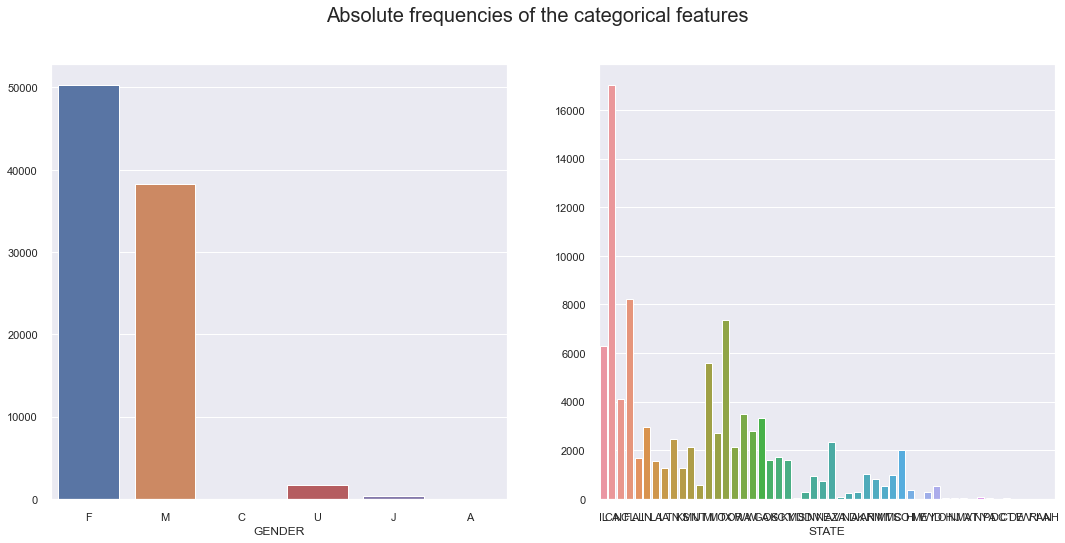

In [646]:
sns.set()

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# plot data
sns.countplot(x="GENDER", data=demographic, ax=ax1)
sns.countplot(x="STATE", data=demographic, ax=ax2)

# layout
ax1.set_ylabel("")
ax2.set_ylabel("")

plt.suptitle("Absolute frequencies of the categorical features", fontsize=20)

plt.show()

<div class="alert alert-block alert-info">

### 2.12) Feature Engeneering
    
</div>

Splitting the US States, into the four principal and most populated regions, so that it is easier to interpret after the clustering.
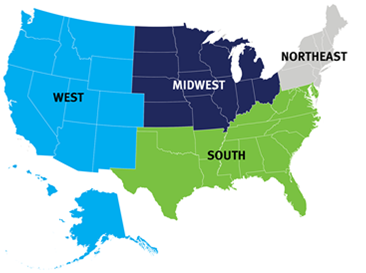

In [648]:
demographic["REGION"]=demographic.STATE.replace(['HI','AK','CO','WY','MT','AZ','UT','ID','CA','NV','OR','WA'],'West')
demographic.REGION.replace(['TX','OK','AR','LA','MS','TN','KY','WV','VA','DE','MD','DC','NC','SC','GA','FL','AL'],'South',inplace=True)
demographic.REGION.replace(['KS','NE','SD','ND','MO','IA','MN','IL','WI','IN','OH','MI'],'MidWest',inplace=True)
demographic.REGION.replace(['PA','NJ','CT','RI','MA','NY','VT','NH','ME'],'NorthEast',inplace=True)

Dropping all the Locations that are defined as States, but are in fact autonomous regions of the USA.

In [649]:
demographic["REGION"].unique()

array(['MidWest', 'West', 'South', 'NM', 'NorthEast', 'AA'], dtype=object)

In [650]:
demographic.REGION.replace(['NM','AA' ],np.nan,inplace=True)

Creating a variable AGE, that is calculated from the DOB variable, turning this variable from a categorical feature to a numerical feature.

In [651]:
demographic["DOB"]=demographic['DOB'].str.split("-",expand=True)
demographic["DOB"] = pd.to_numeric(demographic["DOB"],downcast='integer')
demographic["AGE"]= datetime.now().year - demographic["DOB"]

In [652]:
demographic.GENDER.replace(['C','U','J','A'],'other',inplace=True)

In [653]:
demographic.GENDER.unique()

array(['F', 'M', nan, 'other'], dtype=object)

In [654]:
demographic.drop(["DOB","STATE"],axis=1,inplace=True)

### 2.12.1) Redo Data Imputation

Firstly, we did some simple data imputation using modes, in order to remove the majority of the outliers. Now that we have our variables selected it is possible to do a more detailed data imputation for the metric features, using, for instance KNN Imputer, and using modes for the non-metric features.

In [655]:
value.isna().sum()

RAMNTALL        0
NGIFTALL        0
MINRAMNT        0
MAXRAMNT        0
TIMELAG      9744
AVGGIFT         0
NUMPROM         0
CARDPM12        0
NUMPRM12        0
MAJOR           0
HIT             0
WEALTH1     43416
IC4             0
HHAS1           0
HHAS2           0
HHAS3           0
HHAS4           0
INCOME      20509
HV2             0
HV4             0
dtype: int64

In [656]:
imputer = KNNImputer(n_neighbors=8)
metric_features = value.columns.to_list()
value[metric_features] = imputer.fit_transform(value[metric_features])

In [657]:
value.isna().sum()

RAMNTALL    0
NGIFTALL    0
MINRAMNT    0
MAXRAMNT    0
TIMELAG     0
AVGGIFT     0
NUMPROM     0
CARDPM12    0
NUMPRM12    0
MAJOR       0
HIT         0
WEALTH1     0
IC4         0
HHAS1       0
HHAS2       0
HHAS3       0
HHAS4       0
INCOME      0
HV2         0
HV4         0
dtype: int64

In [658]:
demographic.isna().sum()

GENDER      2836
POBC1          0
POBC2          0
POP902         0
POP90C1        0
POP90C2        0
POP90C3        0
POP90C4        0
POP90C5        0
AGE901         0
SEC1           0
SEC2           0
SEC3           0
SEC5           0
LSC1           0
LSC3           0
LSC4           0
MARR1          0
MARR2          0
MARR4          0
REGION       832
AGE        23114
dtype: int64

In [659]:
non_metric_features=demographic.select_dtypes('object').columns.to_list()
metric_features = demographic.columns.drop(non_metric_features).to_list()
modes = demographic[non_metric_features].mode().loc[0]
demographic.fillna(modes, inplace=True)
demographic[metric_features] = imputer.fit_transform(demographic[metric_features])

In [660]:
demographic.isna().sum()

GENDER     0
POBC1      0
POBC2      0
POP902     0
POP90C1    0
POP90C2    0
POP90C3    0
POP90C4    0
POP90C5    0
AGE901     0
SEC1       0
SEC2       0
SEC3       0
SEC5       0
LSC1       0
LSC3       0
LSC4       0
MARR1      0
MARR2      0
MARR4      0
REGION     0
AGE        0
dtype: int64

In [661]:
overall=pd.merge(value,demographic,left_index=True,right_index=True)
overall.reset_index(inplace=True)

In [662]:
# Updating metric and non metric features
non_metric_features = overall.select_dtypes(include="object").columns.to_list()
metric_features = overall.select_dtypes(include=["float64"]).columns.to_list()

### 2.12.2) Redo Outlier Removal

In [663]:
out=overall.copy()

#### Minimum Covariance Determinant

In [664]:
ee = EllipticEnvelope(contamination=0.019)
ee_df = ee.fit_predict(out[metric_features])

In [665]:
mask_out =ee_df == -1
outliers_mcd=out[mask_out]
out.drop(outliers_mcd.index,inplace=True)

In [666]:
print('Percentage of data removed after outliers:',
      np.round(1 -  np.round(out.shape[0] / data_original.shape[0], 5), 5)*100, "%")

Percentage of data removed after outliers: 3.913 %


In [667]:
overall=out.copy()

In [668]:
value = overall.loc[:,["RAMNTALL","NGIFTALL","MINRAMNT","MAXRAMNT","TIMELAG","AVGGIFT","NUMPROM","CARDPM12","NUMPRM12","MAJOR","HIT","WEALTH1","IC4","HHAS1","HHAS2","HHAS3","HHAS4","INCOME","HV2","HV4"]]

In [669]:
demographic = overall.loc[:,["REGION","GENDER","AGE","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4","POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]]

### 2.12.3) One Hot Encoder

In [670]:
df_ohc = demographic.copy()
categorical=demographic.select_dtypes(include="object").columns.to_list()
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc[categorical])
ohc_feat_names = ohc.get_feature_names(categorical)
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
# Reassigning df to contain ohc variables
df_ohc = pd.concat([ohc_df,df_ohc.drop(columns=categorical)], axis=1)
demographic=df_ohc.copy()

<div class="alert alert-block alert-info">
    
### 2.13) Data Standardization 
    
</div>

Data Standardization using the Standard Scaler method. 

The idea behind StandardScaler is that it will transform the data such that its distribution will have a mean value 0 and standard deviation of 1.

In [671]:
standard_value=pd.DataFrame(StandardScaler().fit(value).transform(value),index=value.index, columns=value.columns)

<div class="alert alert-block alert-success">

## 3) Clustering
    
</div>

In [709]:
def plotKElbow(cluster,data,metric):
    visualizer = KElbowVisualizer(cluster, k=(2,12), metric=metric, timings=False,locate_elbowbool=False)
    visualizer.fit(data)        
    visualizer.show()   
    

In [673]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [674]:
def kmeans_cluster(df,n_clust):
    kmclust = KMeans(n_clusters=n_clust, init='k-means++', n_init=15, random_state=1)
    df_labels = kmclust.fit_predict(df)
    return df_labels


In [675]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        #ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [676]:
def cluster_single_profile(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=1, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [677]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [678]:
def avg_silhouette(min_range,max_range,df,cluster):
    avg_silhouette = []
    for nclus in range(min_range,max_range):
        # Skip nclus == 1
        if nclus == 1:
            continue
    
        # Create a figure
        fig = plt.figure(figsize=(10,5 ))

        if "n_clusters" in cluster.get_params():
            param = "n_clusters"
        else:
            param = "n_components"
        
        
        # Get the cluster labels by applying a given clustering algorithm
        clustering = cluster.set_params(**{param:nclus})
        cluster_labels = clustering.fit_predict(df)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(df, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(df, cluster_labels)

        y_lower = 10
        for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label") 

    # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(df) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

In [679]:
def gmm_cluster(data, nclust):
    gmm=GaussianMixture(n_components=nclust, init_params='kmeans', random_state=0)
    gmm.fit(data)
    clust_labels = gmm.predict(data)
    return(clust_labels)

<div class="alert alert-block alert-info">


### 3.1) Select the best features
    
</div>

### Value

In [680]:
cluster = KMeans(random_state=0)


C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


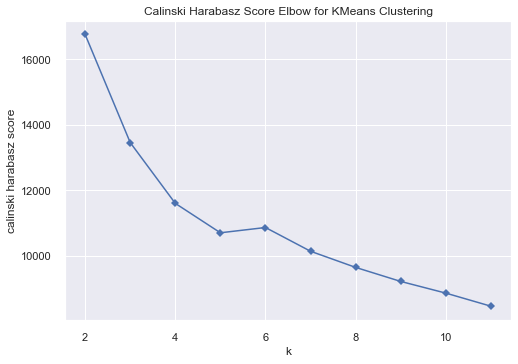

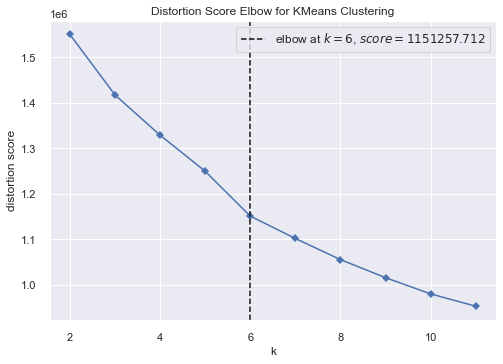

In [710]:
plotKElbow(cluster,standard_value,'calinski_harabasz')
plotKElbow(cluster,standard_value,'distortion')

In [682]:
value['value_labels']=kmeans_cluster(value,3)

In [691]:
# Preparing the data
X = value.drop(columns='value_labels')
y = value.value_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 99.95% of the customers correctly


In [693]:
importances = dt.feature_importances_
indices = np.argsort(importances)

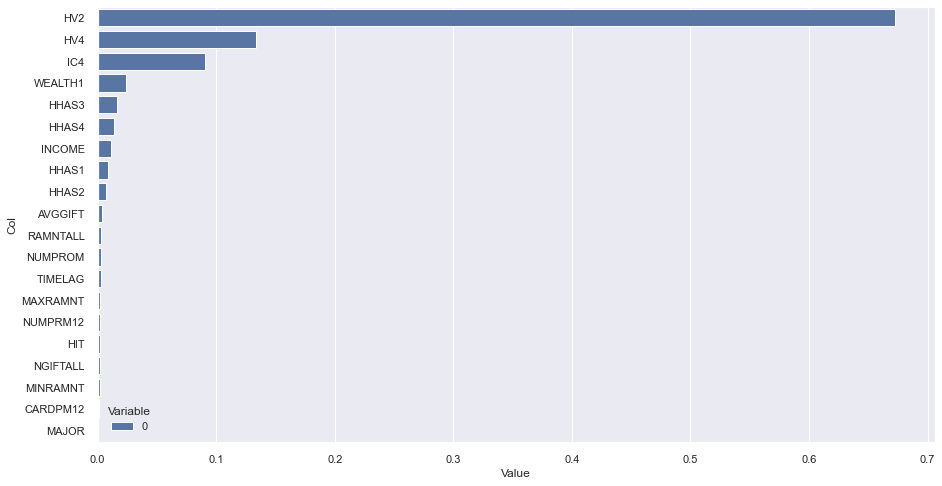

In [694]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [696]:
value=value[['HV2','HV4','IC4','WEALTH1','HHAS3','INCOME','HHAS4','AVGGIFT','HHAS1','HHAS2']].copy()

### Demographic

In [697]:
standard_demographic=pd.DataFrame(StandardScaler().fit(demographic).transform(demographic),index=demographic.index, columns=demographic.columns)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


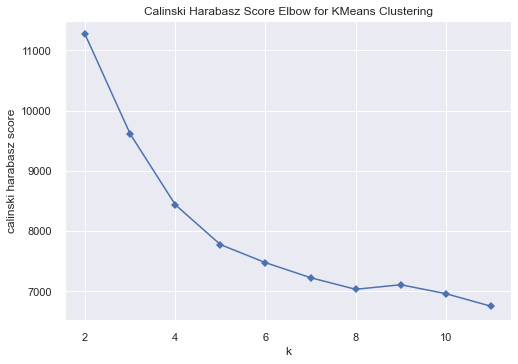

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


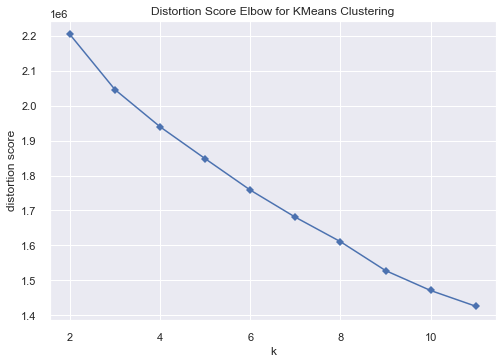

In [698]:
plotKElbow(cluster,standard_demographic,'calinski_harabasz')
plotKElbow(cluster,standard_demographic,'distortion')

In [699]:
demographic['demographic_labels']=kmeans_cluster(demographic,4)

In [700]:
# Preparing the data
X = demographic.drop(columns='demographic_labels')
y = demographic.demographic_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = RandomForestClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 91.52% of the customers correctly


In [701]:
importances = dt.feature_importances_
indices = np.argsort(importances)

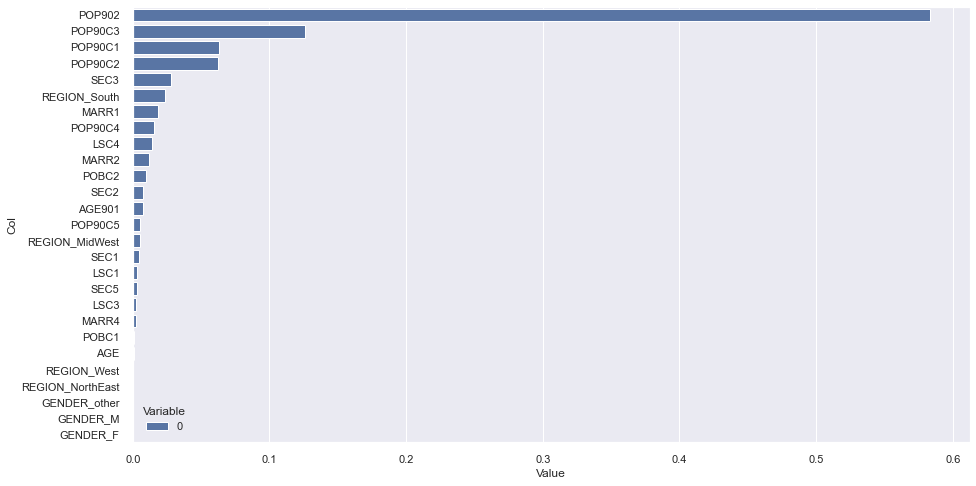

In [702]:
zippy = pd.DataFrame(zip(importances))
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [704]:
demographic=demographic.loc[:,['POP902','POP90C3','POP90C1','SEC3',
                        'REGION_South','POP90C4','LSC4','MARR2','POP90C2','POP90C2']]

### All Data Segmentation: Overall

#### K-means

In [706]:
overall=pd.merge(value,demographic,left_index=True,right_index=True)
overall.reset_index(inplace=True)

In [707]:
standard_overall=pd.DataFrame(StandardScaler().fit(overall).transform(overall),index=overall.index, columns=overall.columns)

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


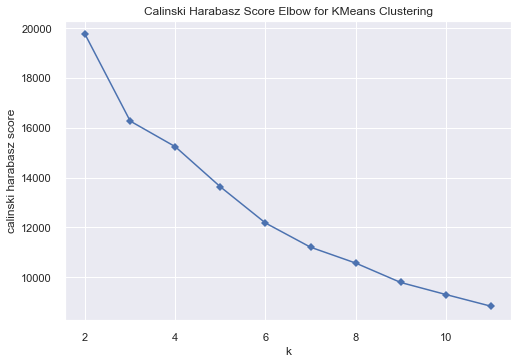

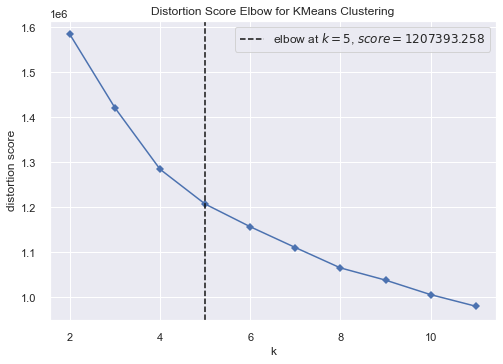

In [713]:
plotKElbow(cluster,standard_overall,'calinski_harabasz')
plotKElbow(cluster,standard_overall,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.16492726995434187
For n_clusters = 3, the average silhouette_score is : 0.1711217697929519
For n_clusters = 4, the average silhouette_score is : 0.17354664285806978
For n_clusters = 5, the average silhouette_score is : 0.1606911950706752


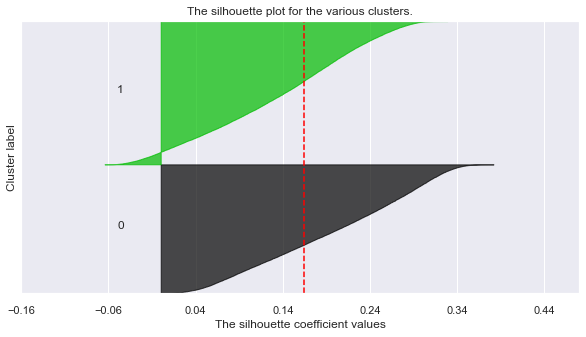

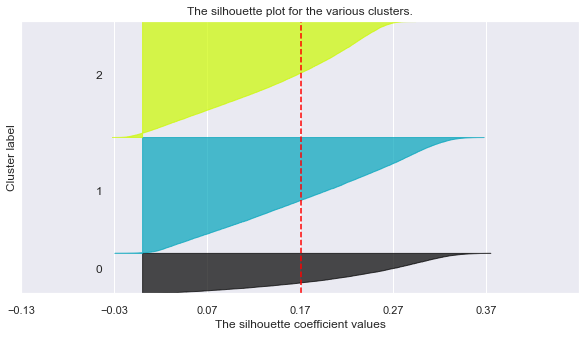

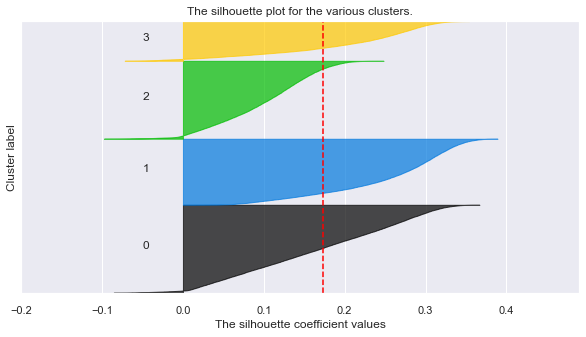

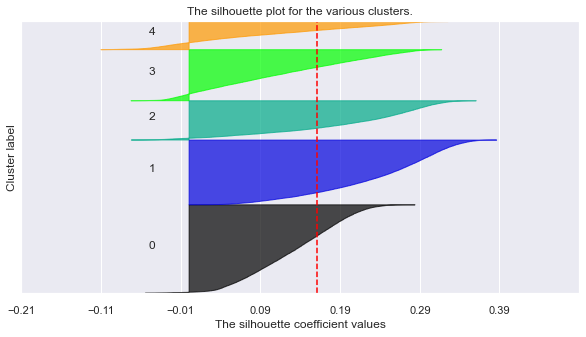

In [714]:
avg_silhouette(2,6,standard_overall.sample(frac=0.60),cluster)

In [715]:
standard_overall['k_means_overall_label']=kmeans_cluster(standard_overall,4)

### GMM

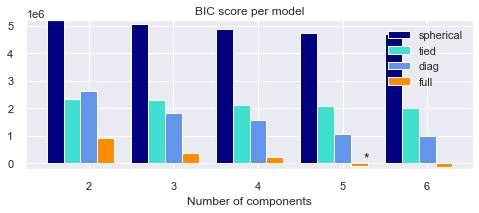

In [716]:
#ver link sklearn 
lowest_bic = np.infty
bic = []
n_components_range = range(2, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(standard_overall.drop('k_means_overall_label',axis=1))
        bic.append(gmm.bic(standard_overall.drop('k_means_overall_label',axis=1)))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [717]:
gmm = GaussianMixture(init_params='kmeans', random_state=0)

For n_clusters = 2, the average silhouette_score is : 0.12603956148066003
For n_clusters = 3, the average silhouette_score is : 0.09222469893392027
For n_clusters = 4, the average silhouette_score is : 0.0676368612833036
For n_clusters = 5, the average silhouette_score is : 0.07286418559408873


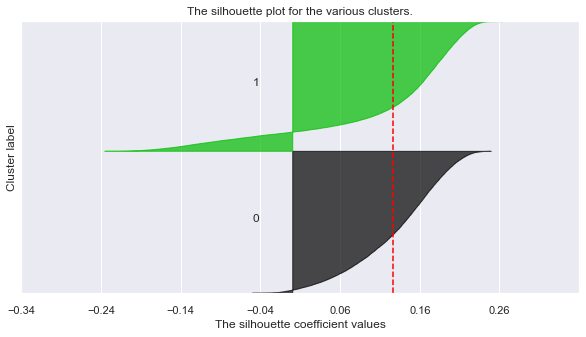

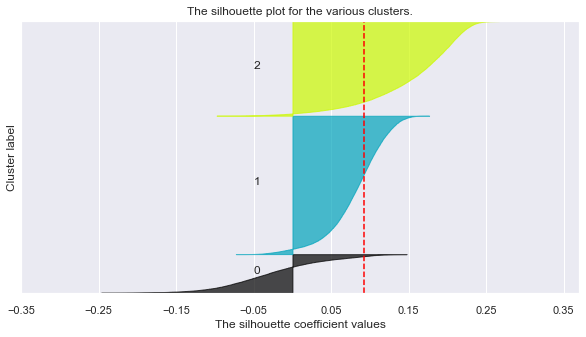

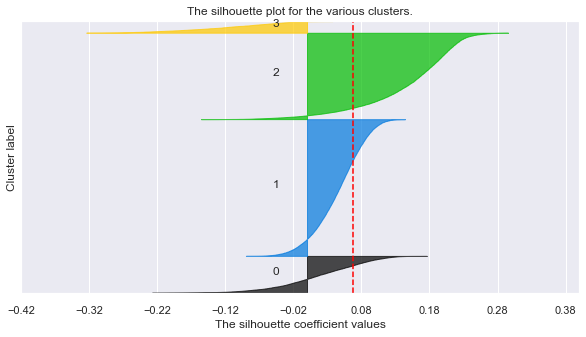

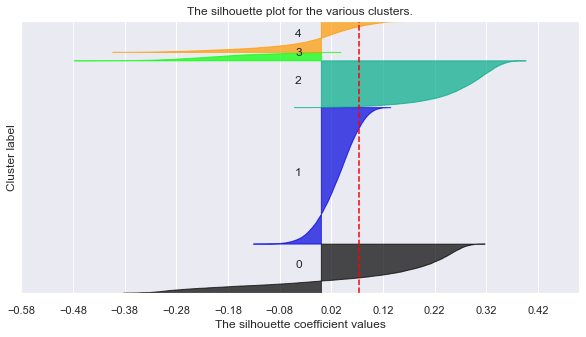

In [718]:
avg_silhouette(2,6,standard_overall.drop('k_means_overall_label',axis=1).sample(frac=0.6),gmm)

In [723]:
standard_overall['gmm_overall_label']=gmm_cluster(standard_overall, 4)

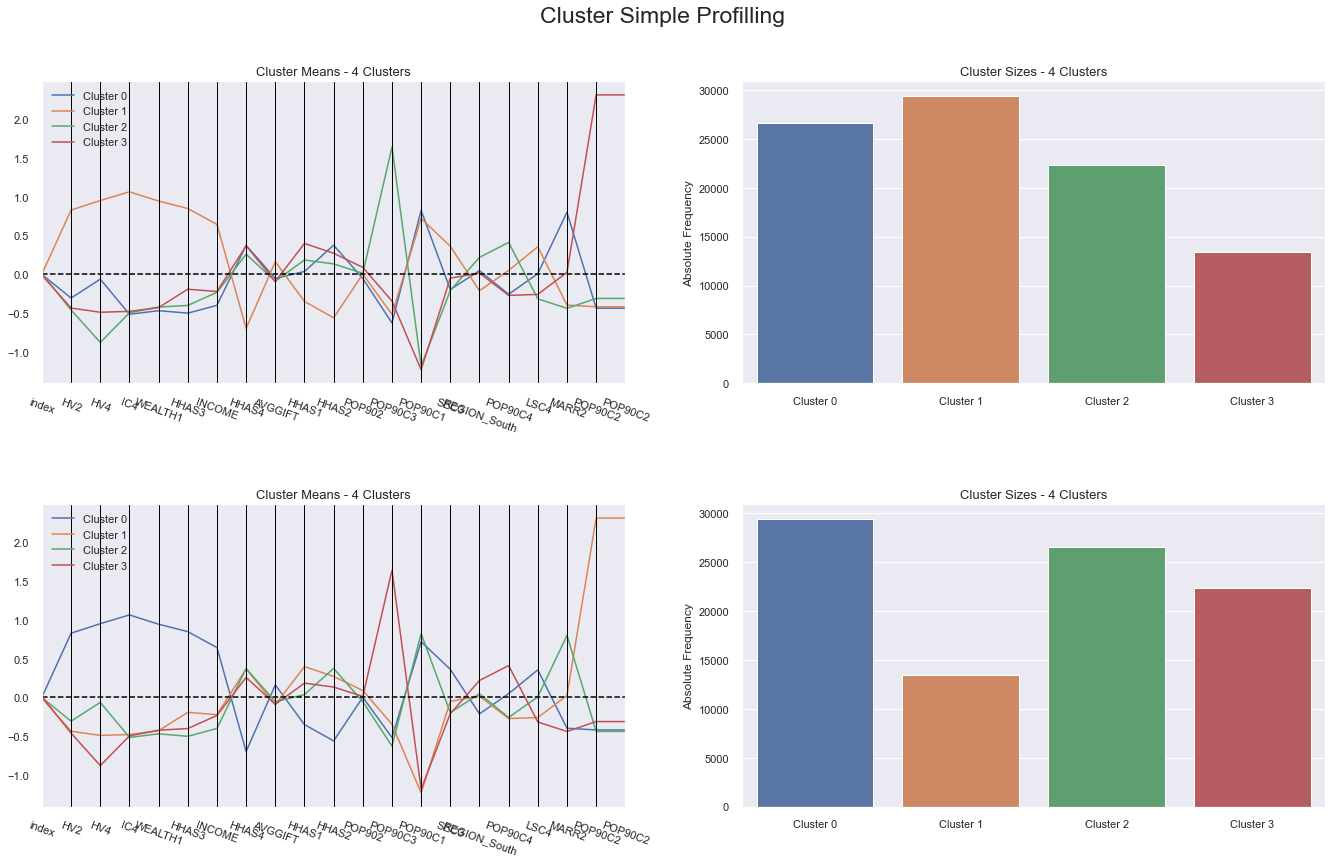

In [724]:
cluster_profiles(standard_overall, ["k_means_overall_label", "gmm_overall_label"], figsize=(23, 13), compar_titles=["K-Means - All Data", "GMM - All Data"])

### Segmentation

### Value

In [725]:
standard_value=pd.DataFrame(StandardScaler().fit(value).transform(value),index=value.index, columns=value.columns)

#### K-Means + Hierarchical Clustering (HC)

In [726]:
kmeans_hc_labels = kmeans_cluster(value,30)
kmeans_hc_clusters = standard_value.copy()
kmeans_hc_clusters["kmeans_hc_labels"] = kmeans_hc_labels

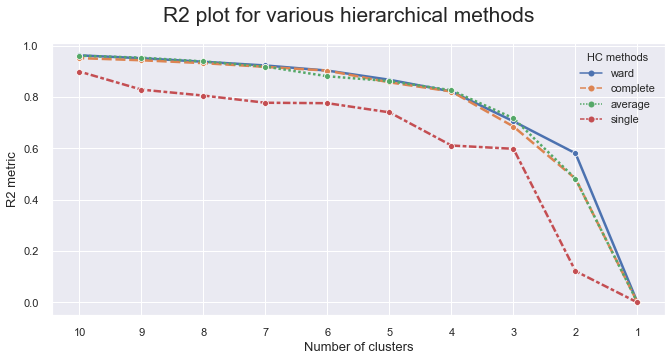

In [727]:
kmeans_hc_clusters = kmeans_hc_clusters.groupby("kmeans_hc_labels").mean()
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=kmeans_hc_clusters, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [728]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclabel=hclust.fit_predict(kmeans_hc_clusters)

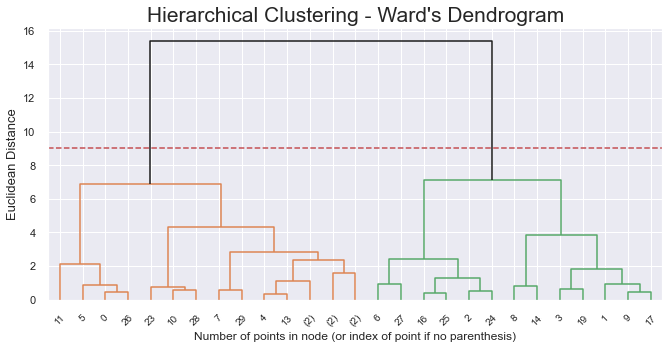

In [729]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 9
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

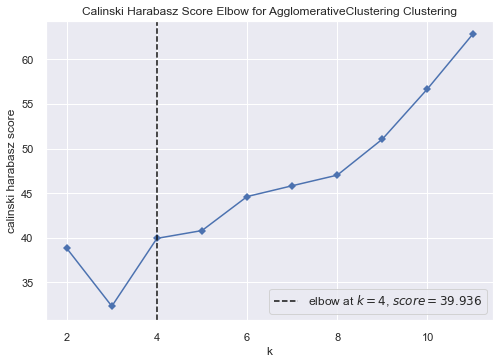

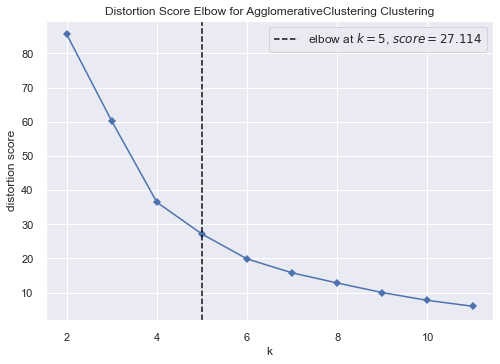

In [730]:
Hclustering = AgglomerativeClustering(linkage=linkage)
plotKElbow(Hclustering,kmeans_hc_clusters,'calinski_harabasz')
plotKElbow(Hclustering,kmeans_hc_clusters,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.46180619888838503
For n_clusters = 3, the average silhouette_score is : 0.38713799144276145
For n_clusters = 4, the average silhouette_score is : 0.3757957282744632
For n_clusters = 5, the average silhouette_score is : 0.3947956183926553


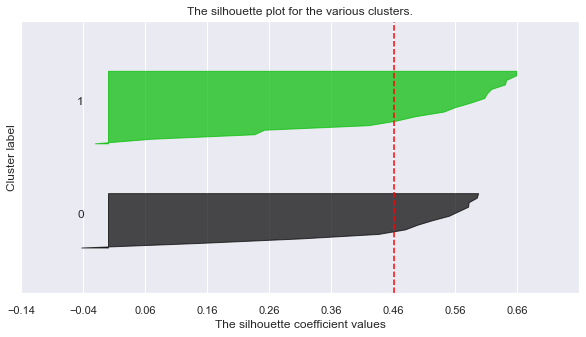

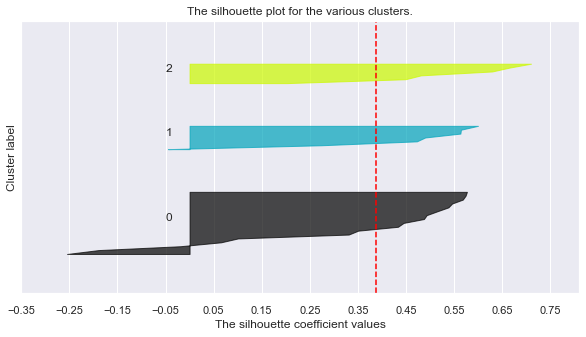

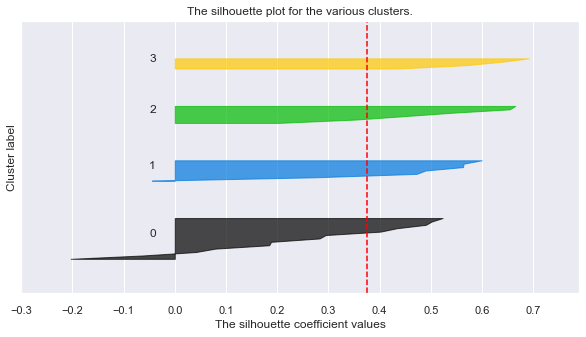

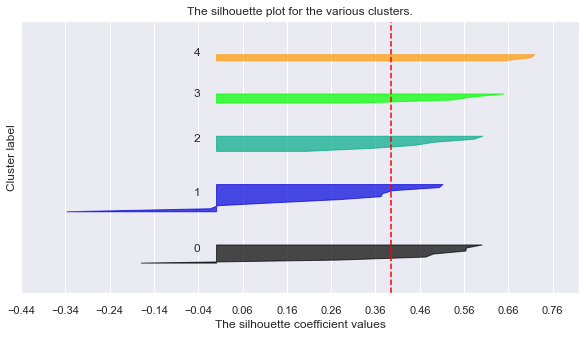

In [731]:
avg_silhouette(2,6,kmeans_hc_clusters,Hclustering)

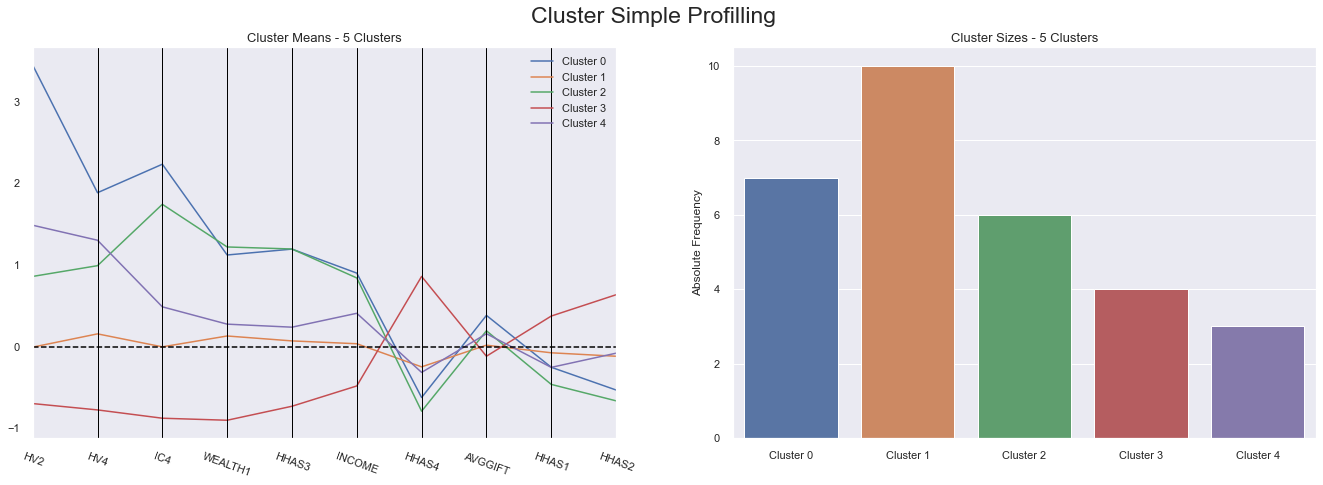

In [733]:
# Hierarchical Clustering with sklearn
hc = AgglomerativeClustering(n_clusters=5, linkage=linkage)
labels = hc.fit_predict(kmeans_hc_clusters)

# Getting the HC labels for each observation in the main dataframe
kmeans_hc_clusters['kmeans_hc_lables']=labels
cluster_profiles(kmeans_hc_clusters,["kmeans_hc_lables"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

### Self-Organizing Maps (SOM) + HC

In [734]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

sm = sompy.SOMFactory().build(
    standard_value.values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=standard_value.columns
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.012000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  1.080000, quantization error: 5.637583

 epoch: 2 ---> elapsed time:  0.386000, quantization error: 2.809335

 epoch: 3 ---> elapsed time:  0.450000, quantization error: 2.730392

 epoch: 4 ---> elapsed time:  0.381000, quantization error: 2.712491

 epoch: 5 ---> elapsed time:  0.387000, quantization error: 2.686939

 epoch: 6 ---> elapsed time:  0.366000, quantization error: 2.675976

 epoch: 7 ---> elapsed time:  0.356000, quantization error: 2.672283

 epoch: 8 ---> elapsed time:  0.403000, quantization error: 2.668791

 epoch: 9 ---> elapsed time:  0.394000, quantization error: 2.665345

 epoch: 10 ---> elapsed time:  0.407000, quantization error: 2.661848

 epoch: 11 ---> elapsed time:  0.381000, quantization error: 2.658267

 epoch: 12 ---> elapsed time:  0.355000, quantization error: 2.654604

 epoch: 13 ---> 

 epoch: 14 ---> elapsed time:  0.340000, quantization error: 1.695915

 epoch: 15 ---> elapsed time:  0.336000, quantization error: 1.695896

 epoch: 16 ---> elapsed time:  0.339000, quantization error: 1.695884

 epoch: 17 ---> elapsed time:  0.336000, quantization error: 1.695852

 epoch: 18 ---> elapsed time:  0.345000, quantization error: 1.695842

 epoch: 19 ---> elapsed time:  0.336000, quantization error: 1.695822

 epoch: 20 ---> elapsed time:  0.337000, quantization error: 1.695821

 epoch: 21 ---> elapsed time:  0.339000, quantization error: 1.695828

 epoch: 22 ---> elapsed time:  0.336000, quantization error: 1.695818

 epoch: 23 ---> elapsed time:  0.336000, quantization error: 1.695816

 epoch: 24 ---> elapsed time:  0.356000, quantization error: 1.695812

 epoch: 25 ---> elapsed time:  0.347000, quantization error: 1.695807

 epoch: 26 ---> elapsed time:  0.346000, quantization error: 1.695800

 epoch: 27 ---> elapsed time:  0.341000, quantization error: 1.695785

 epoch

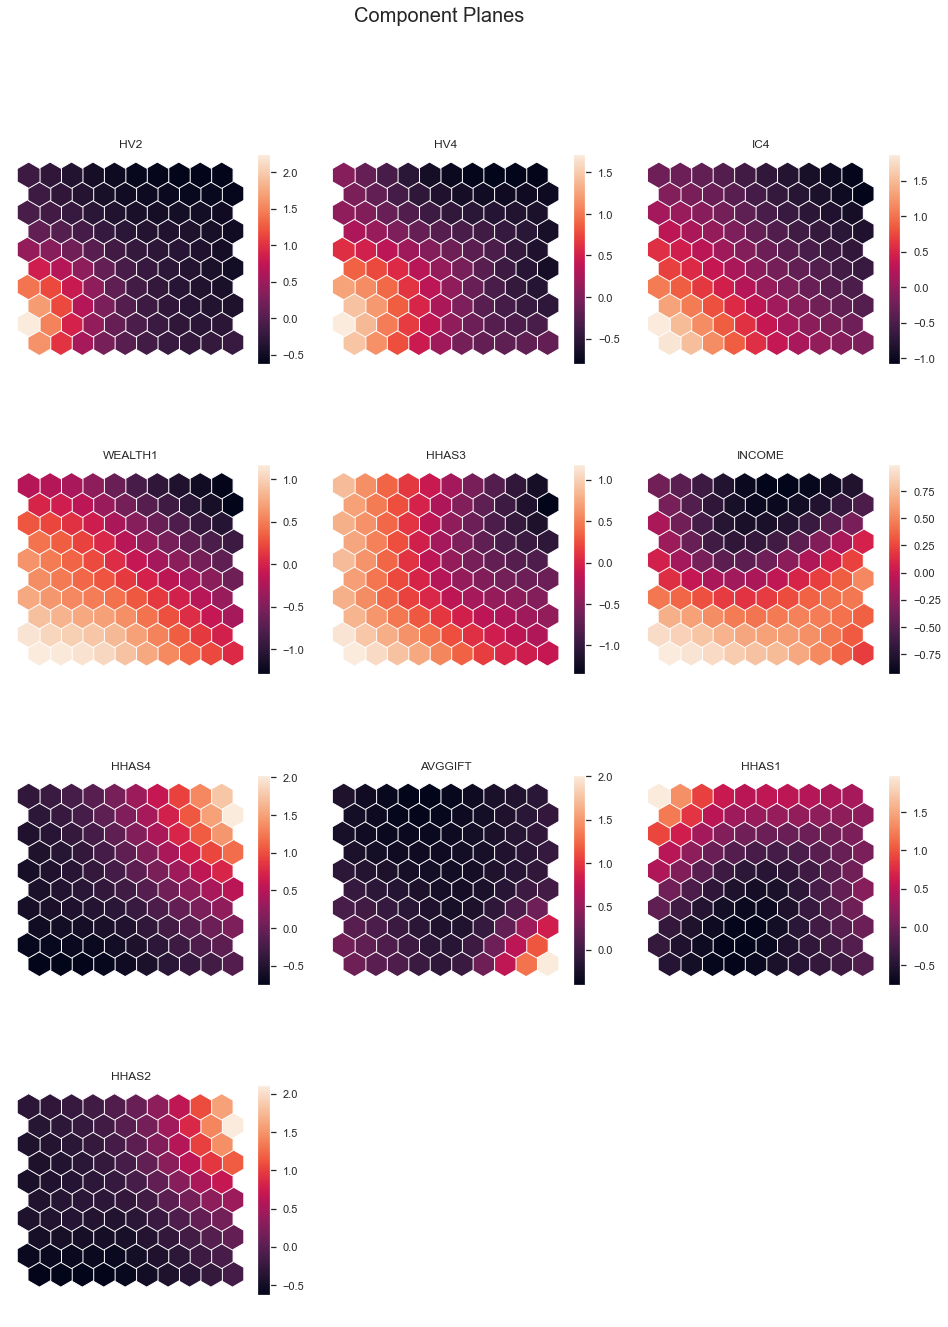

In [735]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

In [741]:
# Obtaining SOM's BMUs labels
bmus_map_hc = sm.find_bmu(standard_value)[0]  # get bmus for each observation in df

df_bmus_hc = pd.DataFrame(
    np.concatenate((standard_value, np.expand_dims(bmus_map_hc,1)), axis=1),
    index=standard_value.index, columns=np.append(standard_value.columns,"BMU")
)

In [762]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclabel=hclust.fit_predict(df_bmus_hc)

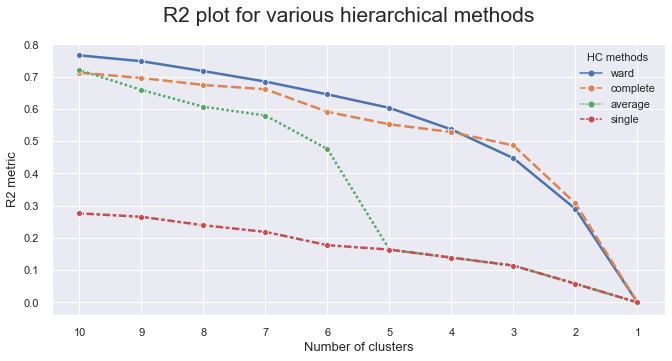

In [763]:
df_bmus_hc = df_bmus_hc.groupby("BMU").mean()
# Prepare input

hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=df_bmus_hc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

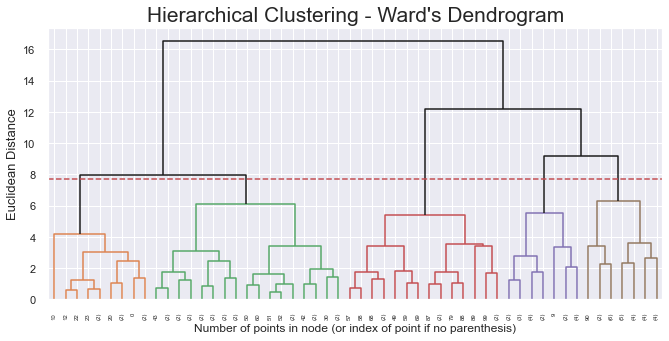

In [764]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 7.7
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


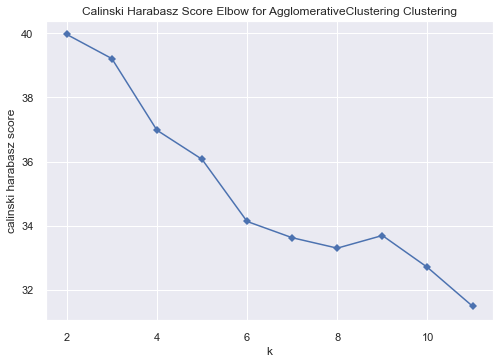

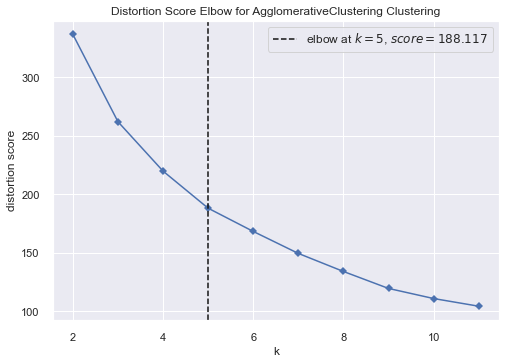

In [750]:
Hclustering = AgglomerativeClustering(linkage=linkage)
plotKElbow(Hclustering,df_bmus_hc,'calinski_harabasz')
plotKElbow(Hclustering,df_bmus_hc,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.40702408018232866
For n_clusters = 3, the average silhouette_score is : 0.4521705627815563
For n_clusters = 4, the average silhouette_score is : 0.509072246445537
For n_clusters = 5, the average silhouette_score is : 0.577527187937585


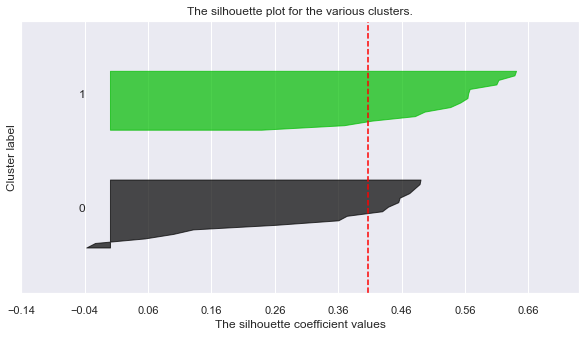

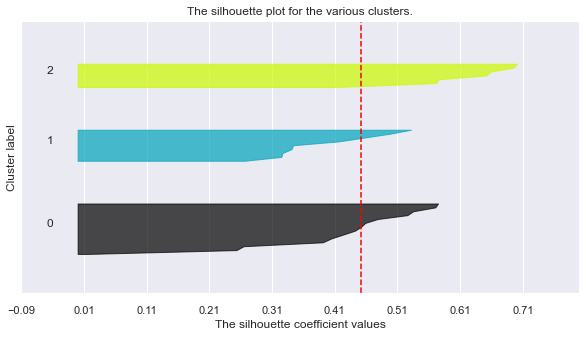

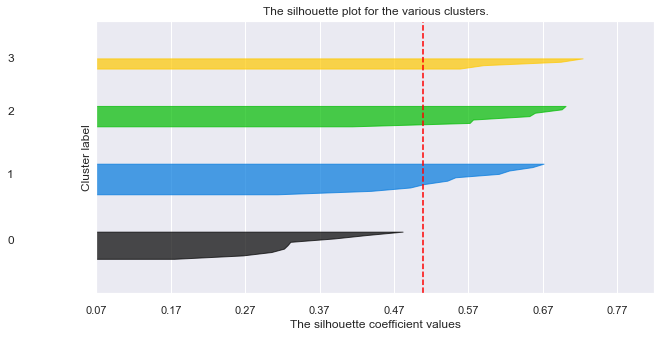

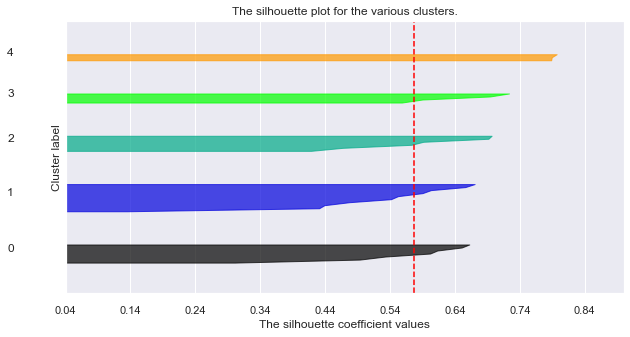

In [751]:
avg_silhouette(2,6,kmeans_hc_clusters,Hclustering)

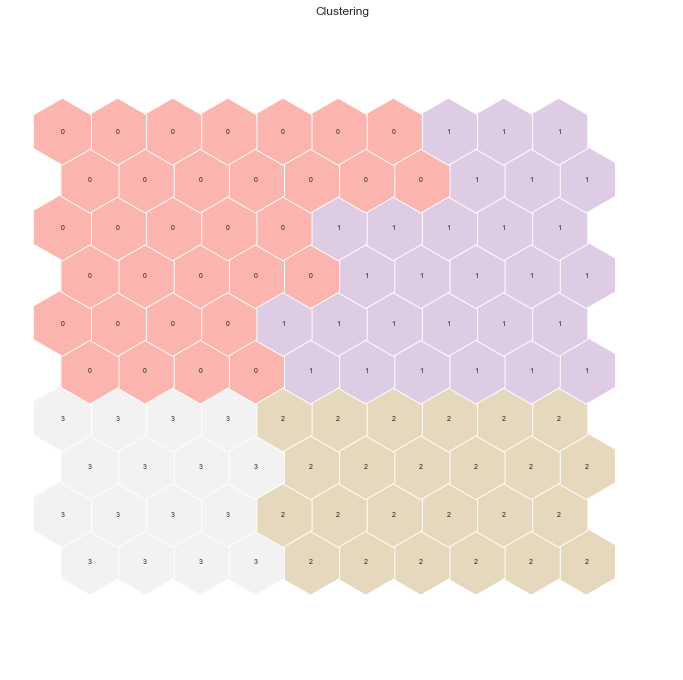

In [753]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [754]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

hc_nodes = pd.DataFrame(nodes, columns=standard_value.columns)
hc_nodes['hc_4_label'] = hc_labels

In [755]:
# Get cluster labels for each observation
som_hc_final = df_bmus_hc.merge(hc_nodes['hc_4_label'], 'left', left_on="BMU", right_index=True)


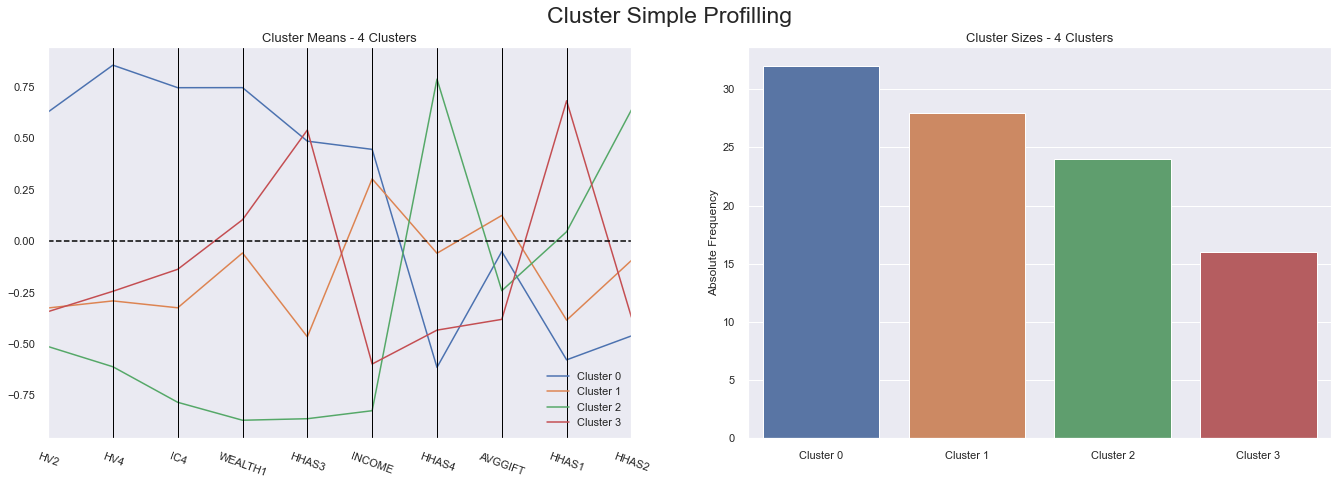

In [756]:
cluster_profiles(som_hc_final,["hc_4_label"], figsize=(23, 7),compar_titles=["SOM + HC - Value"])

### Self-Organizing Maps (SOM) + K-means
Considering the good results of the previous segmentation we decided to experiment with the SOM + K-means approach.

In [ ]:
# vamos escolher o SOM + KMEANS

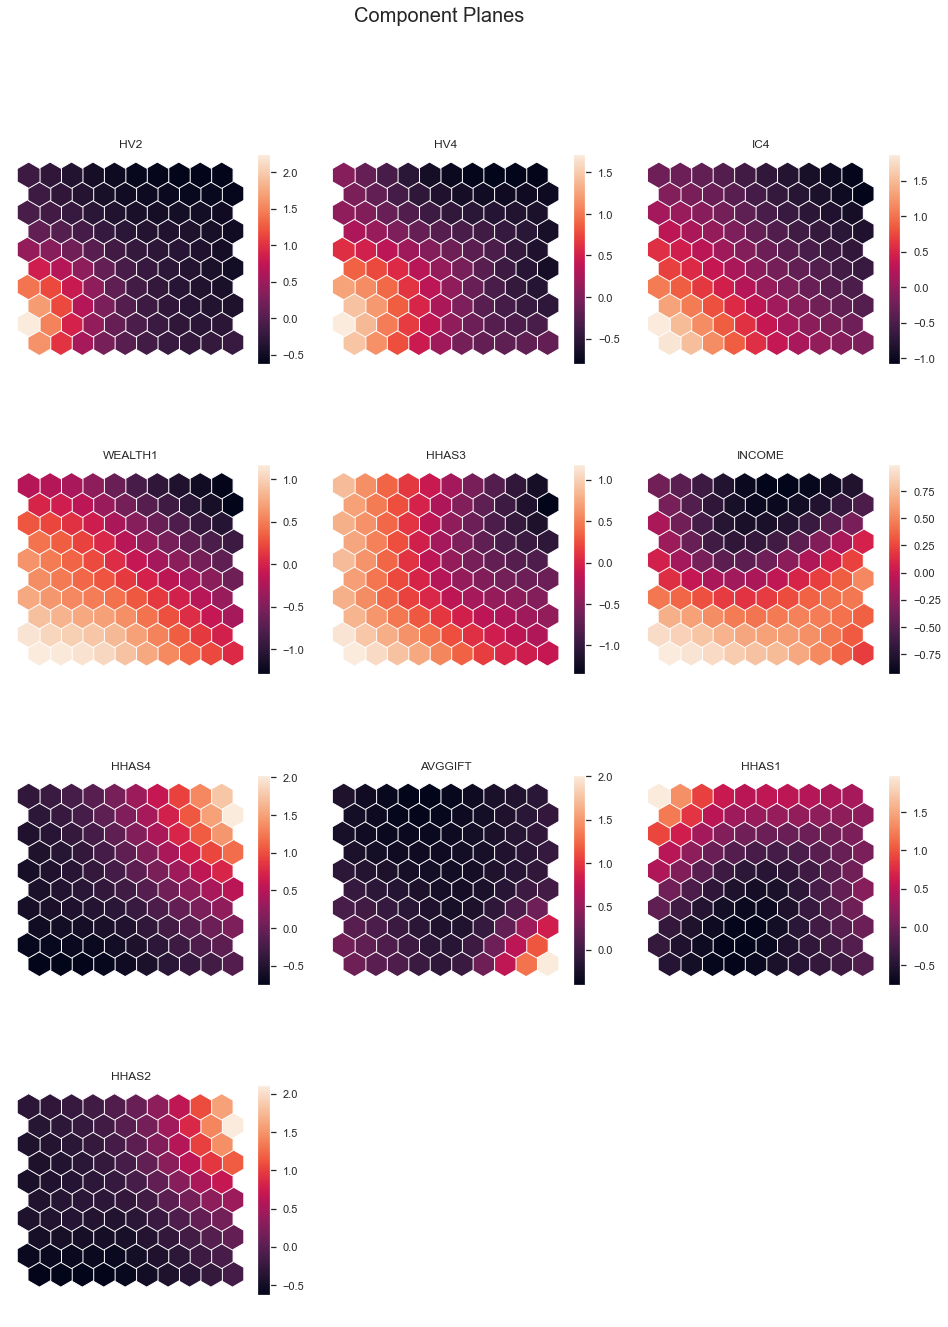

In [765]:
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

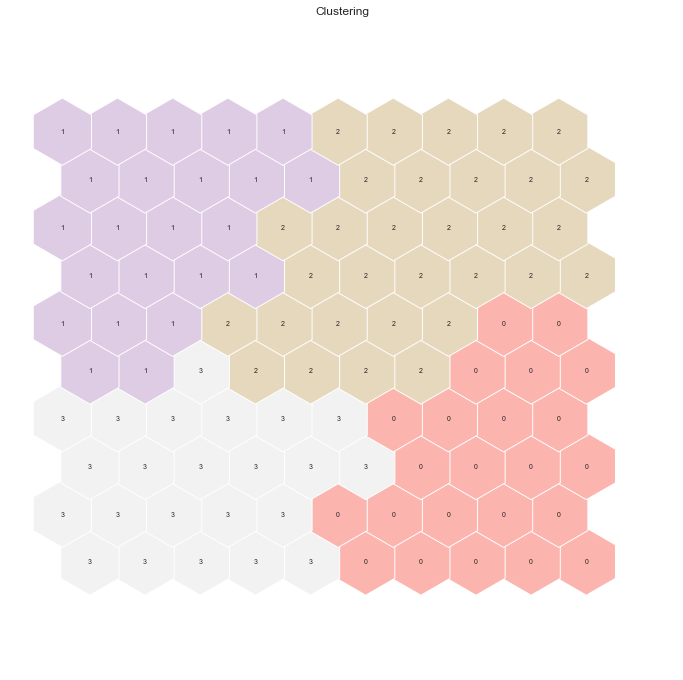

In [766]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)
hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [767]:
nodes = sm.get_node_vectors()

kmeans_nodes = pd.DataFrame(nodes, columns=standard_value.columns)
kmeans_nodes['kmeans_4_label']= nodeclus_labels

In [768]:
# Obtaining SOM's BMUs labels
bmus_map_kmeans = sm.find_bmu(standard_value)[0]  # get bmus for each observation in df

kmeans_bmus = pd.DataFrame(
    np.concatenate((standard_value, np.expand_dims(bmus_map_kmeans,1)), axis=1),
    index=standard_value.index, columns=np.append(standard_value.columns,"BMU")
)

In [769]:
# Get cluster labels for each observation
som_kmeans_final = kmeans_bmus.merge(kmeans_nodes['kmeans_4_label'], 'left', left_on="BMU", right_index=True)

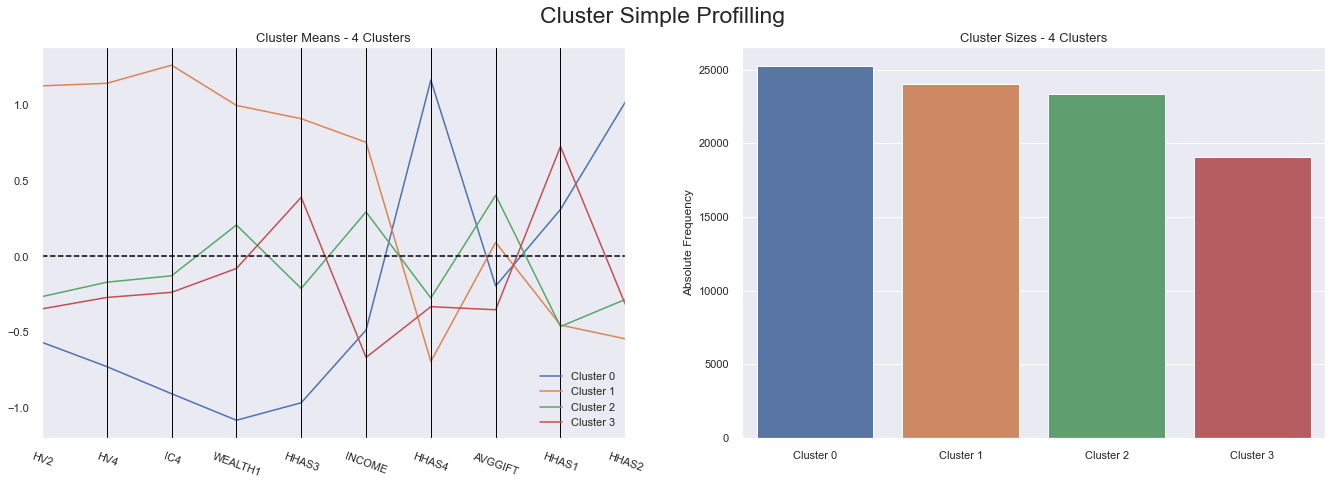

In [770]:
cluster_profiles(som_kmeans_final.drop('BMU',axis=1),["kmeans_4_label"], figsize=(23, 7),compar_titles=["K-Means + HC - Value"])

In [771]:
two_dim = TSNE(random_state=42).fit_transform(som_kmeans_final.drop('BMU',axis=1))

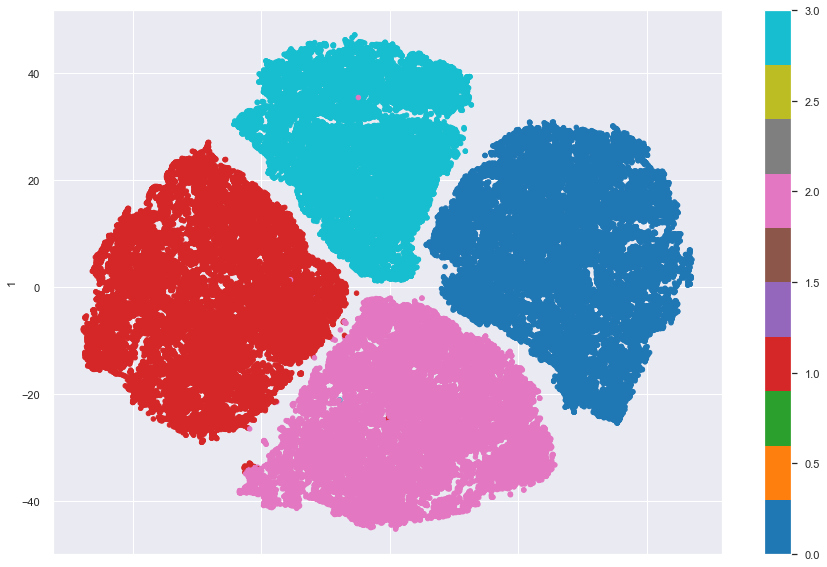

In [772]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=som_kmeans_final['kmeans_4_label'], colormap='tab10', figsize=(15,10))
plt.show()

In [773]:
demo_for_value=demographic.copy()

In [774]:
demo_for_value_std=pd.DataFrame(StandardScaler().fit(demo_for_value).transform(demo_for_value),index=demo_for_value.index, columns=demo_for_value.columns)

In [775]:
demo_for_value_std['kmeans_4_label']=som_kmeans_final['kmeans_4_label']

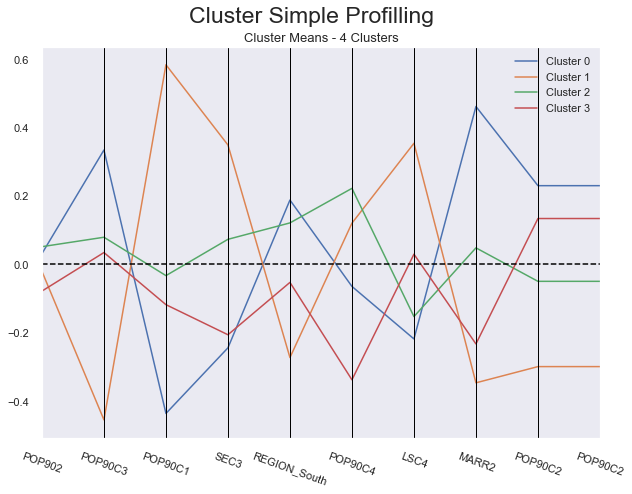

In [776]:
cluster_single_profile(demo_for_value_std, ['kmeans_4_label'], figsize=(10, 7), compar_titles="SOM + KMEANS")

### Demographic

### KMEANS

In [777]:
demographic_std=pd.DataFrame(StandardScaler().fit(demographic).transform(demographic),index=demographic.index, columns=demographic.columns)

In [778]:
kmeans_demo=demographic_std.copy()

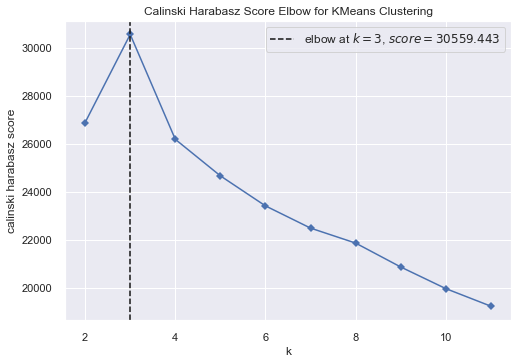

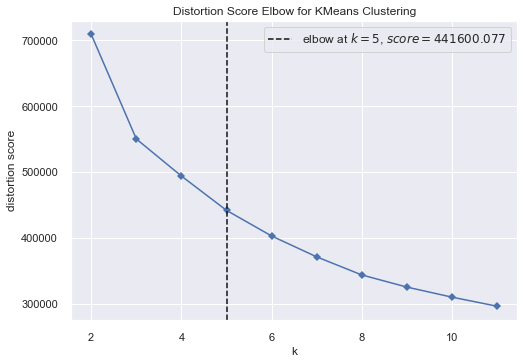

In [779]:
plotKElbow(cluster,kmeans_demo,'calinski_harabasz')
plotKElbow(cluster,kmeans_demo,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.2739637541883225
For n_clusters = 3, the average silhouette_score is : 0.3139698091305986
For n_clusters = 4, the average silhouette_score is : 0.33109554326141605
For n_clusters = 5, the average silhouette_score is : 0.26239327989839945


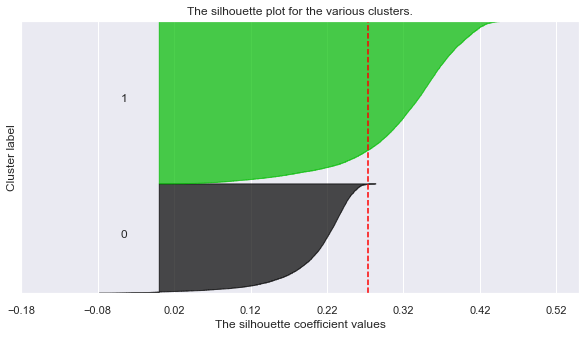

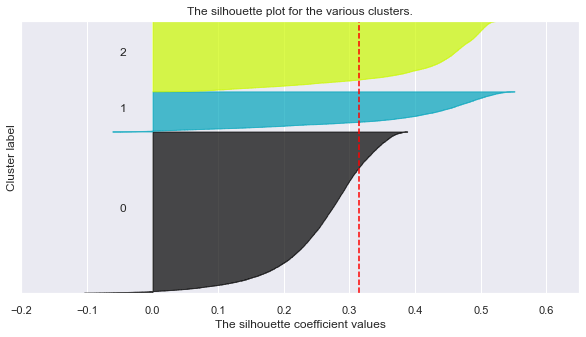

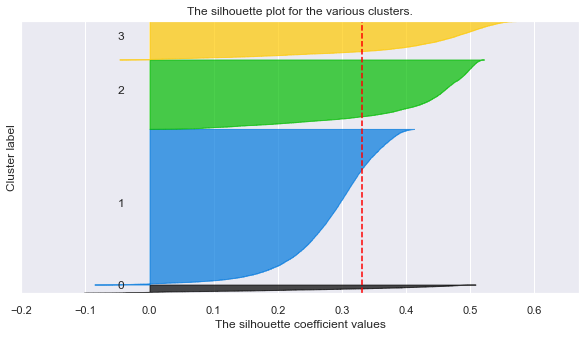

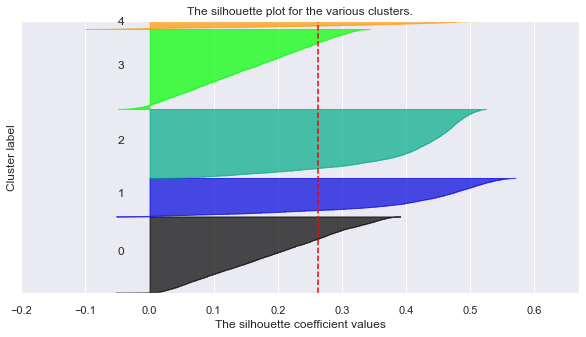

In [780]:
avg_silhouette(2,6,kmeans_demo.sample(frac=0.60),cluster)

In [797]:
kmeans_demo['k_means_demographic_label']=kmeans_cluster(kmeans_demo,3)

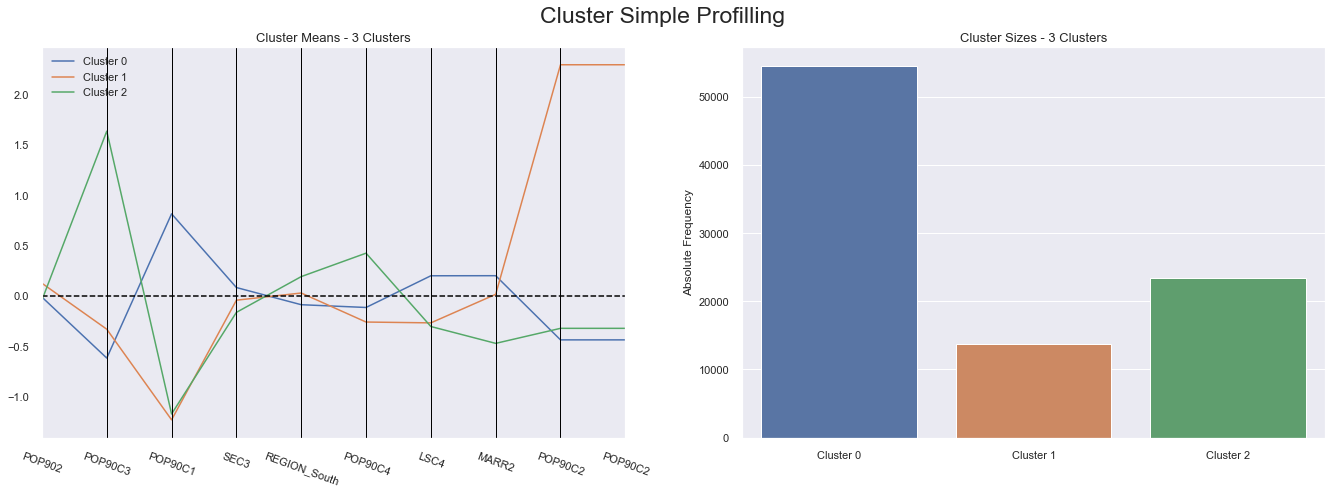

In [798]:
cluster_profiles(kmeans_demo,["k_means_demographic_label"], figsize=(23, 7),compar_titles=["KMeans Clustering"])

### MiniBatchKMeans

In [783]:
MiniBatch = MiniBatchKMeans(n_clusters=None,random_state=0)


C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


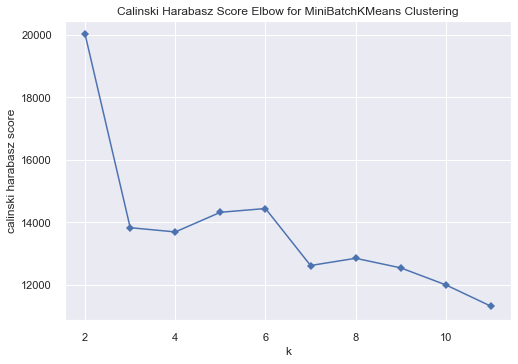

C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Asus\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


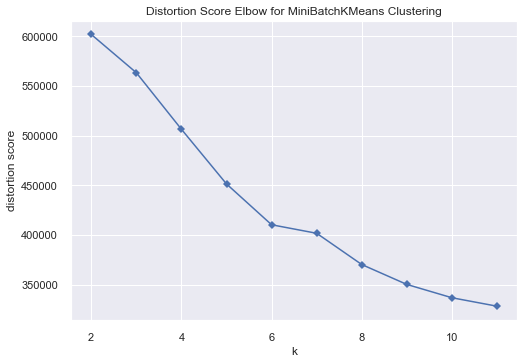

In [784]:
plotKElbow(MiniBatch,demographic_std,'calinski_harabasz')
plotKElbow(MiniBatch,demographic_std,'distortion')

For n_clusters = 2, the average silhouette_score is : 0.3259000778988641
For n_clusters = 3, the average silhouette_score is : 0.3128243236123306
For n_clusters = 4, the average silhouette_score is : 0.3105240288303455
For n_clusters = 5, the average silhouette_score is : 0.2799551574821802


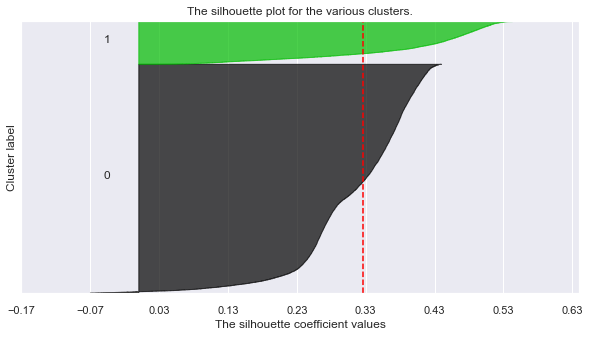

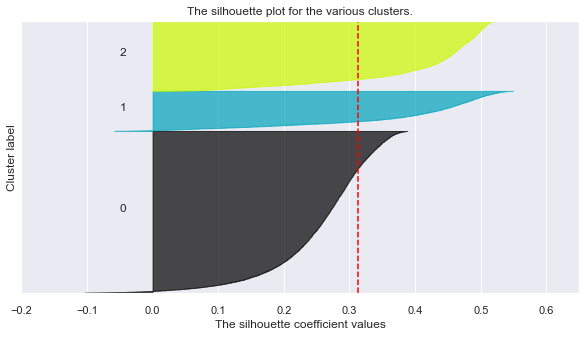

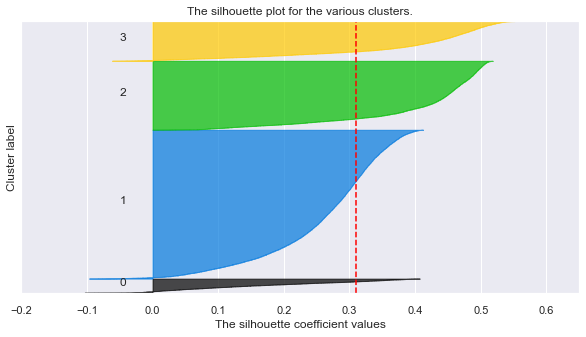

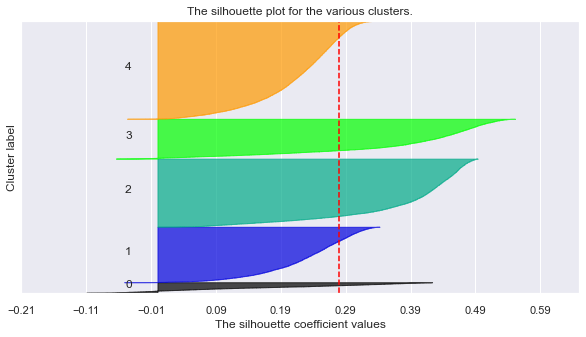

In [785]:
avg_silhouette(2,6,demographic_std.sample(frac=0.60),MiniBatch)

In [794]:
miniBatch = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=15, random_state=1)
miniBatch_labels = miniBatch.fit_predict(demographic_no_categorical_std)

In [795]:
miniBatch_df=demographic_no_categorical_std.copy()
miniBatch_df['miniBatch_labels']=miniBatch_labels

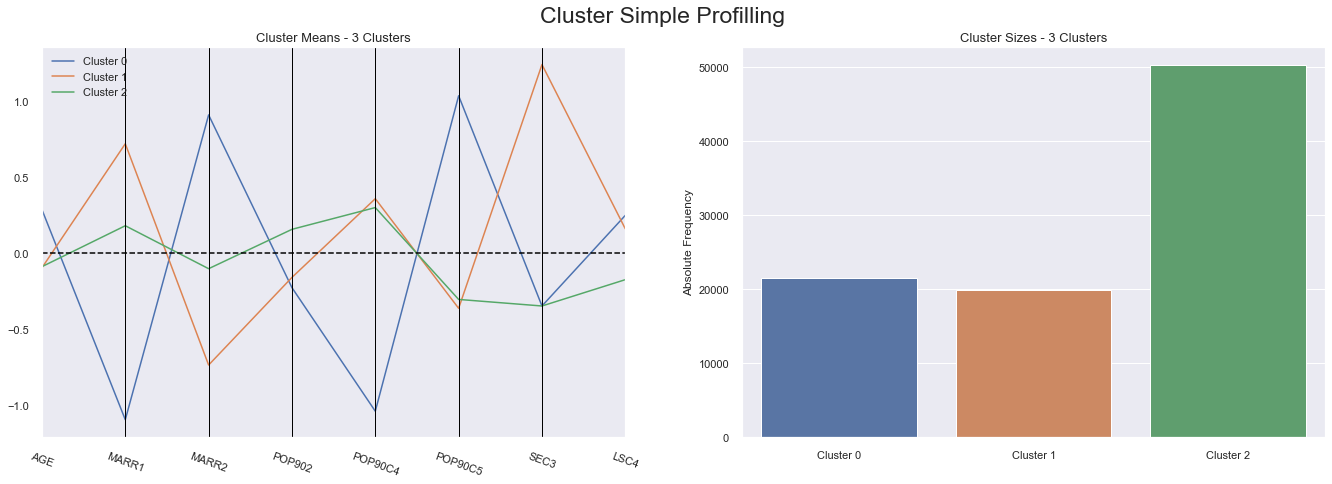

In [796]:
cluster_profiles(miniBatch_df,["miniBatch_labels"], figsize=(23, 7),compar_titles=["MiniBatchKMeans Clustering"])

In [799]:
two_dim = TSNE(random_state=42).fit_transform(miniBatch_df)

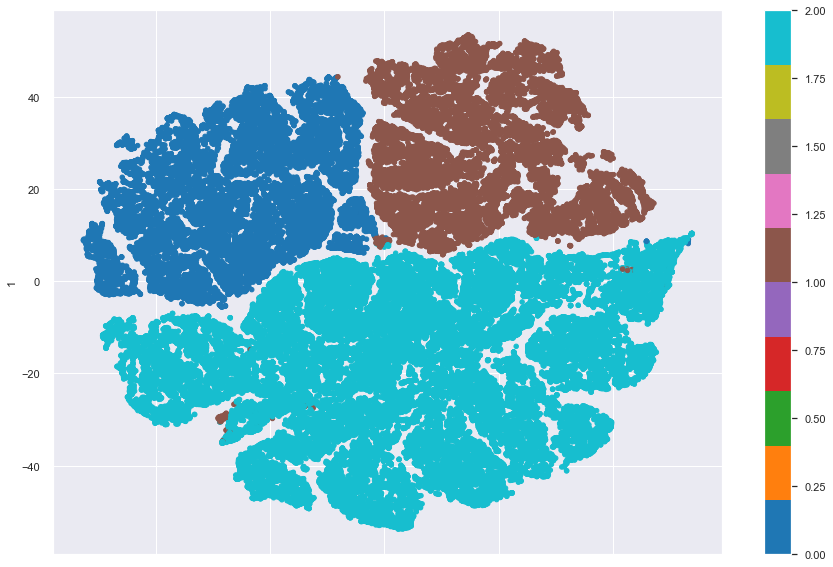

In [800]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=miniBatch_df['miniBatch_labels'], colormap='tab10', figsize=(15,10))
plt.show()

In [801]:
value_for_demo_std=standard_value.copy()

In [802]:
value_for_demo_std['miniBatch_labels']=miniBatch_df['miniBatch_labels']

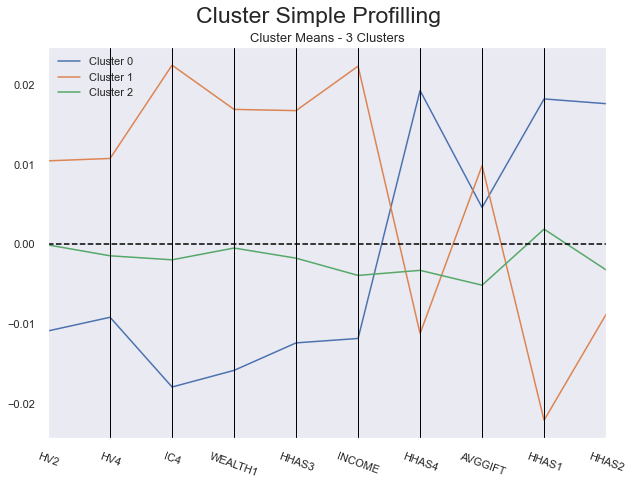

In [803]:
cluster_single_profile(value_for_demo_std, ['miniBatch_labels'], figsize=(10, 7), compar_titles="MiniBatch KMEANS")